## Plotting different kinematic variables at reco level

First we will import all of the necessary packages and load the data

In [97]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
#from pocket_coffea.parameters import defaults

from hist import Hist
import vector
vector.register_awkward()

import sys
#set the resolution of the figures
matplotlib.rcParams["figure.dpi"] = 300

In [98]:
#load data
prefix =  str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)
prefix='/work/mmalucch//out_hh4b/'

input = prefix + "out_privateValidation_newJetCuts/output_all.coffea"
o = load(f"{input}")

So as to compare the different $\kappa_\lambda$ at reco level, we need to plot different kinemtic varibales in both the private and offcial samples to then compare these. The diffreent kinematical variables we want to plot are the following : 

- $\Delta \eta_{HH}$
- $\Delta \Phi_{HH}$
- $\eta_{H_1}$
- $\eta_{H_2}$
- $\eta_{HH}$
- $P_T^{H_1}$
- $P_T^{H_2}$
- $P_T^{HH}$
- $m_{HH}$

Let's start by separting the $\kappa_\lambda$ in the input file

In [99]:
def filter_dataset(datasets, key):
    for dataset in datasets:
        if key in dataset:
            return dataset 
    print(type(dataset))
    return "" 

def kl_var(o,data,k_l,var):
    #choose between official (data=0) and private (data=1)
    sample=list(o["columns"].keys())[data]
    #selects the chosen k_l
    dataset=(filter_dataset(o["columns"][sample].keys(), k_l))
    #category 4b
    category=list(o["columns"][sample][dataset].keys())[var]
    col=o["columns"][sample][dataset][category]
    #convert the keys from colum processor into numpy arrays
    return col

o = load(f"{input}")
kl_var(o,1,"kl-2p45",0)
print(type(kl_var(o,1,"kl-2p45",0)["JetGoodHiggs_N"]))


<class 'coffea.processor.accumulator.column_accumulator'>


In [100]:
#defining the different k_l 
kl_1_official=kl_var(o,0,"kl-1p00",0)
kl_0_official=kl_var(o,0,"kl-0p00",0)
kl_2p45_official=kl_var(o,0,"kl-1p00",0)
kl_5_official=kl_var(o,0,"kl-1p00",0)

kl_1_private=kl_var(o,1,"kl-1p00",0)
kl_0_private=kl_var(o,1,"kl-0p00",0)
kl_2p45_private=kl_var(o,1,"kl-2p45",0)
kl_5_private=kl_var(o,1,"kl-5p00",0)

In [101]:
#converting the dataset keys from column_accumulator to np.array
print(type(kl_5_private))

kl_datasets=[kl_1_official,kl_0_official,kl_2p45_official,kl_5_official,kl_1_private,kl_0_private,kl_2p45_private,kl_5_private]
print(type(kl_datasets[0]["weight"]))

#print(ak.sum(kl_0_official["weight"]))

for dataset in kl_datasets:
    #print("Dataset type:", (dataset))
    for key in dataset.keys():
        # Check if the item is an instance of column_accumulator
        if hasattr(dataset[key], 'value'):
            #print(f"Converting {key} from column_accumulator to np.array")
            dataset[key] = dataset[key].value
        else:
            print(f"{key} is already a np.array or another type: {type(dataset[key])}")
            
print(type(kl_datasets[0]["weight"]))

<class 'dict'>
<class 'coffea.processor.accumulator.column_accumulator'>
weight is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_N is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_provenance is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_pt is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_eta is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_phi is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_mass is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_btagPNetB is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_ptPnetRegNeutrino is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodHiggsMatched_hadronFlavour is already a np.array or another type: <class 'numpy.ndarray'>
JetGoodMatched_N is already a np.array 

In [102]:
#defining a 4 vector
jet_pt = kl_0_official["JetGoodHiggsMatched_pt"]
jet_ptPNetRegNeutrino = kl_0_official["JetGoodHiggsMatched_ptPnetRegNeutrino"]
jet_eta = kl_0_official["JetGoodHiggsMatched_eta"]
jet_phi = kl_0_official["JetGoodHiggsMatched_phi"]
jet_mass = kl_0_official["JetGoodHiggsMatched_mass"]
jet_btag = kl_0_official["JetGoodHiggsMatched_btagPNetB"]
jet_prov= kl_0_official["JetGoodHiggsMatched_provenance"]

print(type(jet_pt))

jet = ak.zip(
    {
        # "pt": jet_pt,
        "pt": jet_ptPNetRegNeutrino,
        "eta": jet_eta,
        "phi": jet_phi,
        "mass": jet_mass,
        "btag": jet_btag,
        "prov": jet_prov
    },with_name="Momentum4D"
)

#test to veryfy it is working: if it does not work  check that vector is imported

print(len(jet.pt))
print(jet)
print("px",jet.px)
print("py",jet.py)
print("pz",jet.pz)
print("E",jet.E)
jet_sum=jet[0]+jet[1]
print("pt",jet.pt)
print("pt sum",jet_sum.pt)

<class 'numpy.ndarray'>
30572
[{pt: 239, eta: -1.09, phi: -1.79, mass: 20.7, btag: 1, ... btag: 0.528, prov: 2}]
px [-51.4, 61.4, -14, -34.7, 5.2, -36.1, -66.5, ... 158, -999, 26.1, -53.4, -38.3, 43.5]
py [-233, 161, -78.8, 113, 68.1, 29.7, -149, ... 42, -26.4, -118, -61.4, 17.6, 154]
pz [-316, -1.53, -11.9, -71.4, -15.2, -23.2, -47.7, ... 314, inf, 371, 102, 114, 389]
E [396, 173, 81.4, 139, 70.4, 52.4, 171, nan, ... 263, 354, nan, 391, 131, 122, 421]
pt [239, 172, 80.1, 119, 68.3, 46.7, 163, ... 128, 163, -999, 121, 81.4, 42.1, 160]
pt sum 72.94502054542312


In [103]:
def jet_four_vector(kl_dataset):
    jet_pt = kl_dataset["JetGoodHiggsMatched_pt"]
    jet_ptPNetRegNeutrino = kl_dataset["JetGoodHiggsMatched_ptPnetRegNeutrino"]
    jet_eta = kl_dataset["JetGoodHiggsMatched_eta"]
    jet_phi = kl_dataset["JetGoodHiggsMatched_phi"]  
    jet_mass = kl_dataset["JetGoodHiggsMatched_mass"]
    jet_btag = kl_dataset["JetGoodHiggsMatched_btagPNetB"]
    jet_prov= kl_dataset["JetGoodHiggsMatched_provenance"]
    
    jet = ak.zip(
    {
        # "pt": jet_pt,
        "pt": jet_ptPNetRegNeutrino,
        "eta": jet_eta,
        "phi": jet_phi,
        "mass": jet_mass,
        "btag": jet_btag,
        "prov": jet_prov
    },with_name="Momentum4D"
    )
    
    return jet

kl_datasets=[kl_1_official,kl_0_official,kl_2p45_official,kl_5_official,kl_1_private,kl_0_private,kl_2p45_private,kl_5_private]
for k in kl_datasets:
    print(jet_four_vector(k).px)

[113, -27.5, 5.26, -64, -102, 43.2, 42.9, ... -40.8, 12.9, -31.1, -6.47, 95.1, 37.3]
[-51.4, 61.4, -14, -34.7, 5.2, -36.1, -66.5, ... 158, -999, 26.1, -53.4, -38.3, 43.5]
[113, -27.5, 5.26, -64, -102, 43.2, 42.9, ... -40.8, 12.9, -31.1, -6.47, 95.1, 37.3]
[113, -27.5, 5.26, -64, -102, 43.2, 42.9, ... -40.8, 12.9, -31.1, -6.47, 95.1, 37.3]
[-73.2, 46.2, -9.69, -76.2, -7.65, 191, -65.1, ... 54, 97, -40, -61.8, 71.8, 42.4]
[-1.27, 70.4, -87.1, 3.9, -164, 120, 37.8, ... 32.4, -999, 50.3, 58.4, 4.61, -108]
[64.1, -49.7, 80.5, -61.7, -114, 29.3, ... -70.5, 58.3, -115, -56.3, 58.8, 27.4]
[-61.6, 44.2, 25.4, -28.7, -45, -42.1, 20.6, ... 88.4, 52.3, 59.2, 22.4, -50.4, 32.1]


In [104]:
#creating the 4 vectors for each kl dataset

jet_four_vector_kl_1_official_hand =jet_four_vector(kl_1_official)
jet_four_vector_kl_0_official =jet_four_vector(kl_0_official)
jet_four_vector_kl_2p45_official =jet_four_vector(kl_2p45_official)
jet_four_vector_kl_5_official =jet_four_vector(kl_5_official)

jet_four_vector_kl_1_private =jet_four_vector(kl_1_private)
jet_four_vector_kl_0_private =jet_four_vector(kl_0_private)
jet_four_vector_kl_2p45_private =jet_four_vector(kl_2p45_private)
jet_four_vector_kl_5_private =jet_four_vector(kl_5_private)


In [105]:
# dataset_names = ["kl_1_official", "kl_0_official", "kl_2p45_official", "kl_5_official",
#                  "kl_1_private", "kl_0_private", "kl_2p45_private", "kl_5_private"]

# for dataset, name in zip(kl_datasets, dataset_names):
#     # Using globals() to dynamically create variable names and assign function outputs.
#     globals()[f"jet_4_vector_{name}"] = jet_four_vector(dataset)
#     print(f"jet_4_vector_{name}")

# # Now you can access these variables directly by their names:
# print(jet_4_vector_kl_1_official)
# print(jet_4_vector_kl_0_official)

# jet_four_vector_kl_1_official_hand =jet_four_vector(kl_1_official)

# print(jet_4_vector_kl_1_official==jet_four_vector_kl_1_official_hand)

In [106]:
# defining a 4 vector with only fully matched events in order to reconstruct the Higgs candidates
jet_prov_unflat=ak.unflatten(jet.prov,kl_0_official["JetGoodHiggsMatched_N"] )
jet_pt_unflat=ak.unflatten(jet.pt,kl_0_official["JetGoodHiggsMatched_N"])
jet_eta_unflat=ak.unflatten(jet.eta,kl_0_official["JetGoodHiggsMatched_N"])
jet_phi_unflat=ak.unflatten(jet.phi,kl_0_official["JetGoodHiggsMatched_N"])
jet_mass_unflat=ak.unflatten(jet.mass,kl_0_official["JetGoodHiggsMatched_N"])
jet_btag_unflat=ak.unflatten(jet.btag,kl_0_official["JetGoodHiggsMatched_N"])
print(jet_pt_unflat)

count_ones = ak.sum(jet_prov_unflat == 1, axis=1)
count_twos = ak.sum(jet_prov_unflat == 2, axis=1)

mask_fully_matched = (count_ones == 2) & (count_twos == 2)

jet_fully_matched = ak.zip(
    {
        "pt": jet_pt_unflat[mask_fully_matched],
        "eta": jet_eta_unflat[mask_fully_matched],  # Assume you have jet_eta_unflat similarly defined
        "phi": jet_phi_unflat[mask_fully_matched],  # Assume you have jet_phi_unflat similarly defined
        "mass": jet_mass_unflat[mask_fully_matched],  # Assume you have jet_mass_unflat similarly defined
        "btag": jet_btag_unflat[mask_fully_matched],  # Assume you have jet_btag_unflat similarly defined
        "prov": jet_prov_unflat[mask_fully_matched]
    }, with_name="Momentum4D"
)

print(type(jet_fully_matched.pt))
print("sum", jet_fully_matched[:,0]+jet_fully_matched[:,1])
print("sum pt", (jet_fully_matched[:,0]+jet_fully_matched[:,1]).pt )

[[239, 172, 80.1, 119], [68.3, 46.7, 163, ... 163, -999], [121, 81.4, 42.1, 160]]
<class 'awkward.highlevel.Array'>


sum [{rho: 72.9, phi: -1.43, eta: -2.18, tau: 467}, ... phi: -1.72, eta: 1.69, tau: 124}]
sum pt [72.9, 41.3, 285, 174, 72.2, 67.7, 77.7, 288, ... 128, 95.1, 121, 396, 234, 145, 182]


In [107]:
def jet_four_vector_fully_matched(kl_dataset):
    jet_prov_unflat=ak.unflatten(jet_four_vector(kl_dataset).prov,kl_dataset["JetGoodHiggsMatched_N"] )
    jet_pt_unflat=ak.unflatten(jet_four_vector(kl_dataset).pt,kl_dataset["JetGoodHiggsMatched_N"])
    jet_eta_unflat=ak.unflatten(jet_four_vector(kl_dataset).eta,kl_dataset["JetGoodHiggsMatched_N"])
    jet_phi_unflat=ak.unflatten(jet_four_vector(kl_dataset).phi,kl_dataset["JetGoodHiggsMatched_N"])
    jet_mass_unflat=ak.unflatten(jet_four_vector(kl_dataset).mass,kl_dataset["JetGoodHiggsMatched_N"])
    jet_btag_unflat=ak.unflatten(jet_four_vector(kl_dataset).btag,kl_dataset["JetGoodHiggsMatched_N"])
    
    count_ones = ak.sum(jet_prov_unflat == 1, axis=1)
    count_twos = ak.sum(jet_prov_unflat == 2, axis=1)

    mask_fully_matched = (count_ones == 2) & (count_twos == 2)

    jet_fully_matched = ak.zip(
        {
            "pt": jet_pt_unflat[mask_fully_matched],
            "eta": jet_eta_unflat[mask_fully_matched],  # Assume you have jet_eta_unflat similarly defined
            "phi": jet_phi_unflat[mask_fully_matched],  # Assume you have jet_phi_unflat similarly defined
            "mass": jet_mass_unflat[mask_fully_matched],  # Assume you have jet_mass_unflat similarly defined
            "btag": jet_btag_unflat[mask_fully_matched],  # Assume you have jet_btag_unflat similarly defined
            "prov": jet_prov_unflat[mask_fully_matched]
        }, with_name="Momentum4D"
    )
    
    return jet_fully_matched

kl_datasets=[kl_1_official,kl_0_official,kl_2p45_official,kl_5_official,kl_1_private,kl_0_private,kl_2p45_private,kl_5_private]
for k in kl_datasets:
    print(jet_four_vector_fully_matched(k).px)

[[113, -27.5, 5.26, -64], [39.9, -125, ... -40.8, 12.9], [-31.1, -6.47, 95.1, 37.3]]
[[-51.4, 61.4, -14, -34.7], [20.5, -40.3, ... 110, 15.6], [26.1, -53.4, -38.3, 43.5]]
[[113, -27.5, 5.26, -64], [39.9, -125, ... -40.8, 12.9], [-31.1, -6.47, 95.1, 37.3]]
[[113, -27.5, 5.26, -64], [39.9, -125, ... -40.8, 12.9], [-31.1, -6.47, 95.1, 37.3]]
[[-73.2, 46.2, -9.69, -76.2], [-7.65, 191, ... 54, 97], [-40, -61.8, 71.8, 42.4]]
[[-1.27, 70.4, -87.1, 3.9], [-164, 120, ... 39.8, -141], [50.3, 58.4, 4.61, -108]]
[[64.1, -49.7, 80.5, -61.7], [-114, 29.3, ... 58.3], [-115, -56.3, 58.8, 27.4]]
[[-61.6, 44.2, 25.4, -28.7], [-45, -42.1, ... 88.4, 52.3], [59.2, 22.4, -50.4, 32.1]]


In [108]:
# for dataset, name in zip(kl_datasets, dataset_names):
#     # Using globals() to dynamically create variable names and assign function outputs.
#     globals()[f"jet_4_vector_fullly_matched_{name}"] = jet_four_vector_fully_matched(dataset)
#     print(f"jet_4_vector_fullly_matched_{name}")


jet_four_vector_kl_1_official_fully_matched =jet_four_vector_fully_matched(kl_1_official)
jet_four_vector_kl_0_official_fully_matched =jet_four_vector_fully_matched(kl_0_official)
jet_four_vector_kl_2p45_official_fully_matched =jet_four_vector_fully_matched(kl_2p45_official)
jet_four_vector_kl_5_official_fully_matched =jet_four_vector_fully_matched(kl_5_official)

jet_four_vector_kl_1_private_fully_matched =jet_four_vector_fully_matched(kl_1_private)
jet_four_vector_kl_0_private_fully_matched =jet_four_vector_fully_matched(kl_0_private)
jet_four_vector_kl_2p45_private_fully_matched =jet_four_vector_fully_matched(kl_2p45_private)
jet_four_vector_kl_5_private_fully_matched =jet_four_vector_fully_matched(kl_5_private)

## Reconstructing H1

In [109]:
#From the fully matched events we select only the jets that have provenance 1

# mask_prov_1=jet_fully_matched.prov==1
# jet_fully_matched_1=jet_fully_matched[mask_prov_1]
# print(jet_fully_matched_1)
# print(jet_fully_matched_1.px)

# #By summing the 4 vectors we obtain the reconstructed H1

# reco_higgs_1=jet_fully_matched_1[:,0]+jet_fully_matched_1[:,1]

# print(reco_higgs_1.px)

In [110]:
def reco_higgs_1(kl_datasets):
    mask_prov_1=jet_four_vector_fully_matched(kl_datasets).prov==1
    jet_fully_matched_1=jet_four_vector_fully_matched(kl_datasets)[mask_prov_1]
    reco_higgs_1=jet_fully_matched_1[:,0]+jet_fully_matched_1[:,1]
    
    return reco_higgs_1

In [111]:
reco_higgs_1_kl_1_official=reco_higgs_1(kl_1_official)
reco_higgs_1_kl_0_official =reco_higgs_1(kl_0_official)
reco_higgs_1_kl_2p45_official =reco_higgs_1(kl_2p45_official)
reco_higgs_1_kl_5_official =reco_higgs_1(kl_5_official)

reco_higgs_1_kl_1_private =reco_higgs_1(kl_1_private)
reco_higgs_1_kl_0_private =reco_higgs_1(kl_0_private)
reco_higgs_1_kl_2p45_private =reco_higgs_1(kl_2p45_private)
reco_higgs_1_kl_5_private =reco_higgs_1(kl_5_private)


In [112]:
print(reco_higgs_1_kl_1_official.eta)

[0.653, 1.82, -1.57, 0.0136, -1.15, -1.28, ... -0.814, -0.627, -0.204, 0.307, 1.87]


## Recontructing H2

In [113]:
# #From the fully matched events we select only the jets that have provenance 2

# mask_prov_2=jet_fully_matched.prov==2
# jet_fully_matched_2=jet_fully_matched[mask_prov_2]
# print(jet_fully_matched_2)
# print(jet_fully_matched_2.px)

# #By summing the 4 vectors we obtain the reconstructed H2
# reco_higgs_2=jet_fully_matched_2[:,0]+jet_fully_matched_2[:,1]

# print(reco_higgs_2.px)

In [114]:
def reco_higgs_2(kl_datasets):
    mask_prov_2=jet_four_vector_fully_matched(kl_datasets).prov==2
    jet_fully_matched_2=jet_four_vector_fully_matched(kl_datasets)[mask_prov_2]
    reco_higgs_2=jet_fully_matched_2[:,0]+jet_fully_matched_2[:,1]
    
    return reco_higgs_2

In [115]:
reco_higgs_2_kl_1_official=reco_higgs_2(kl_1_official)
reco_higgs_2_kl_0_official =reco_higgs_2(kl_0_official)
reco_higgs_2_kl_2p45_official =reco_higgs_2(kl_2p45_official)
reco_higgs_2_kl_5_official =reco_higgs_2(kl_5_official)

reco_higgs_2_kl_1_private =reco_higgs_2(kl_1_private)
reco_higgs_2_kl_0_private =reco_higgs_2(kl_0_private)
reco_higgs_2_kl_2p45_private =reco_higgs_2(kl_2p45_private)
reco_higgs_2_kl_5_private =reco_higgs_2(kl_5_private)

## Reconstructing HH

In [116]:
#from the fully matched events, we can reconstruct the di higgs system by summing the 4 4vector

# reco_hh=jet_fully_matched[:,0]+jet_fully_matched[:,1]+jet_fully_matched[:,2]+jet_fully_matched[:,3]
# print(jet_fully_matched.px)
# print(reco_hh.px)

In [117]:
def reco_hh(kl_datasets):
    reco_hh = jet_four_vector_fully_matched(kl_datasets)[:,0]+ jet_four_vector_fully_matched(kl_datasets)+ jet_four_vector_fully_matched(kl_datasets)[:,2]+ jet_four_vector_fully_matched(kl_datasets)[:,3]
    return reco_hh

In [132]:
reco_hh_kl_1_official=reco_hh(kl_1_official)
reco_hh_kl_0_official =reco_hh(kl_0_official)
reco_hh_kl_2p45_official =reco_hh(kl_2p45_official)
reco_hh_kl_5_official =reco_hh(kl_5_official)

reco_hh_kl_1_private =reco_hh(kl_1_private)
reco_hh_kl_0_private =reco_hh(kl_0_private)
reco_hh_kl_2p45_private =reco_hh(kl_2p45_private)
reco_hh_kl_5_private =reco_hh(kl_5_private)

In [119]:
reco_higgs_2_list=[reco_higgs_2_kl_1_official,reco_higgs_2_kl_0_official,reco_higgs_2_kl_2p45_official,reco_higgs_2_kl_5_official,reco_higgs_2_kl_1_private,reco_higgs_2_kl_0_private,reco_higgs_2_kl_2p45_private,reco_higgs_2_kl_5_private]
reco_higgs_1_list=[reco_higgs_1_kl_1_official,reco_higgs_1_kl_0_official,reco_higgs_1_kl_2p45_official,reco_higgs_1_kl_5_official,reco_higgs_1_kl_1_private,reco_higgs_1_kl_0_private,reco_higgs_1_kl_2p45_private,reco_higgs_1_kl_5_private]

## Plotting the kinetmatical variables
Now that we havee reconstructed our Higgs candidiates, we just now need to plot the different variables

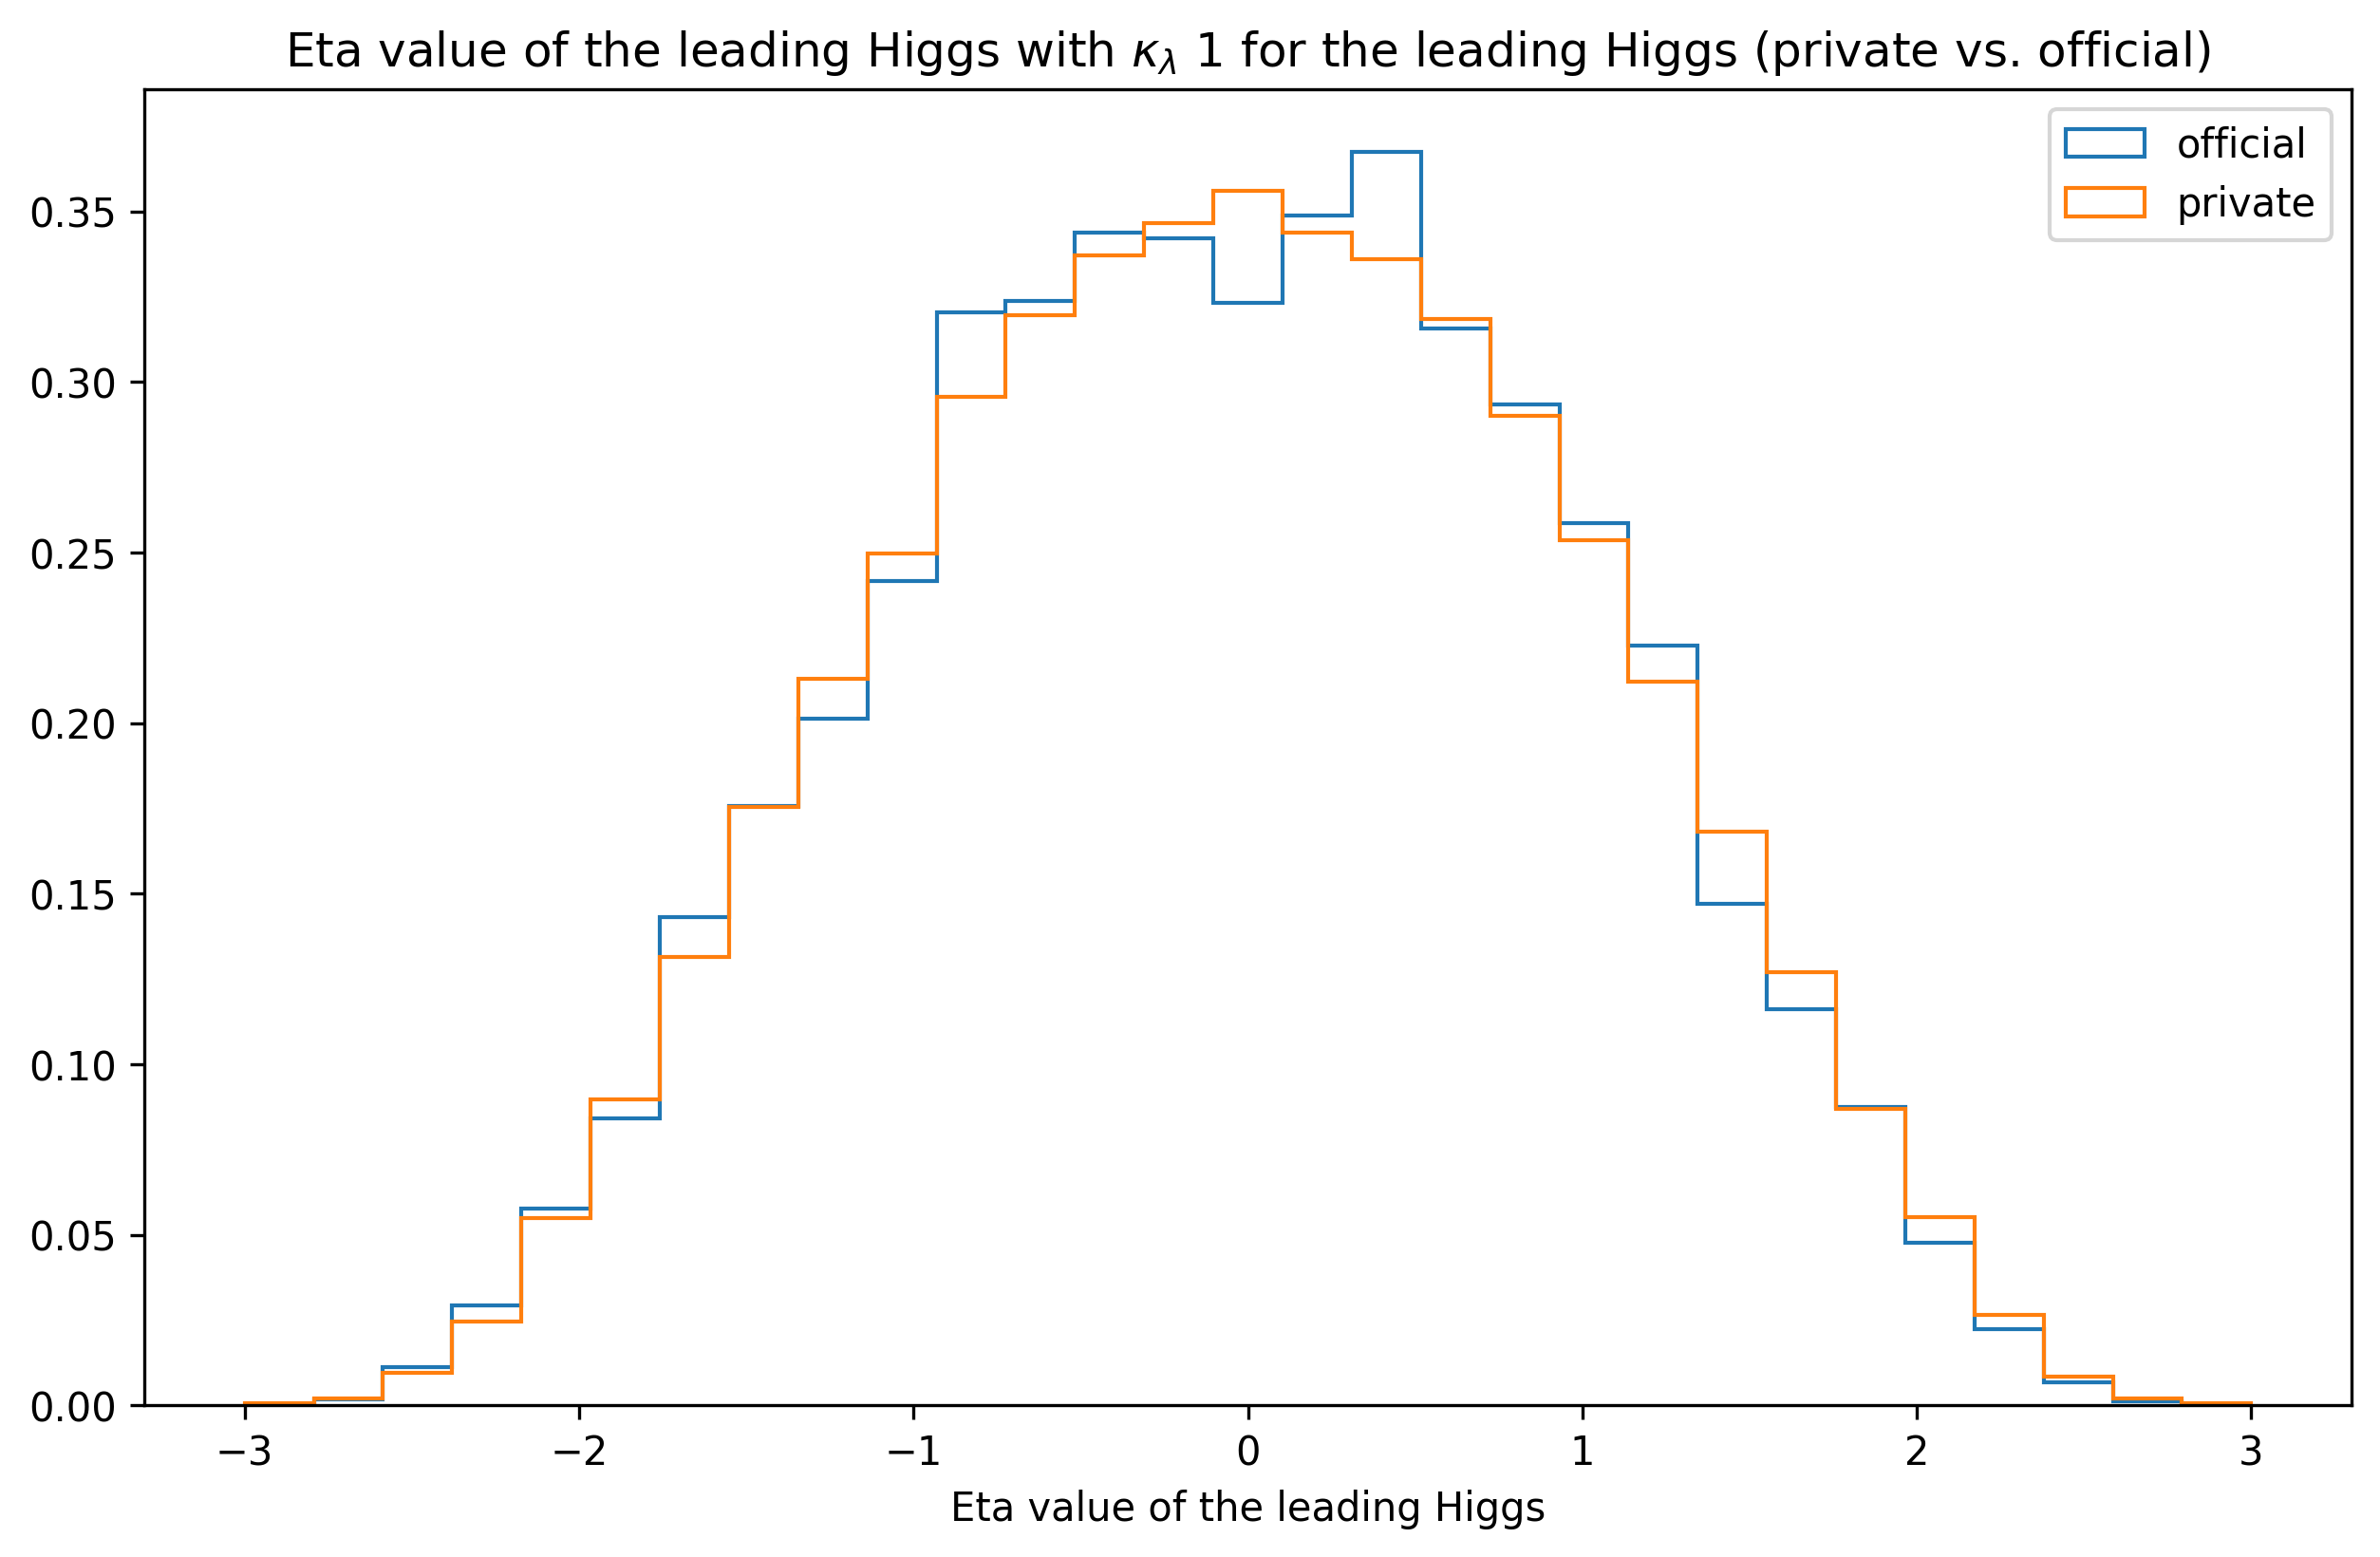

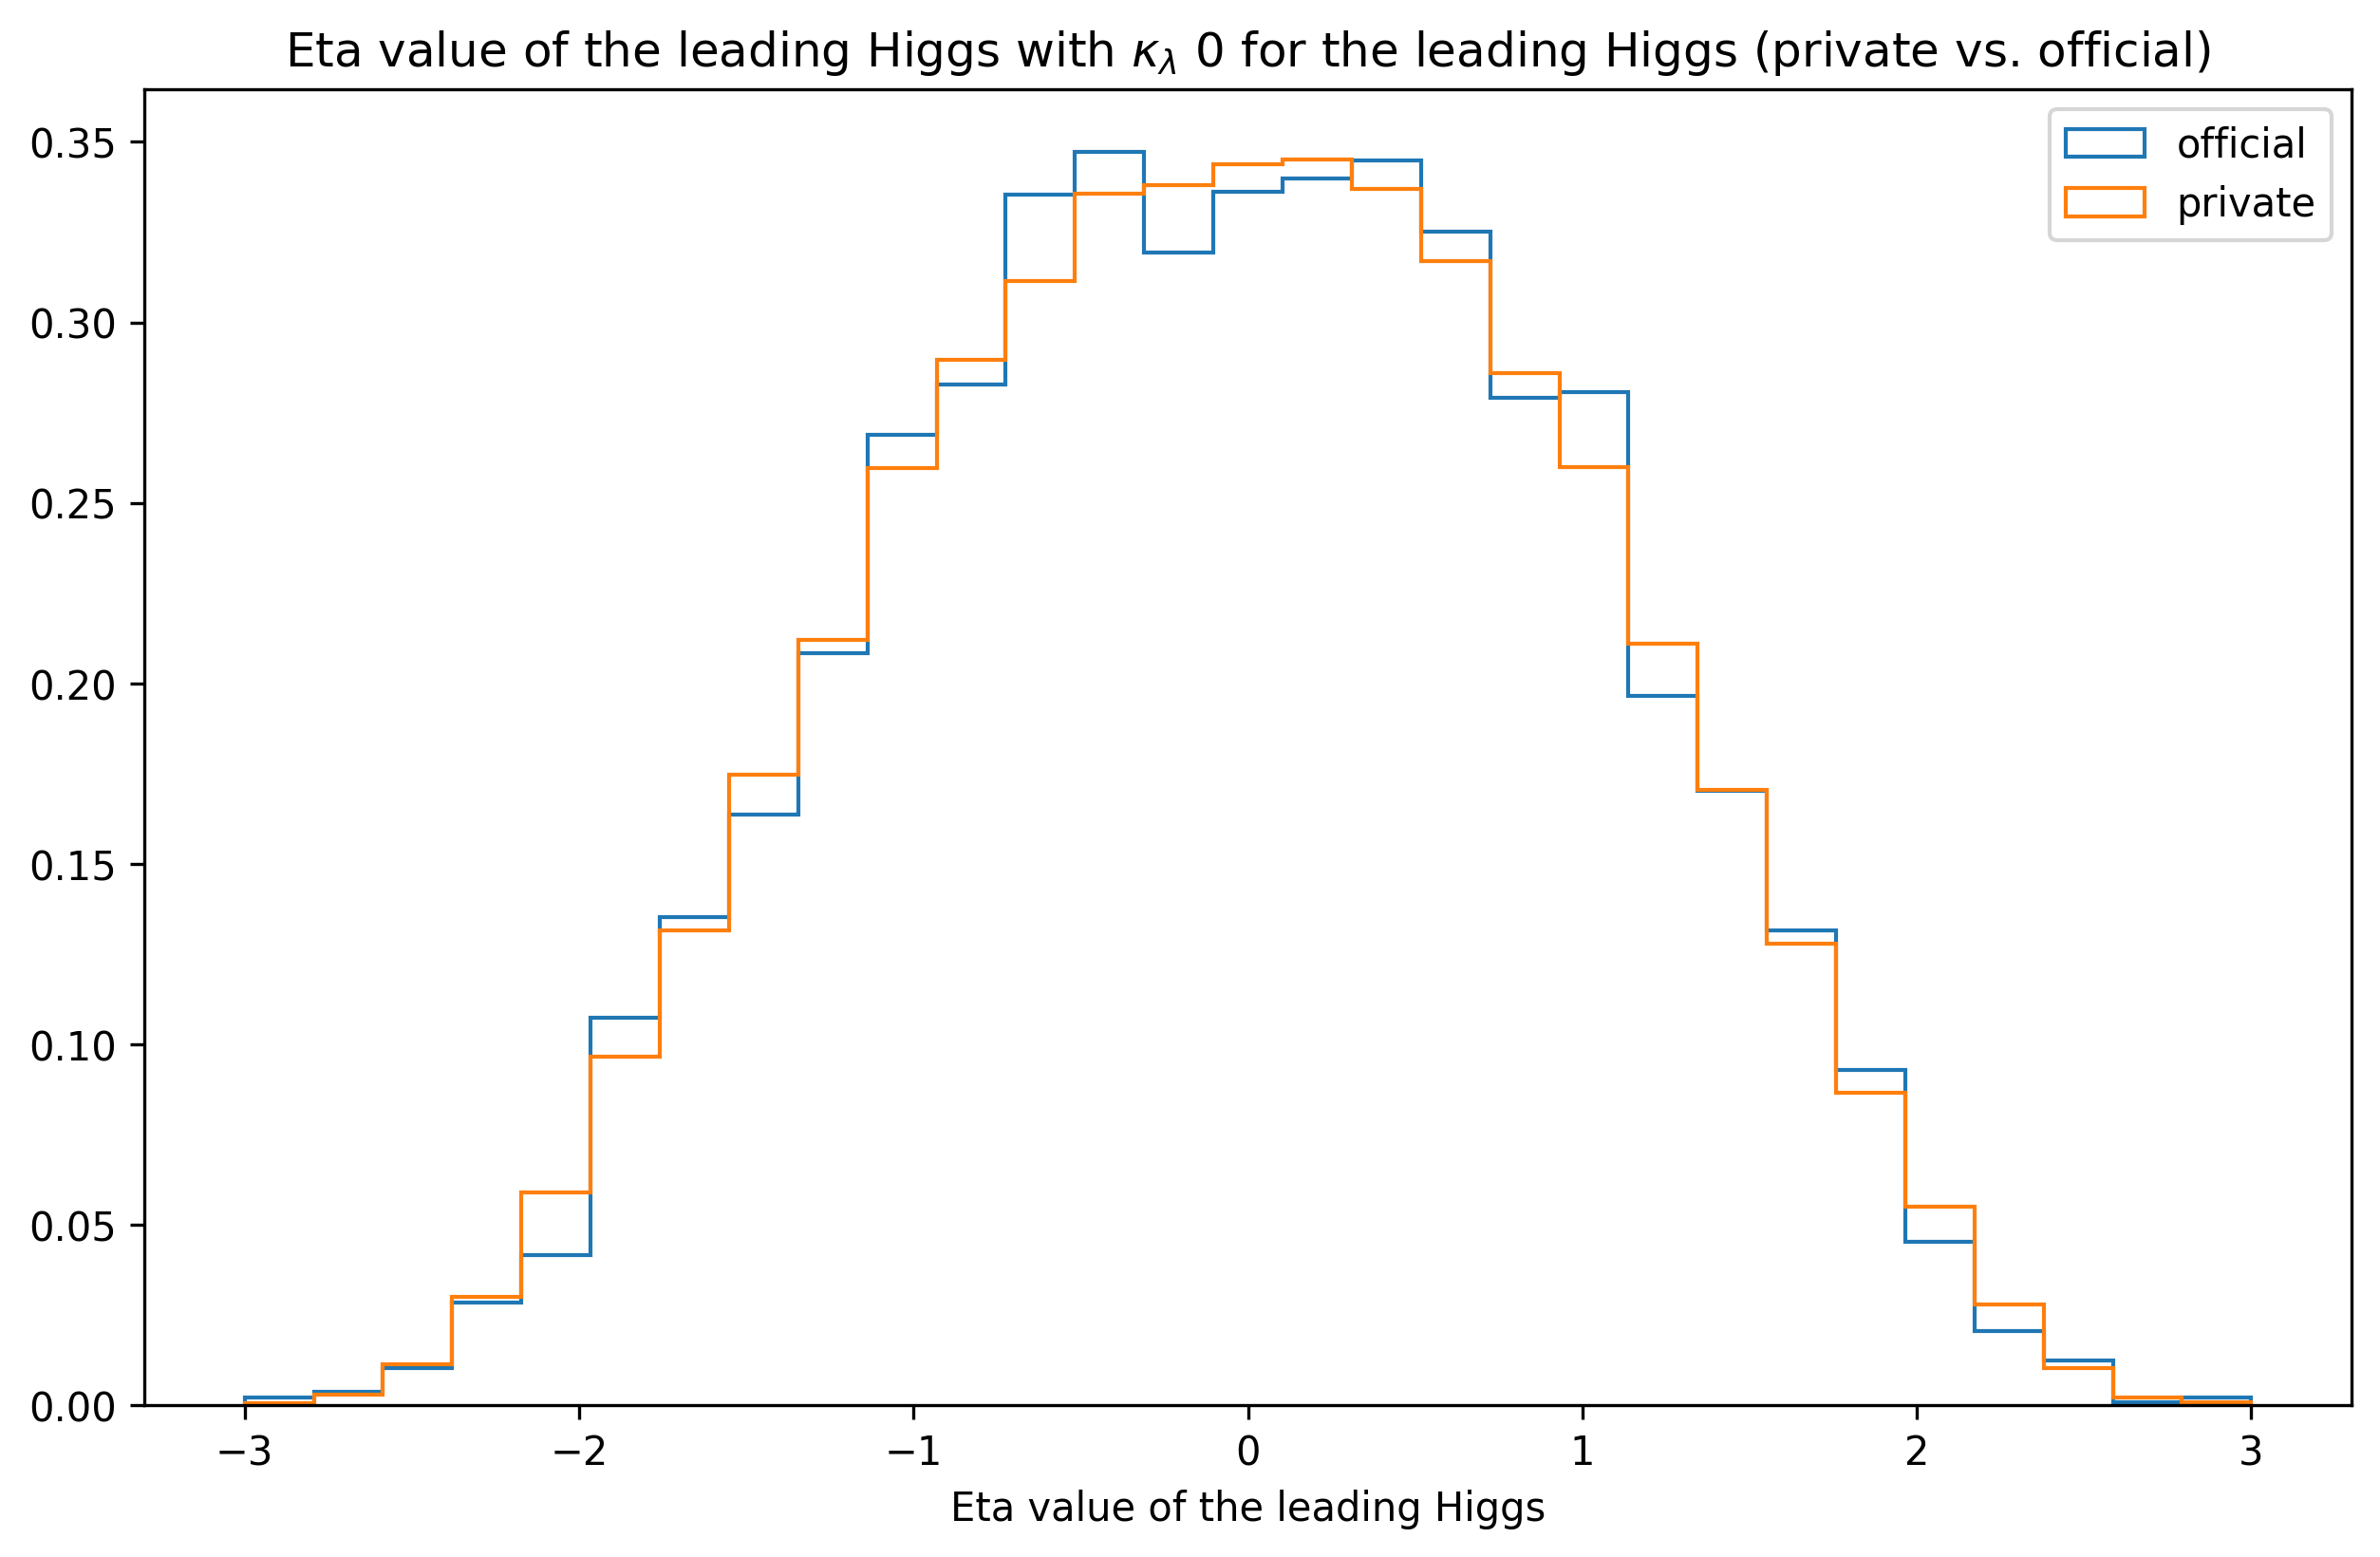

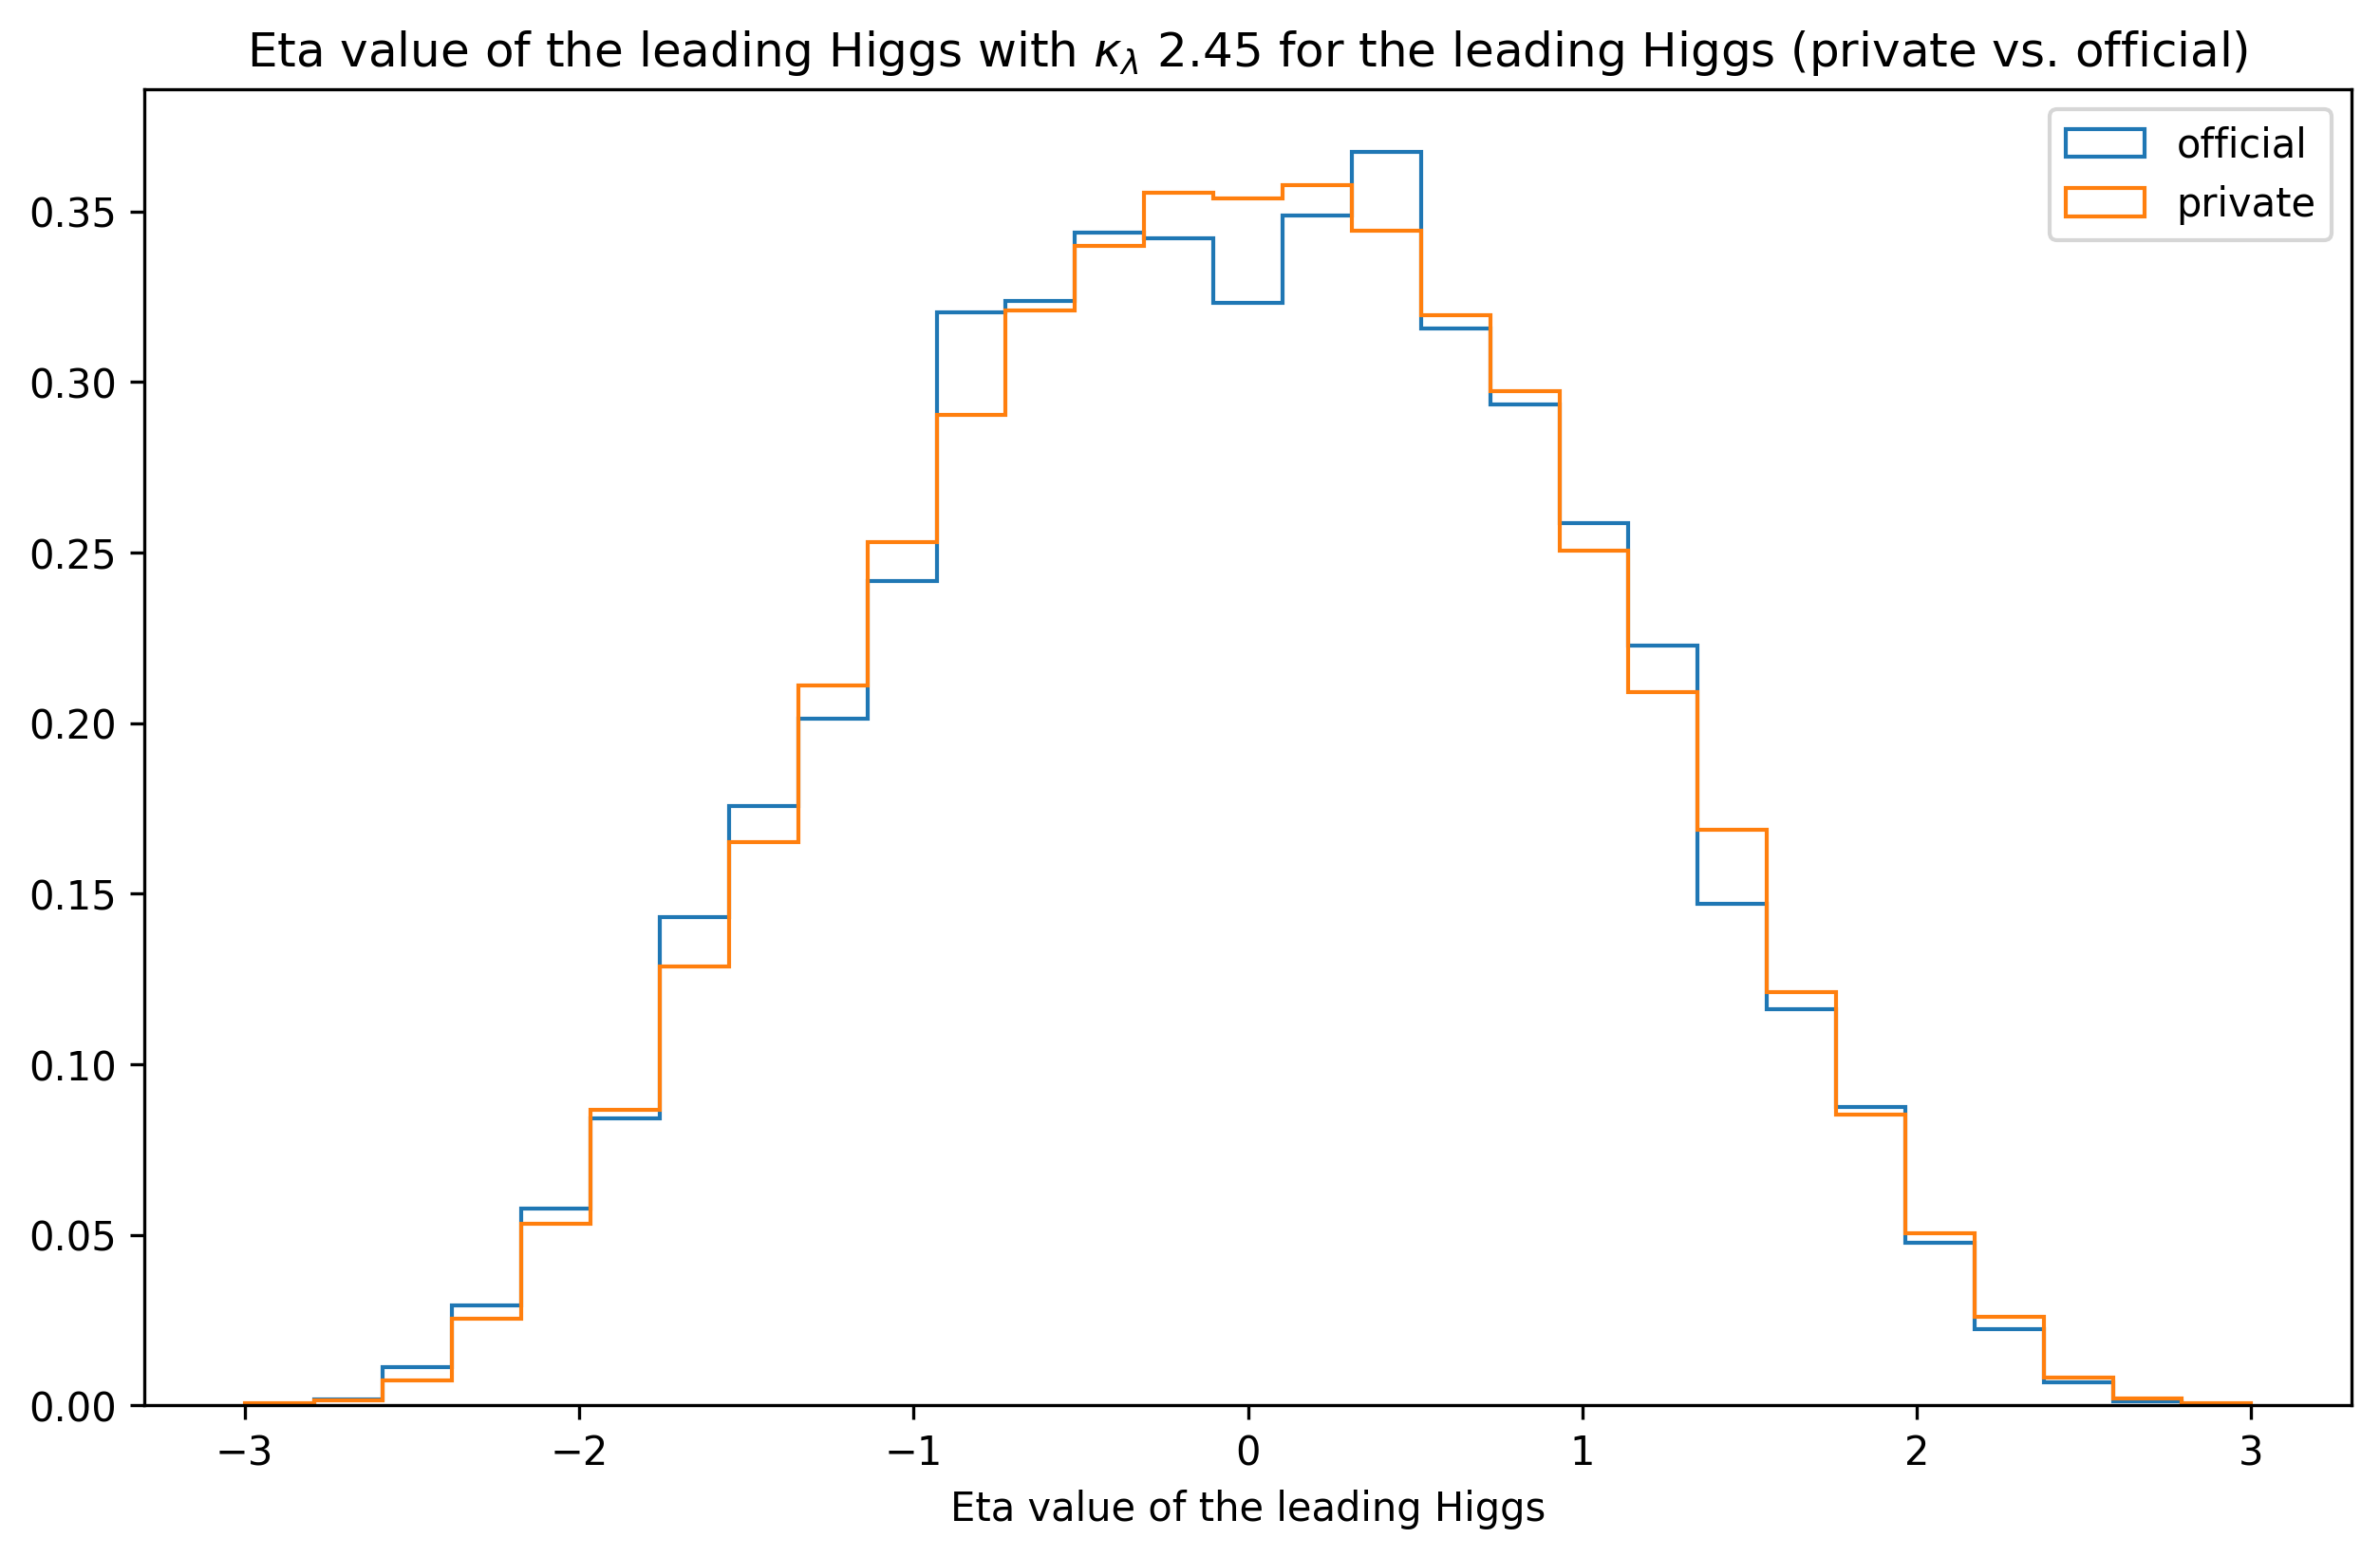

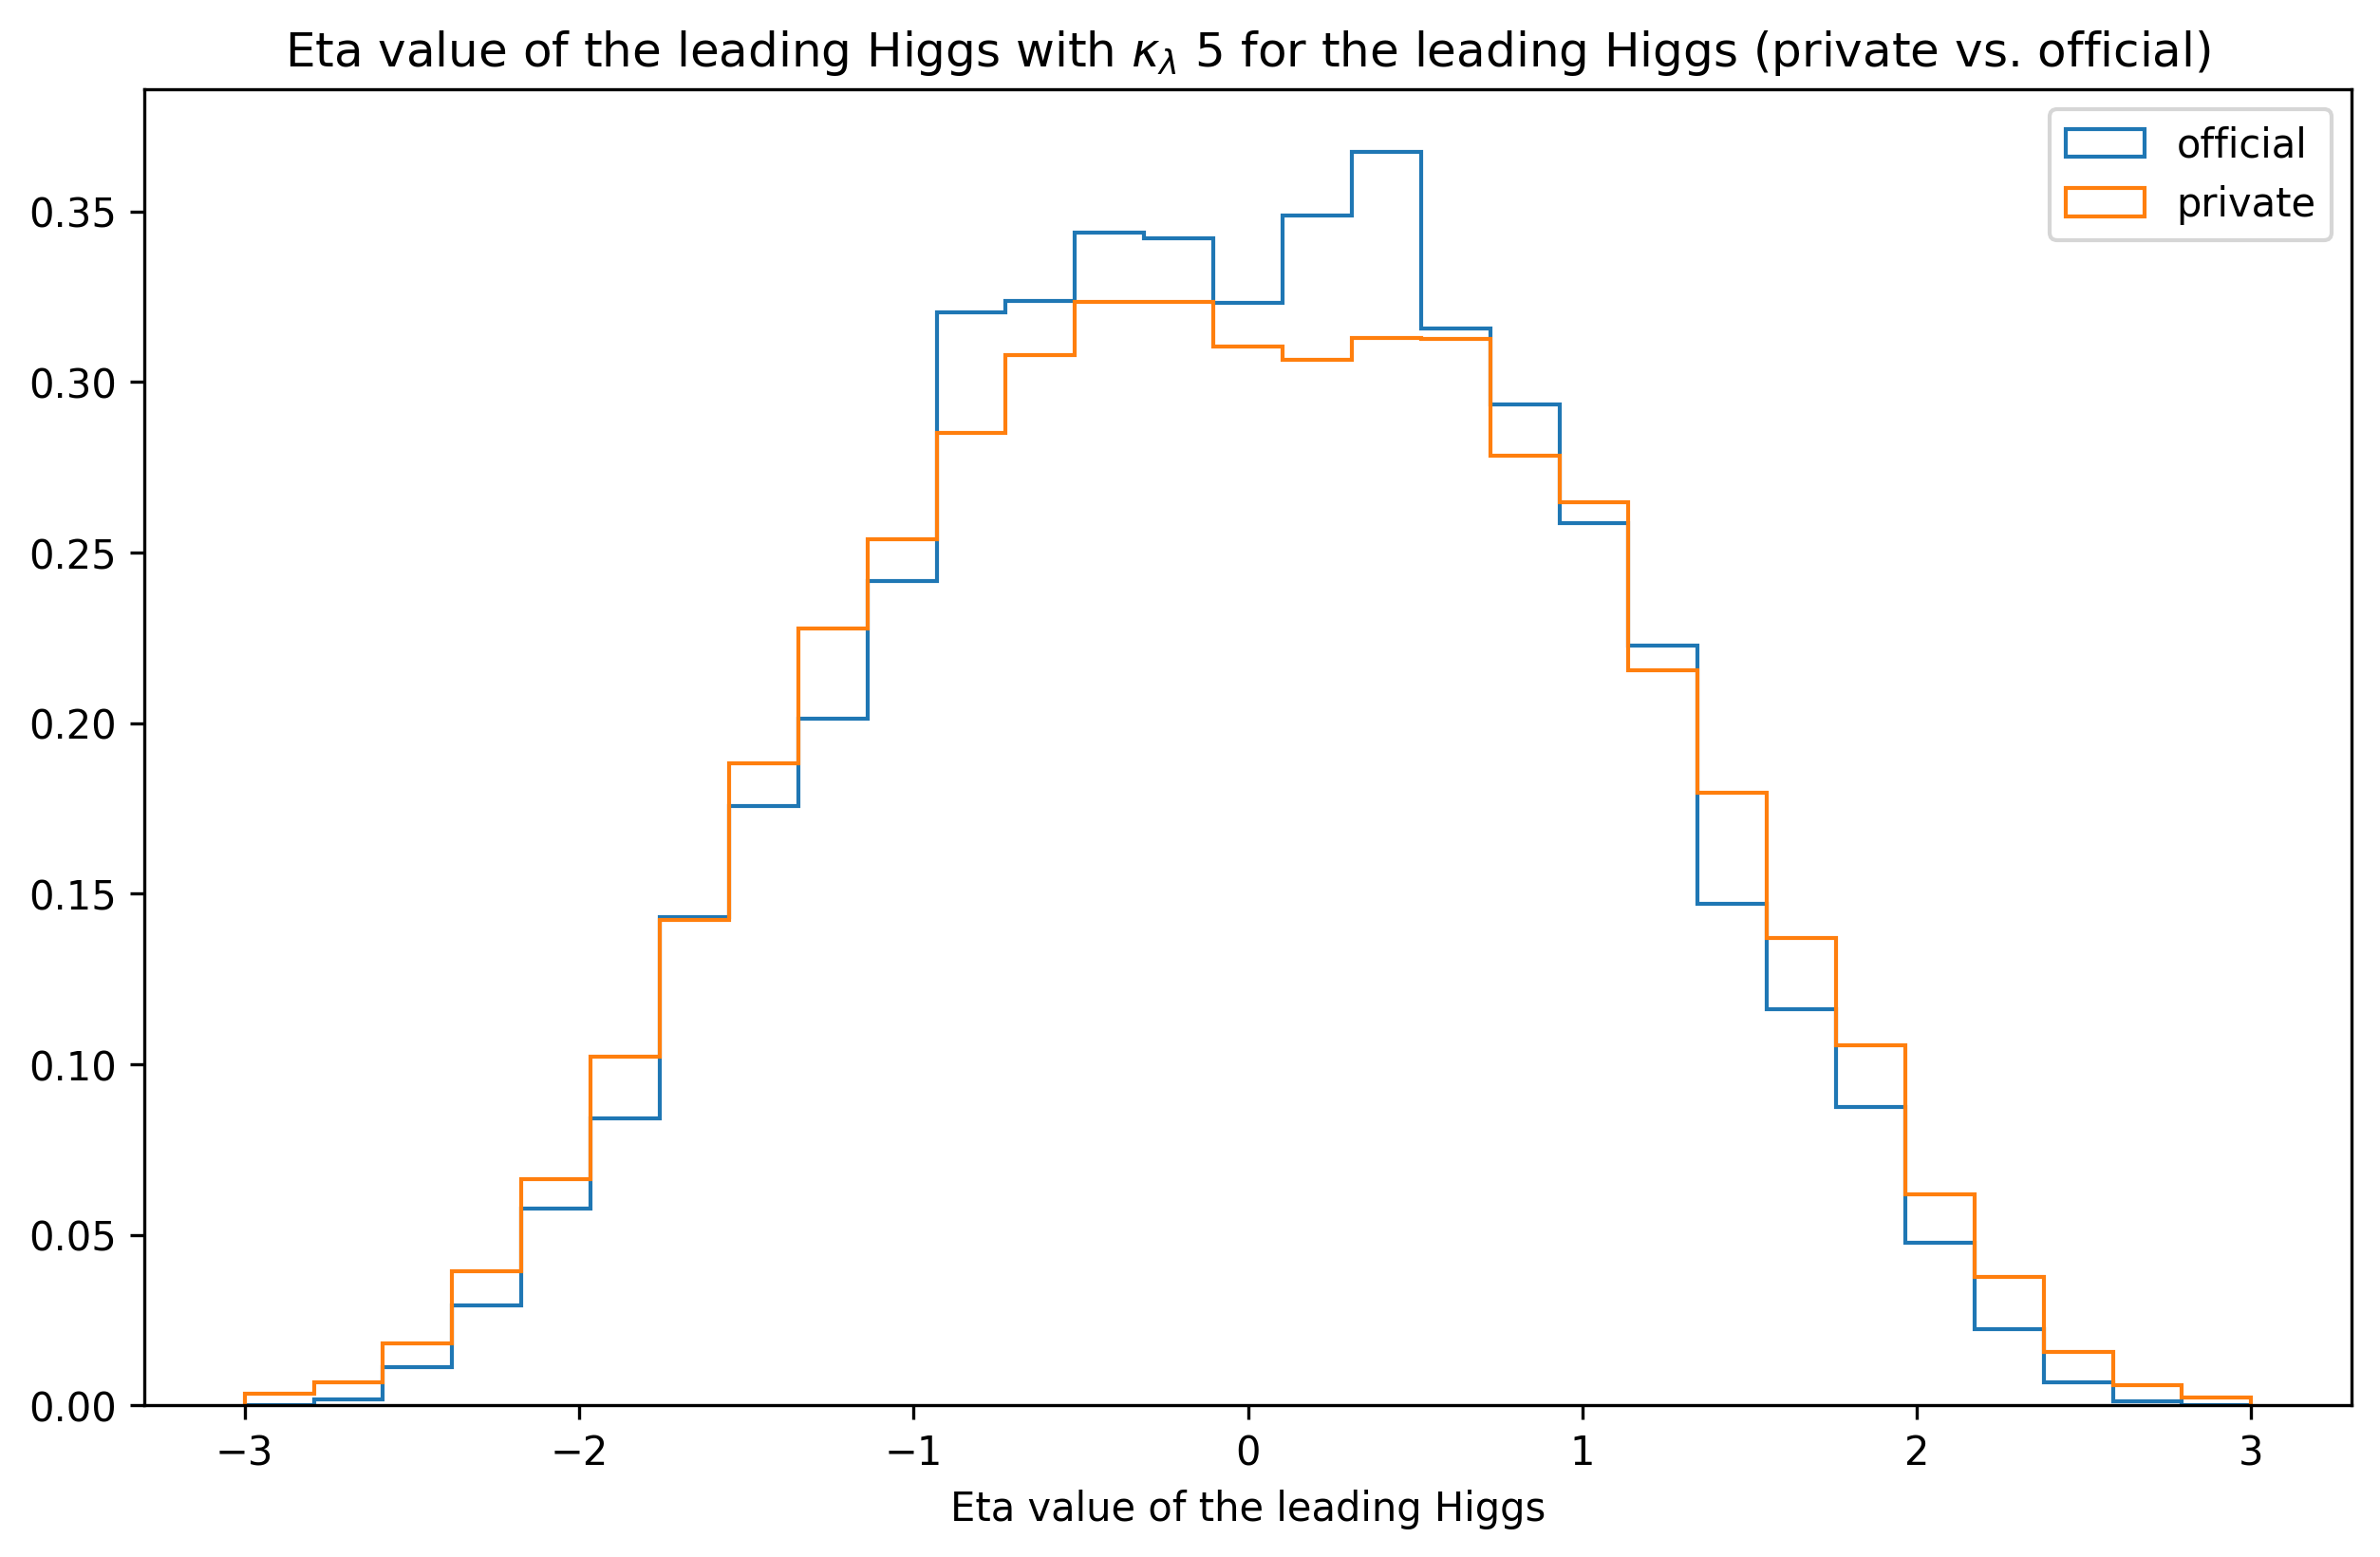

In [128]:

kl_value=["$\kappa_\lambda 1$","$\kappa_\lambda 0$","$\kappa_\lambda 2.45$","$\kappa_\lambda 5$"]

def plot_higgs_eta(official_data, private_data, kl_value, higgs_number):
    plt.figure(figsize=(10, 6))
    plt.hist(official_data.eta, bins=np.linspace(-3, 3, 30), histtype="step", label="official", density=True)
    plt.hist(private_data.eta, bins=np.linspace(-3, 3, 30), histtype="step", label="private", density=True)
    
    plt.xlabel("Eta value of the leading Higgs")
    plt.title(f"Eta value of the leading Higgs with $\\kappa_\\lambda$ {kl_value} for the {higgs_number} Higgs (private vs. official)")
    plt.legend()
    plt.show()
    
plot_higgs_eta(reco_higgs_1_kl_1_official, reco_higgs_1_kl_1_private, 1, "leading")
plot_higgs_eta(reco_higgs_1_kl_0_official, reco_higgs_1_kl_0_private, 0, "leading")
plot_higgs_eta(reco_higgs_1_kl_2p45_official, reco_higgs_1_kl_2p45_private, 2.45, "leading")
plot_higgs_eta(reco_higgs_1_kl_5_official, reco_higgs_1_kl_5_private, 5, "leading")


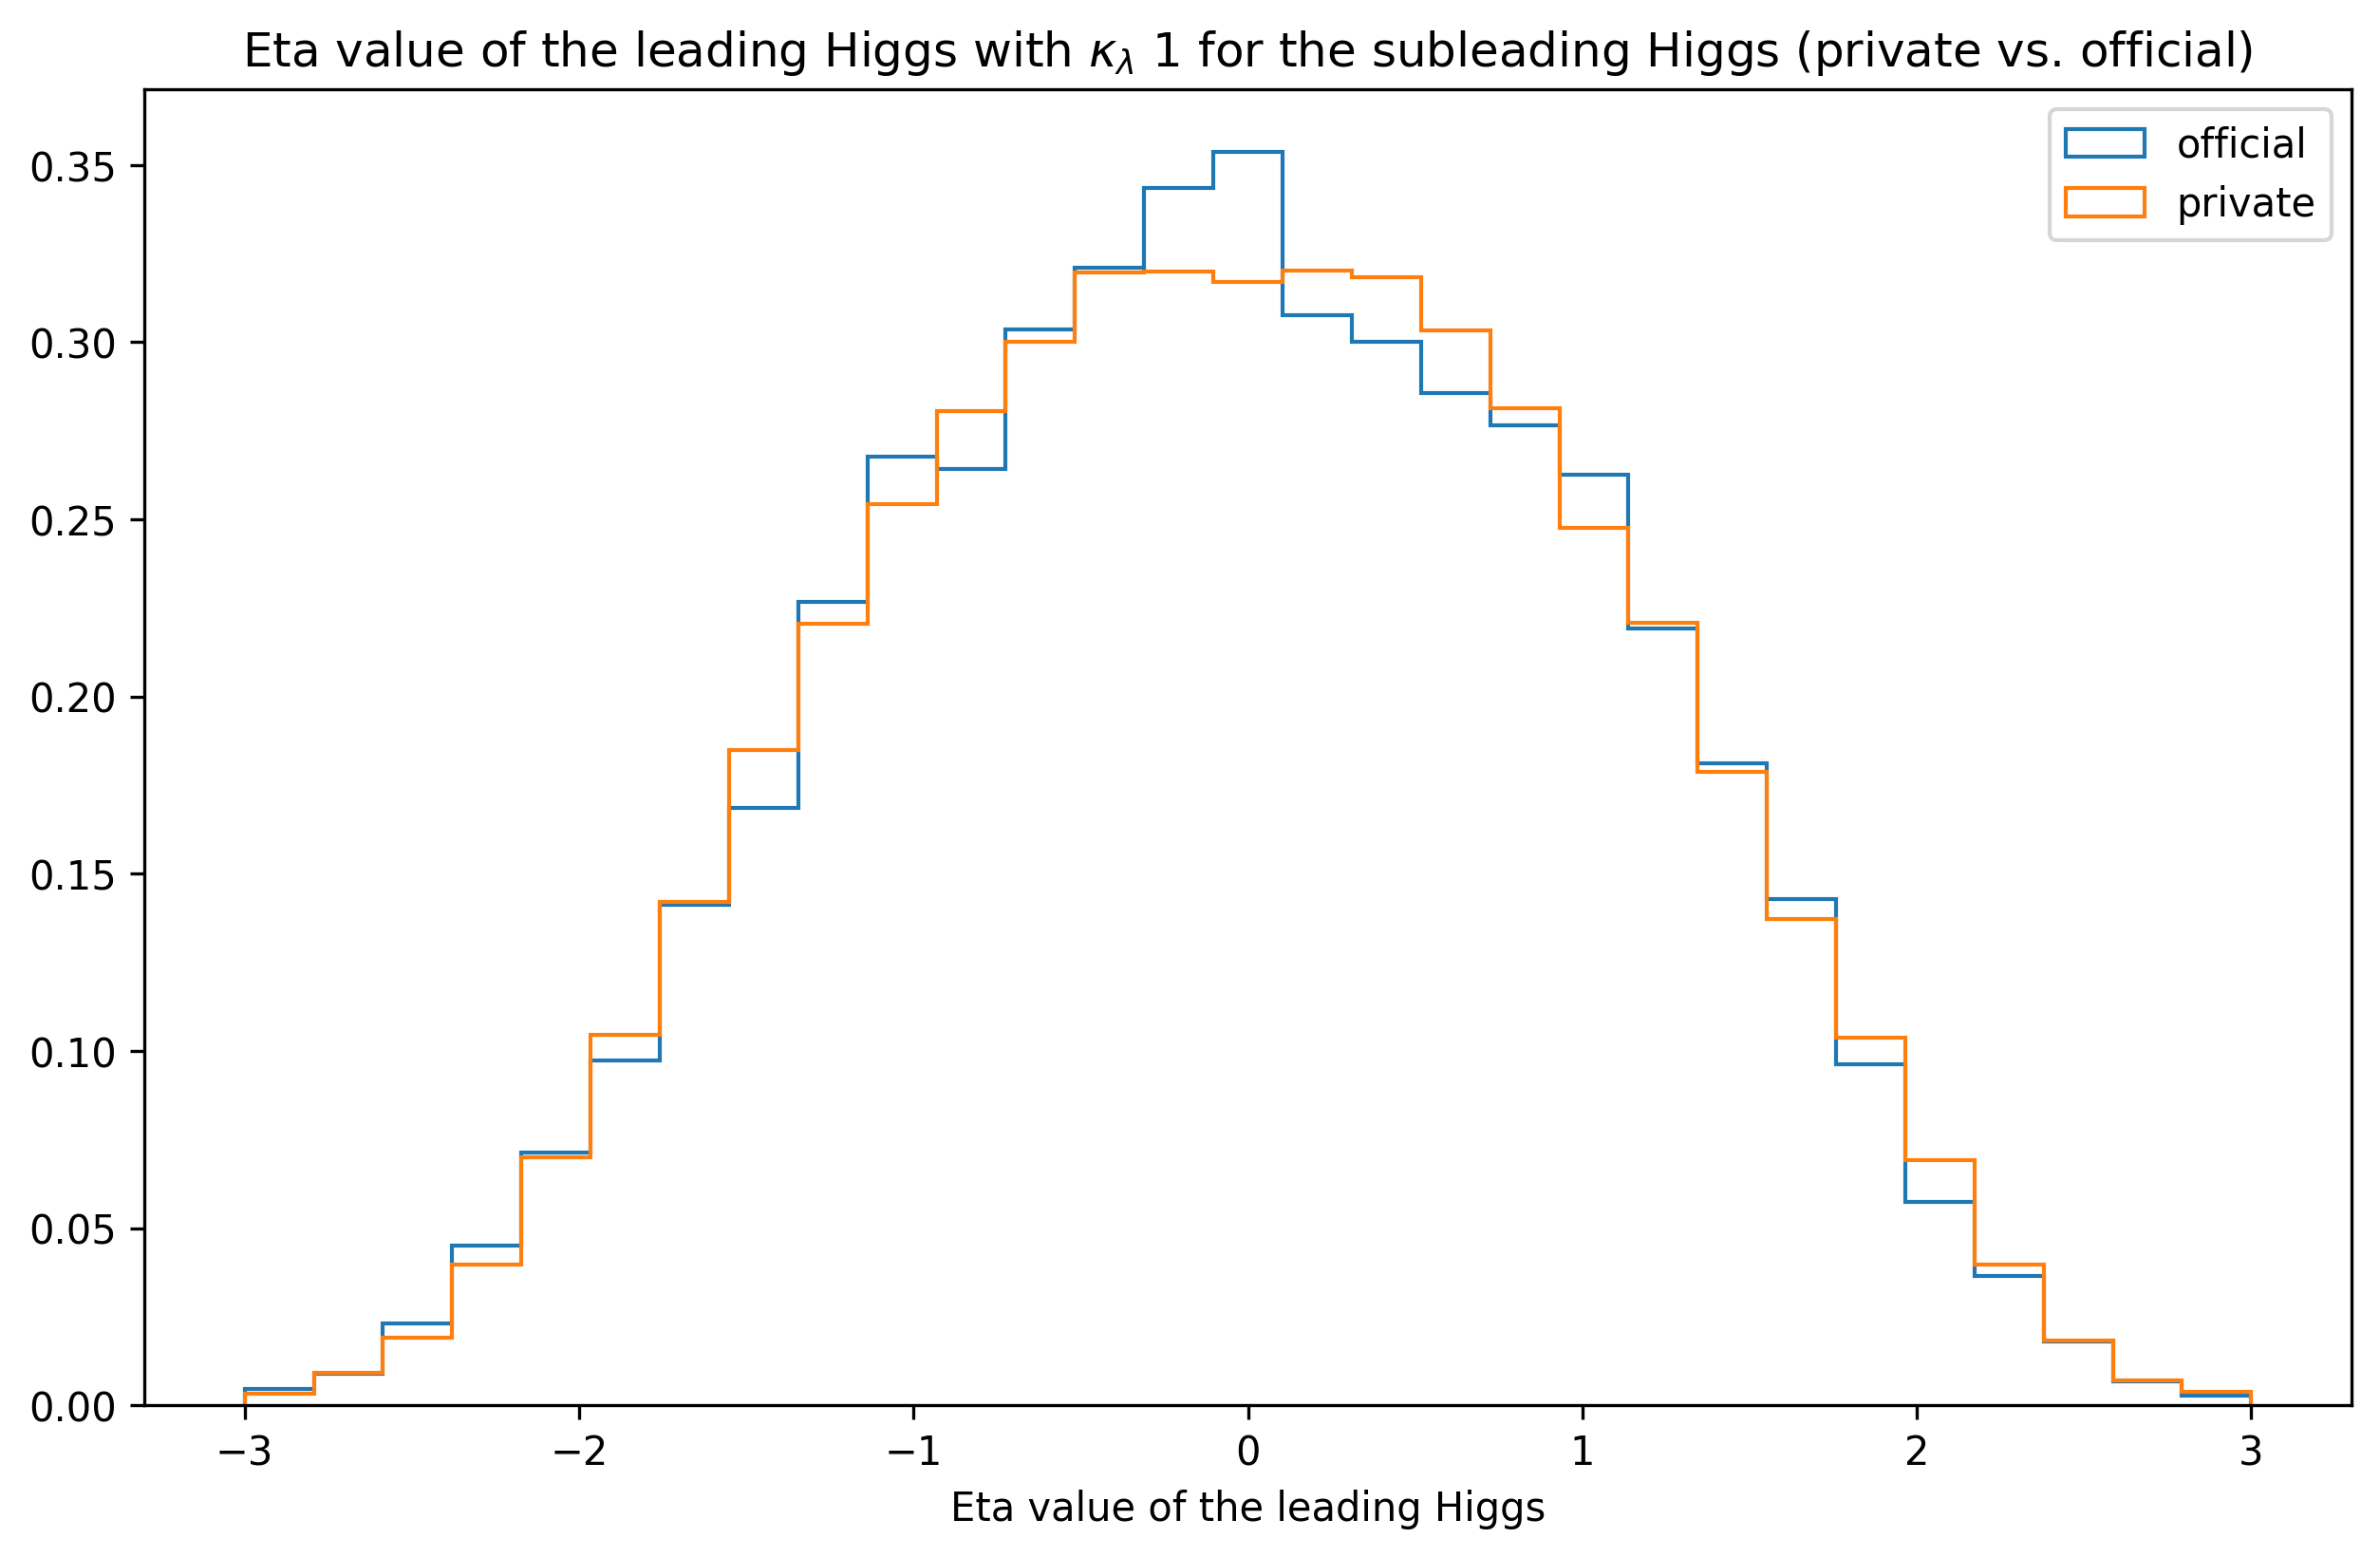

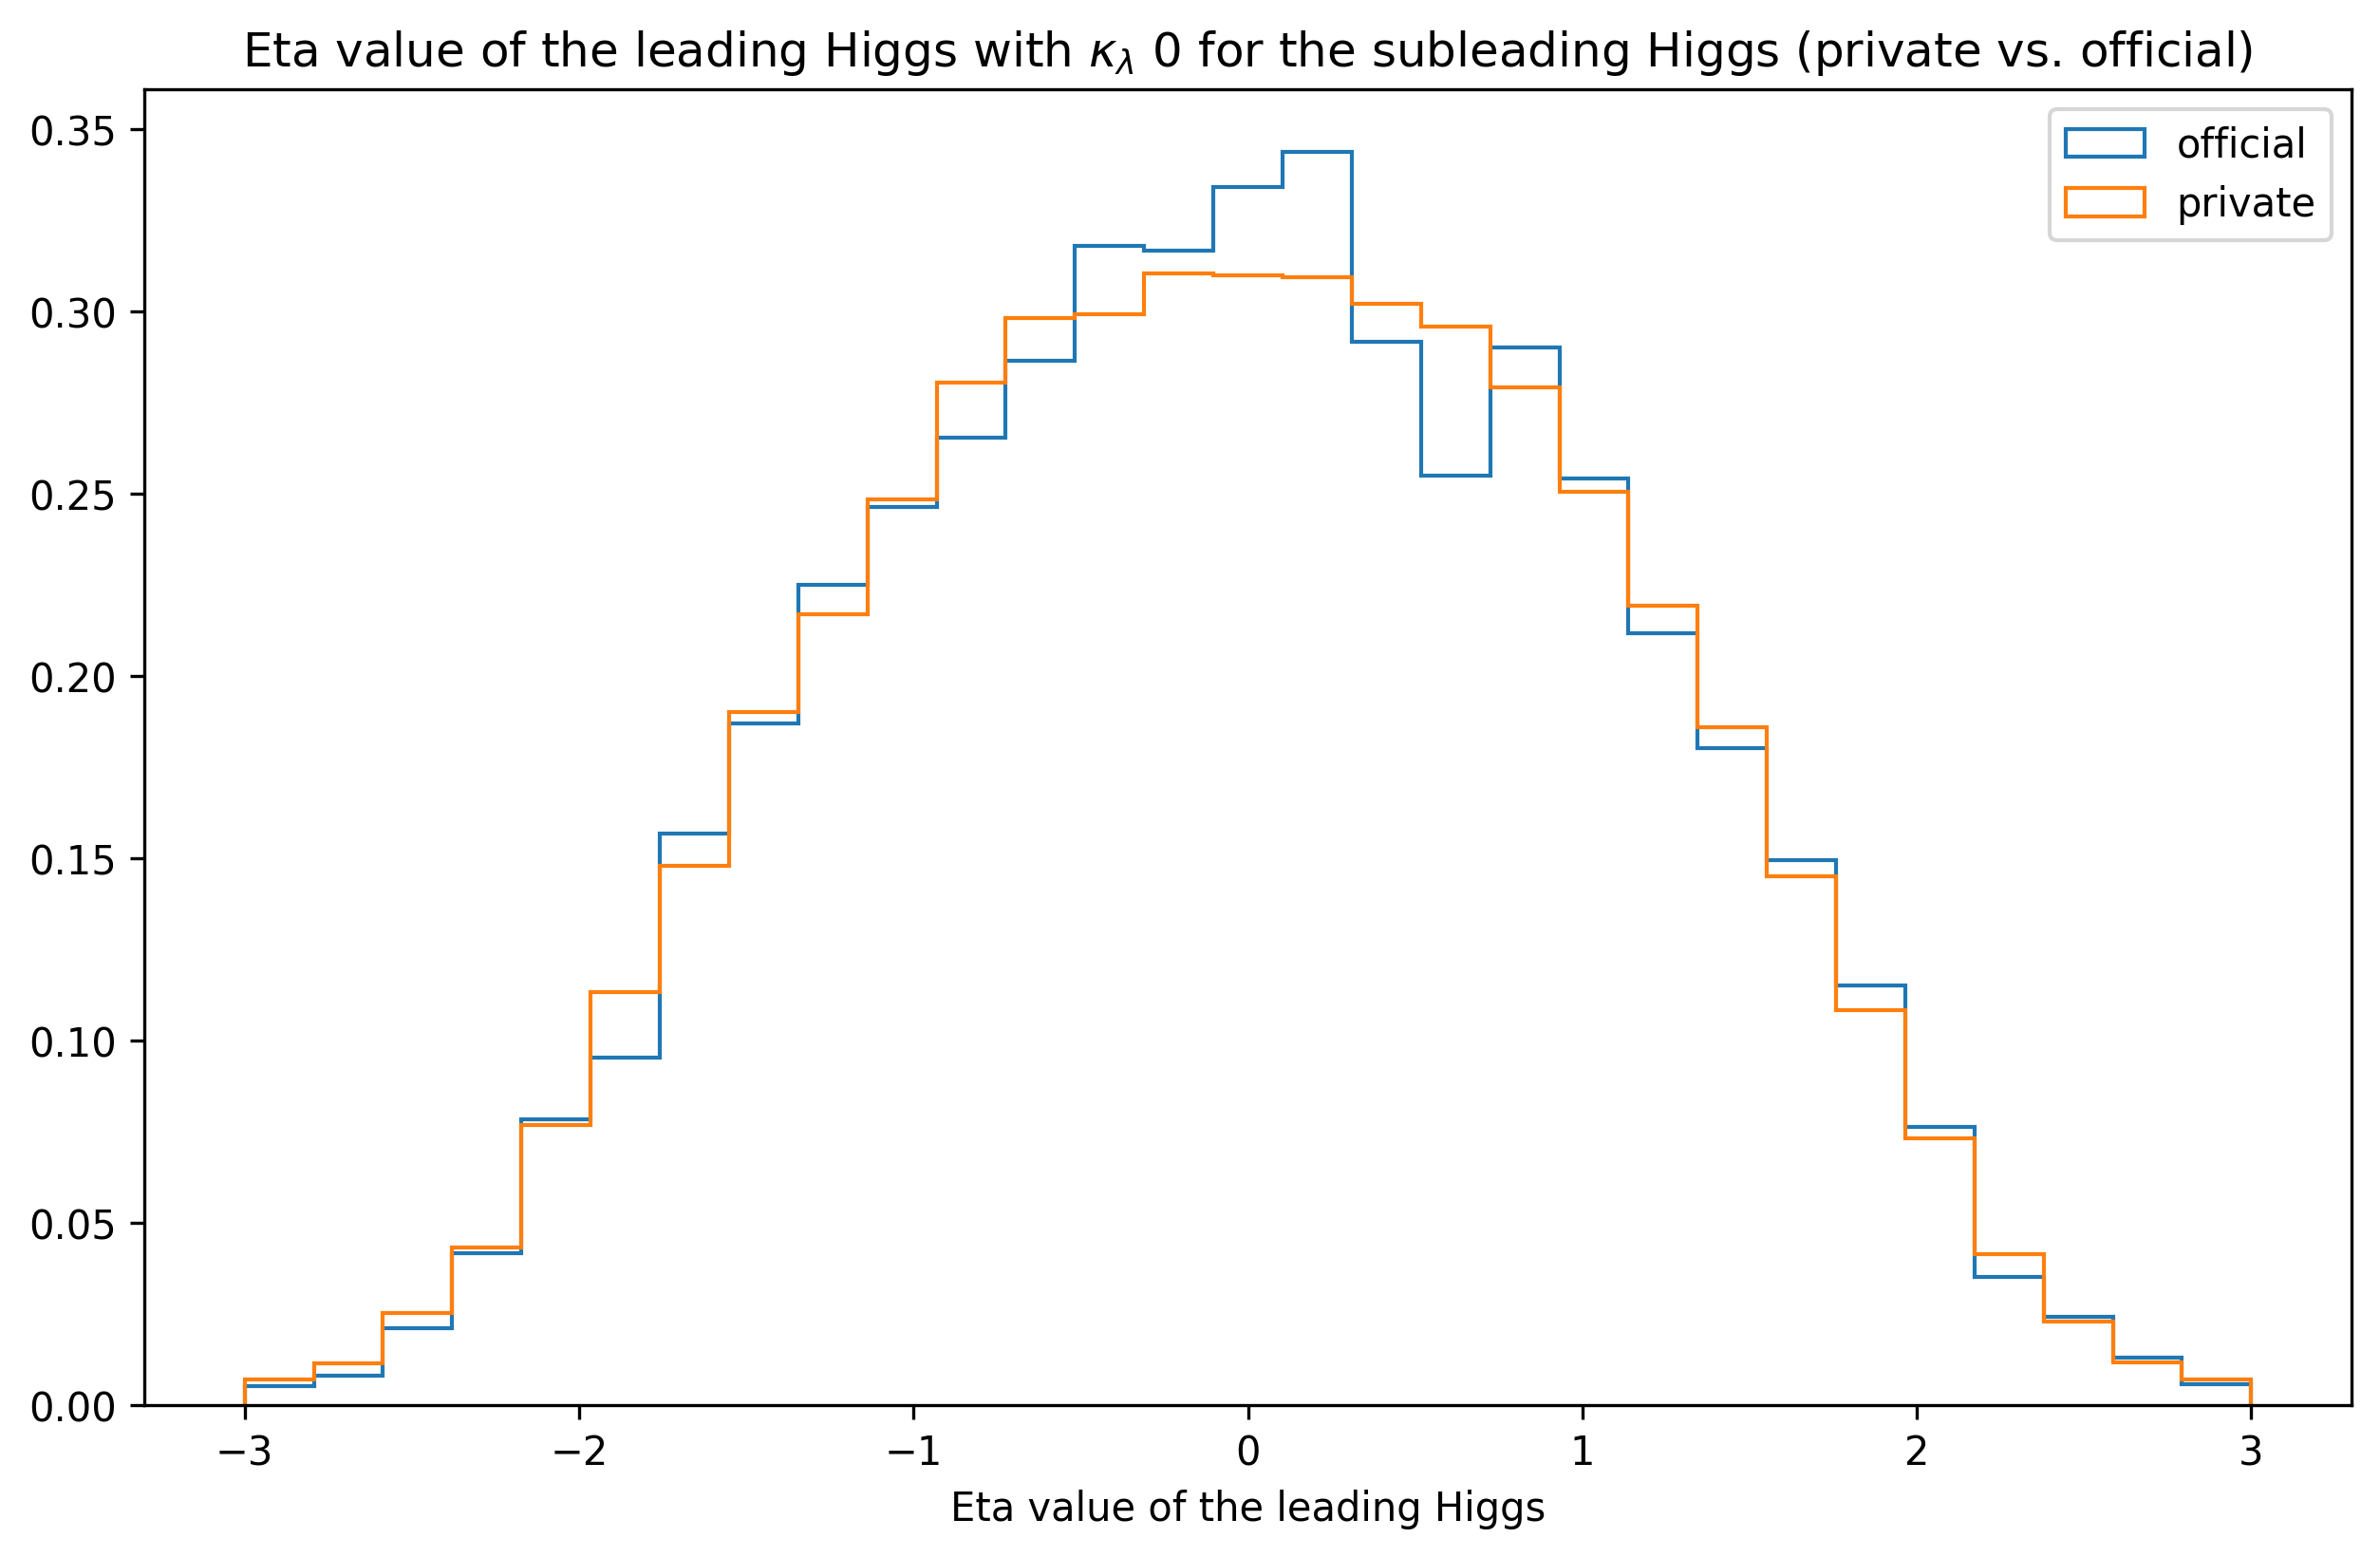

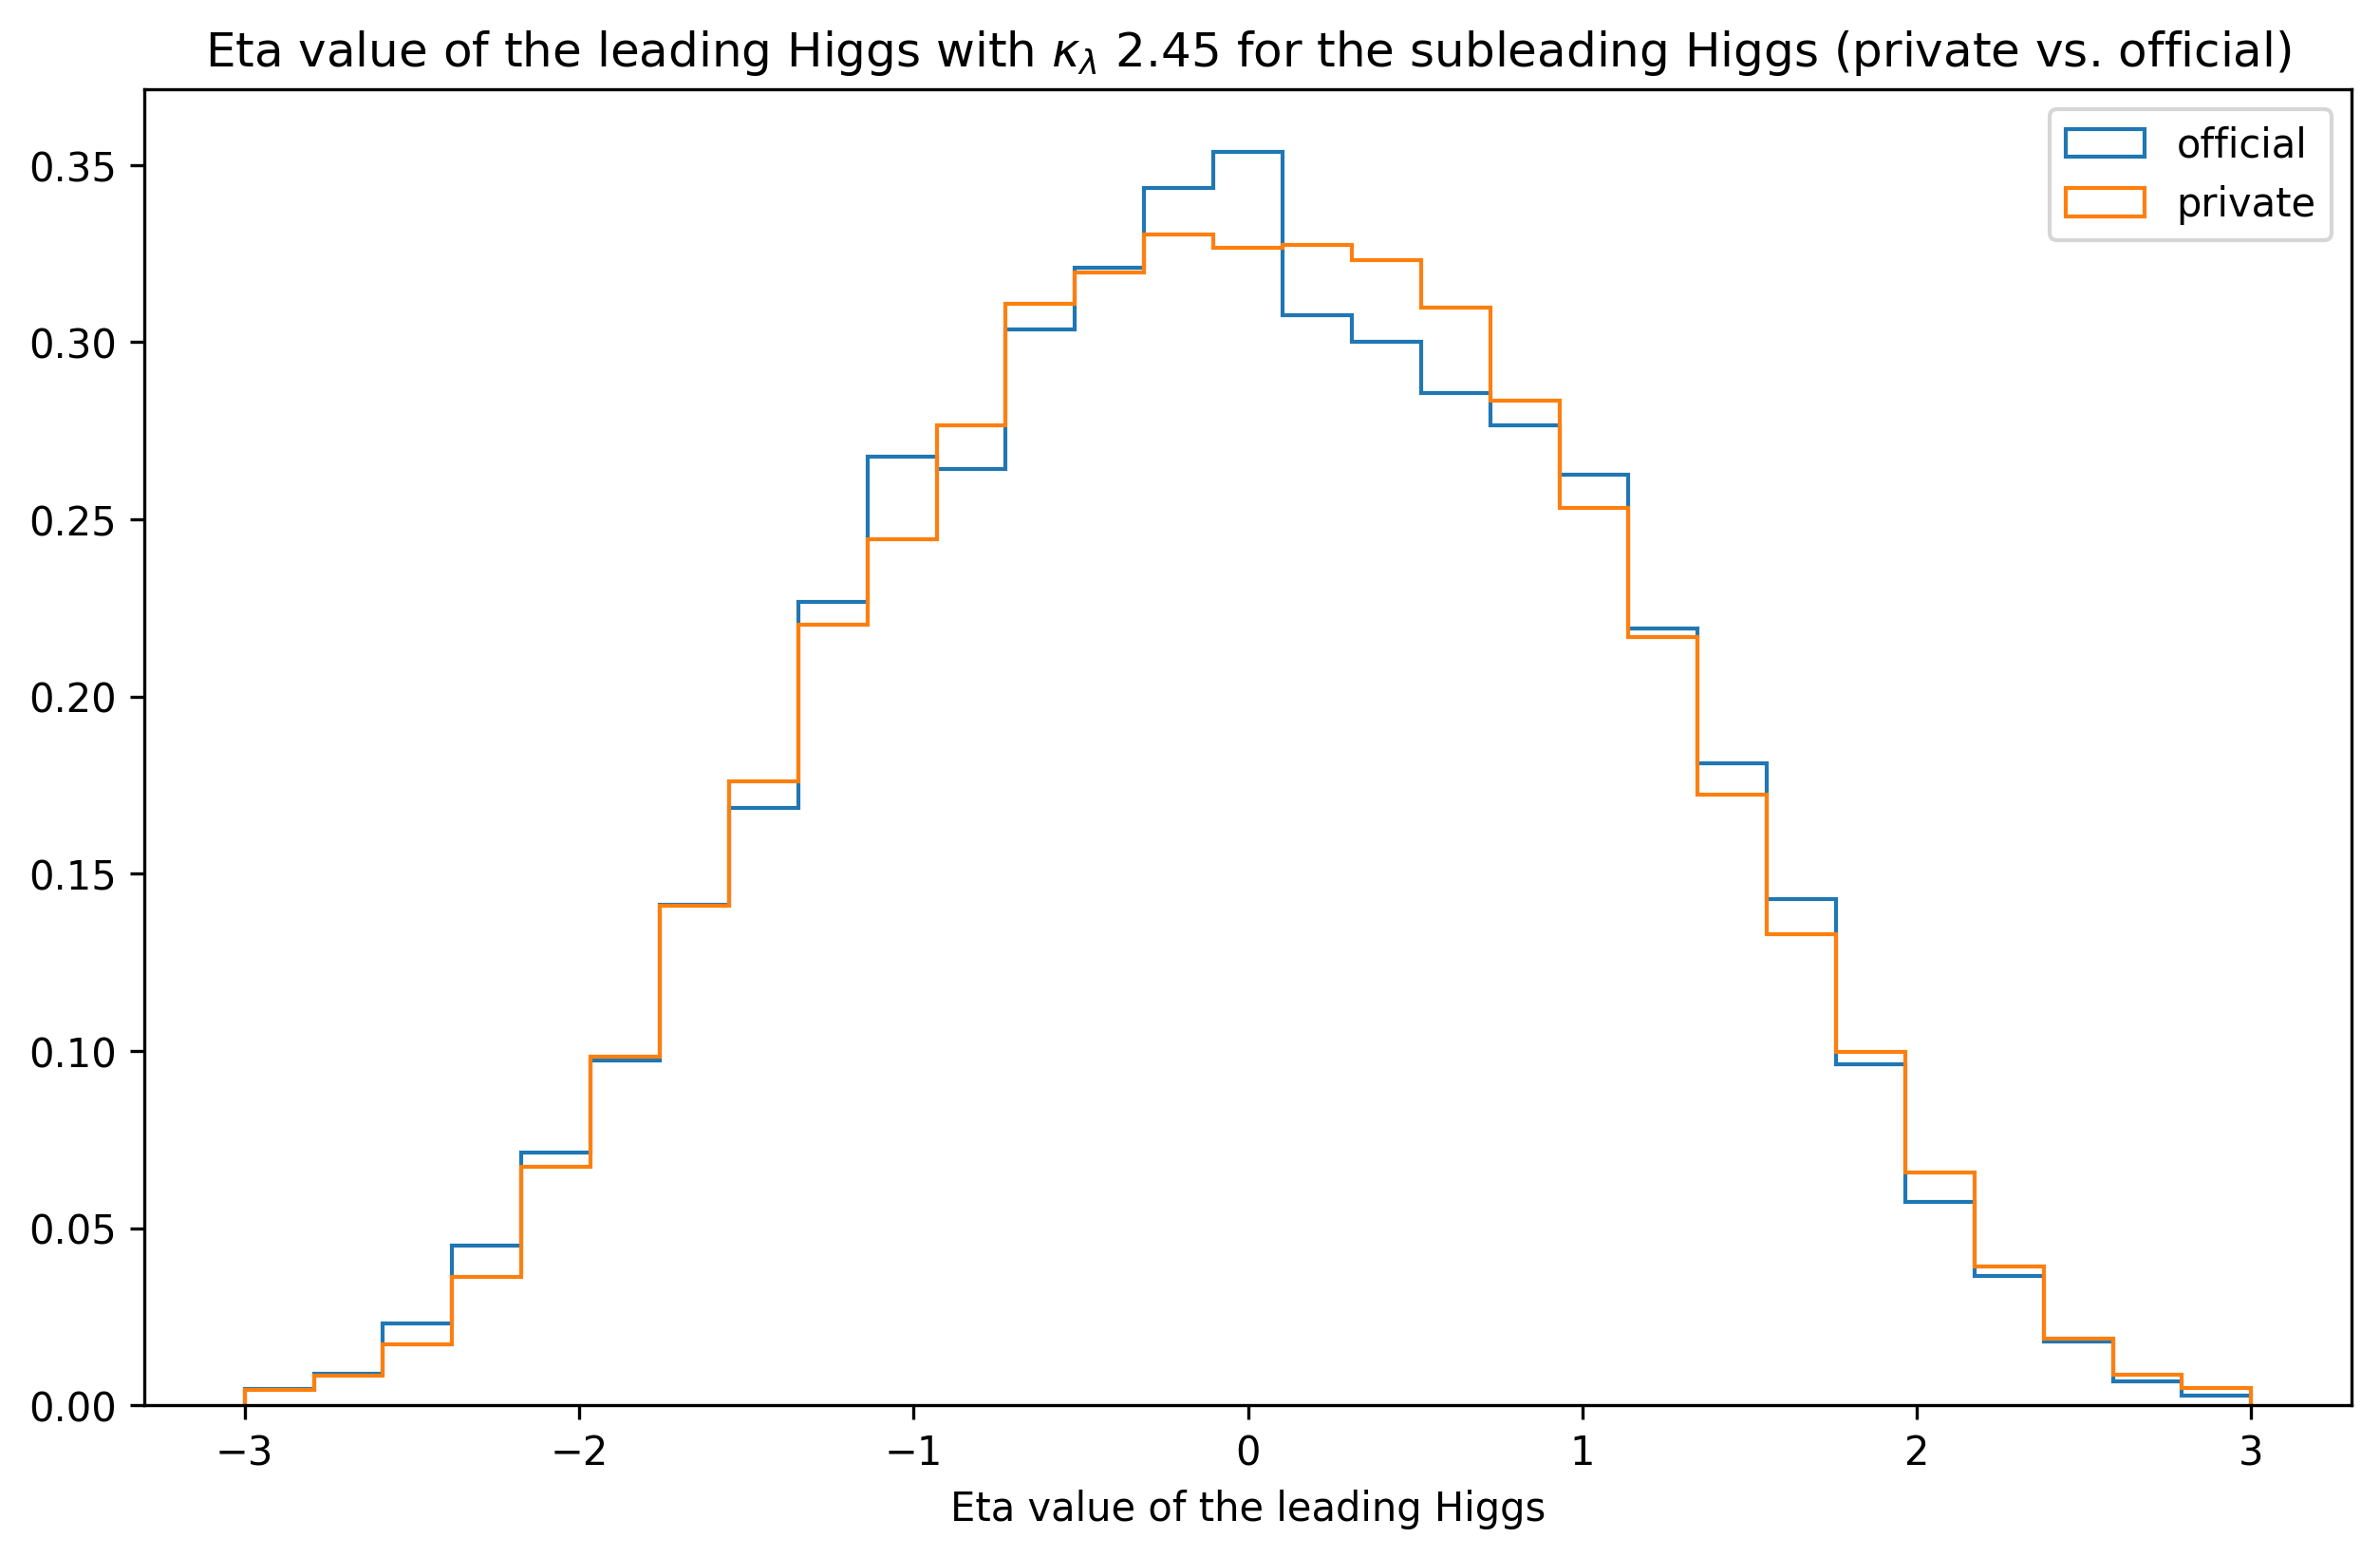

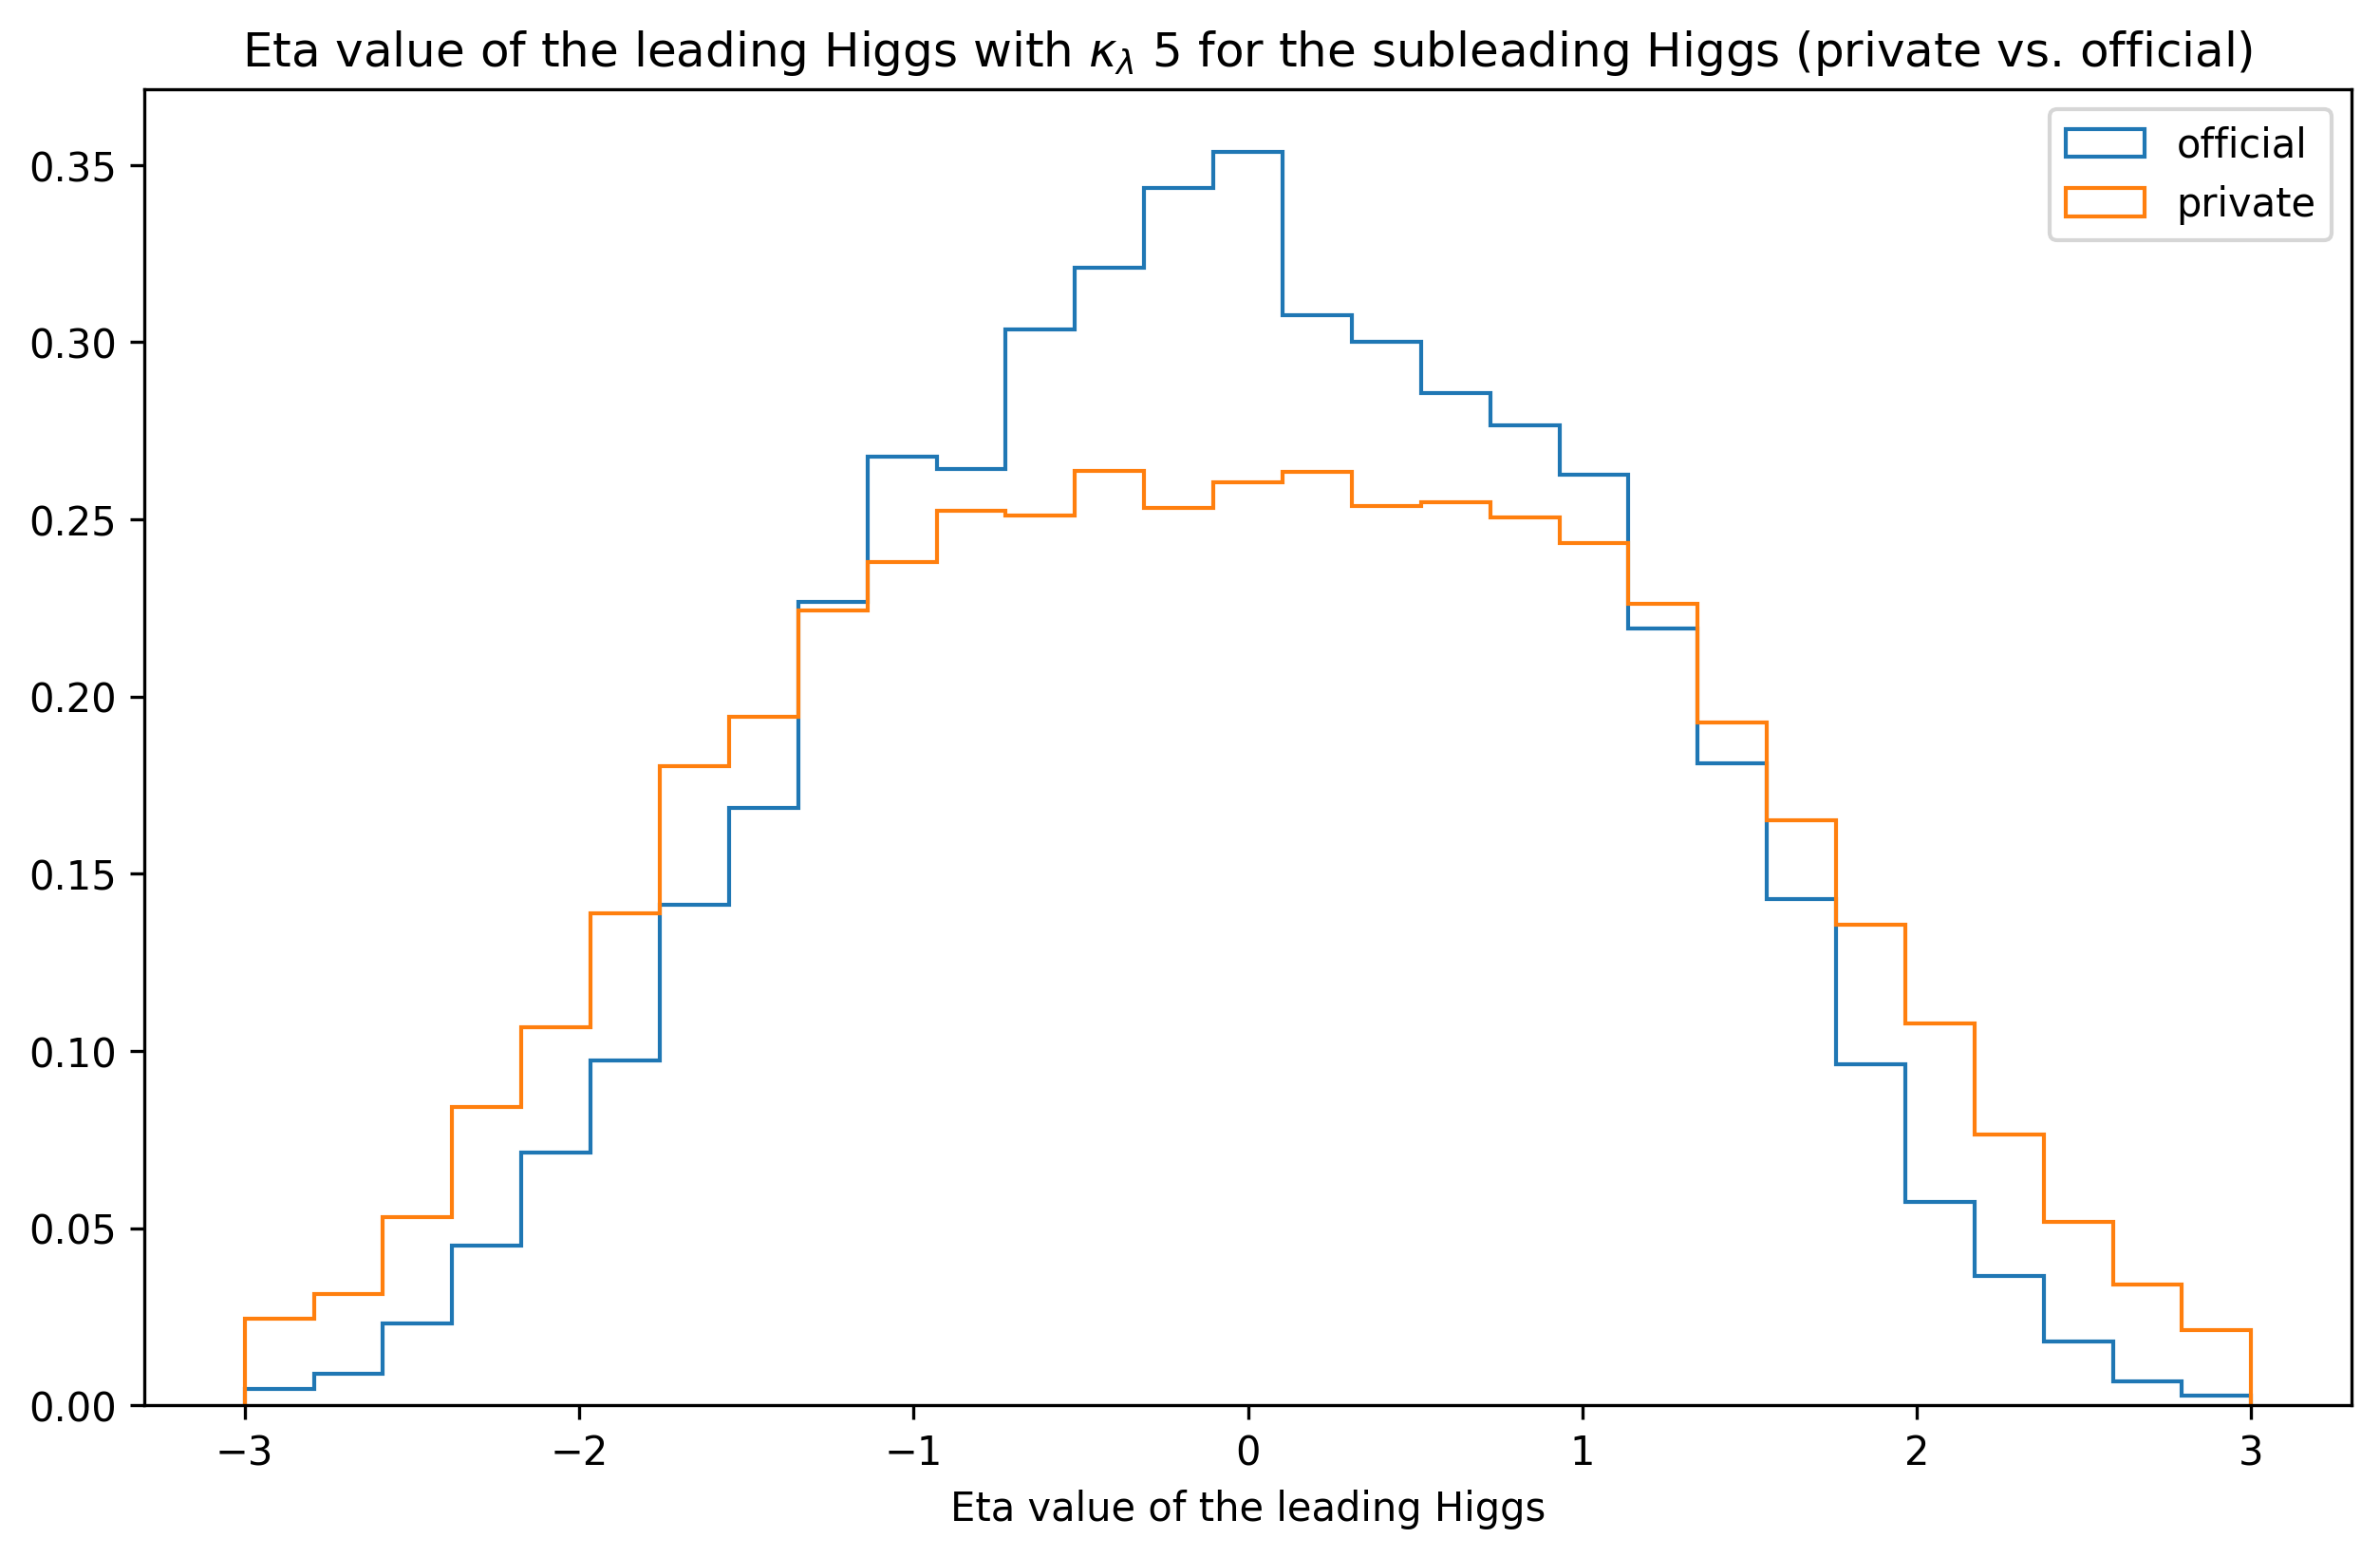

In [129]:
plot_higgs_eta(reco_higgs_2_kl_1_official, reco_higgs_2_kl_1_private, 1, "subleading")
plot_higgs_eta(reco_higgs_2_kl_0_official, reco_higgs_2_kl_0_private, 0, "subleading")
plot_higgs_eta(reco_higgs_2_kl_2p45_official, reco_higgs_2_kl_2p45_private, 2.45, "subleading")
plot_higgs_eta(reco_higgs_2_kl_5_official, reco_higgs_2_kl_5_private, 5, "subleading")

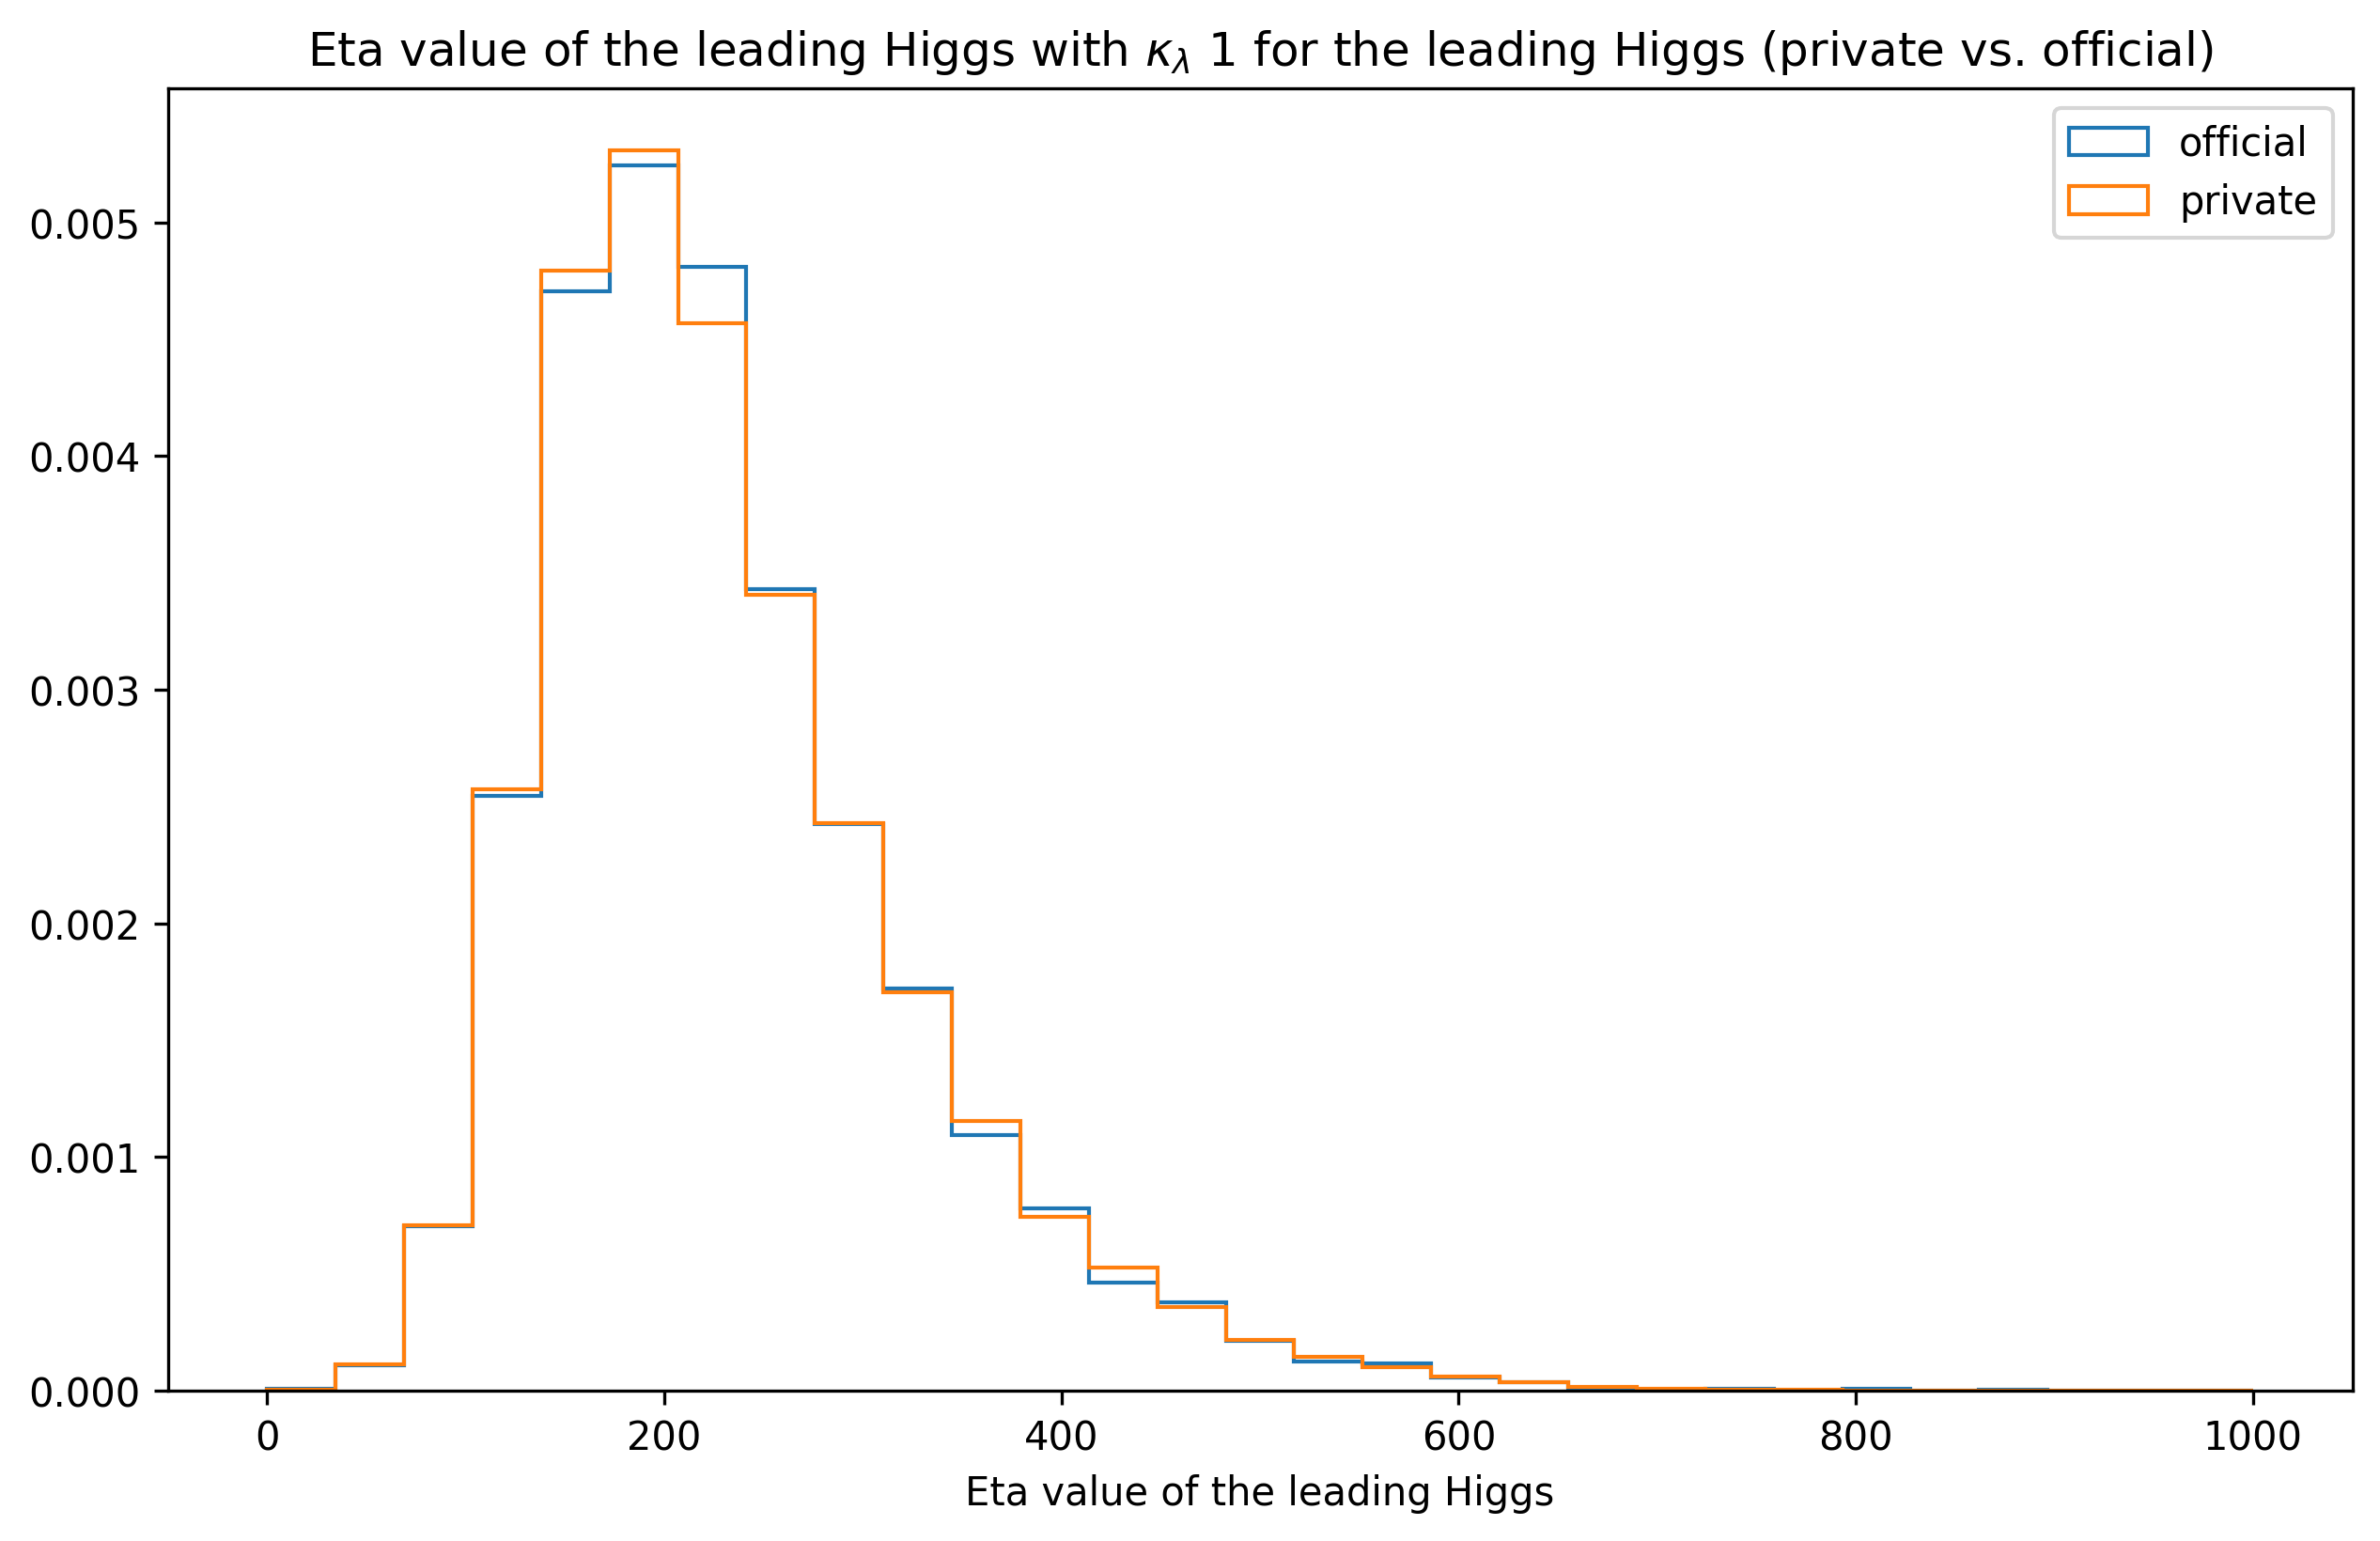

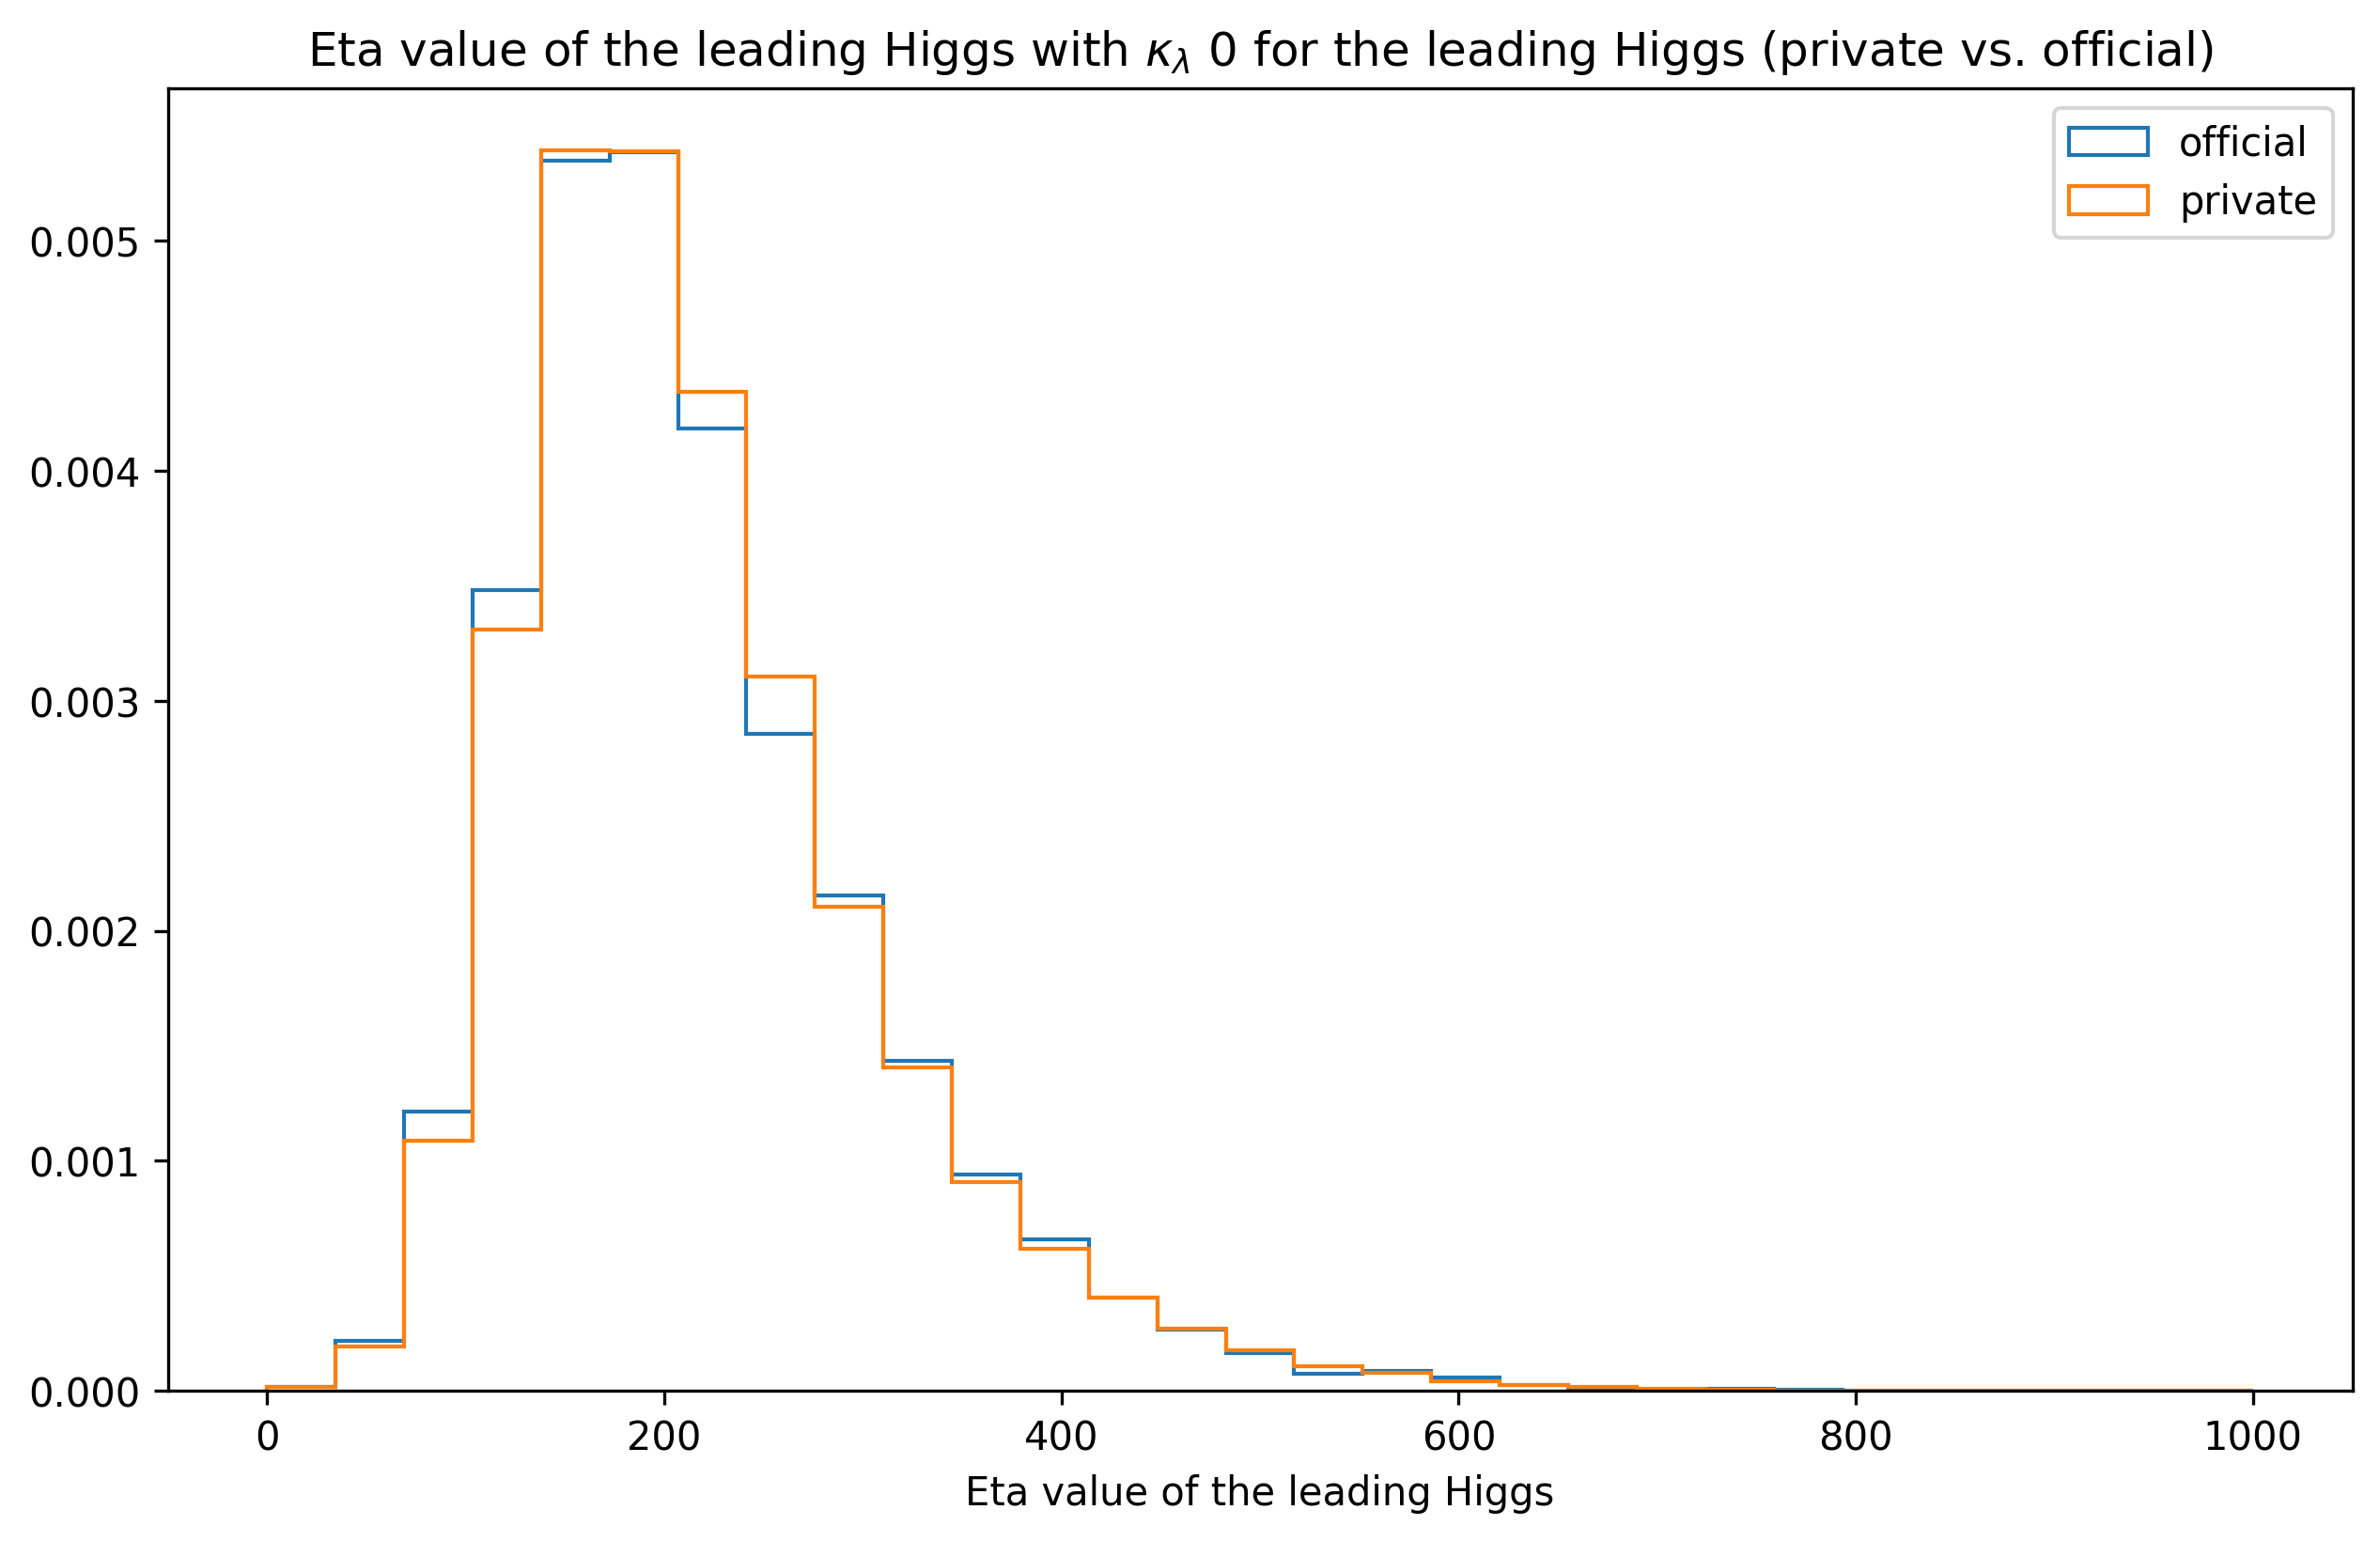

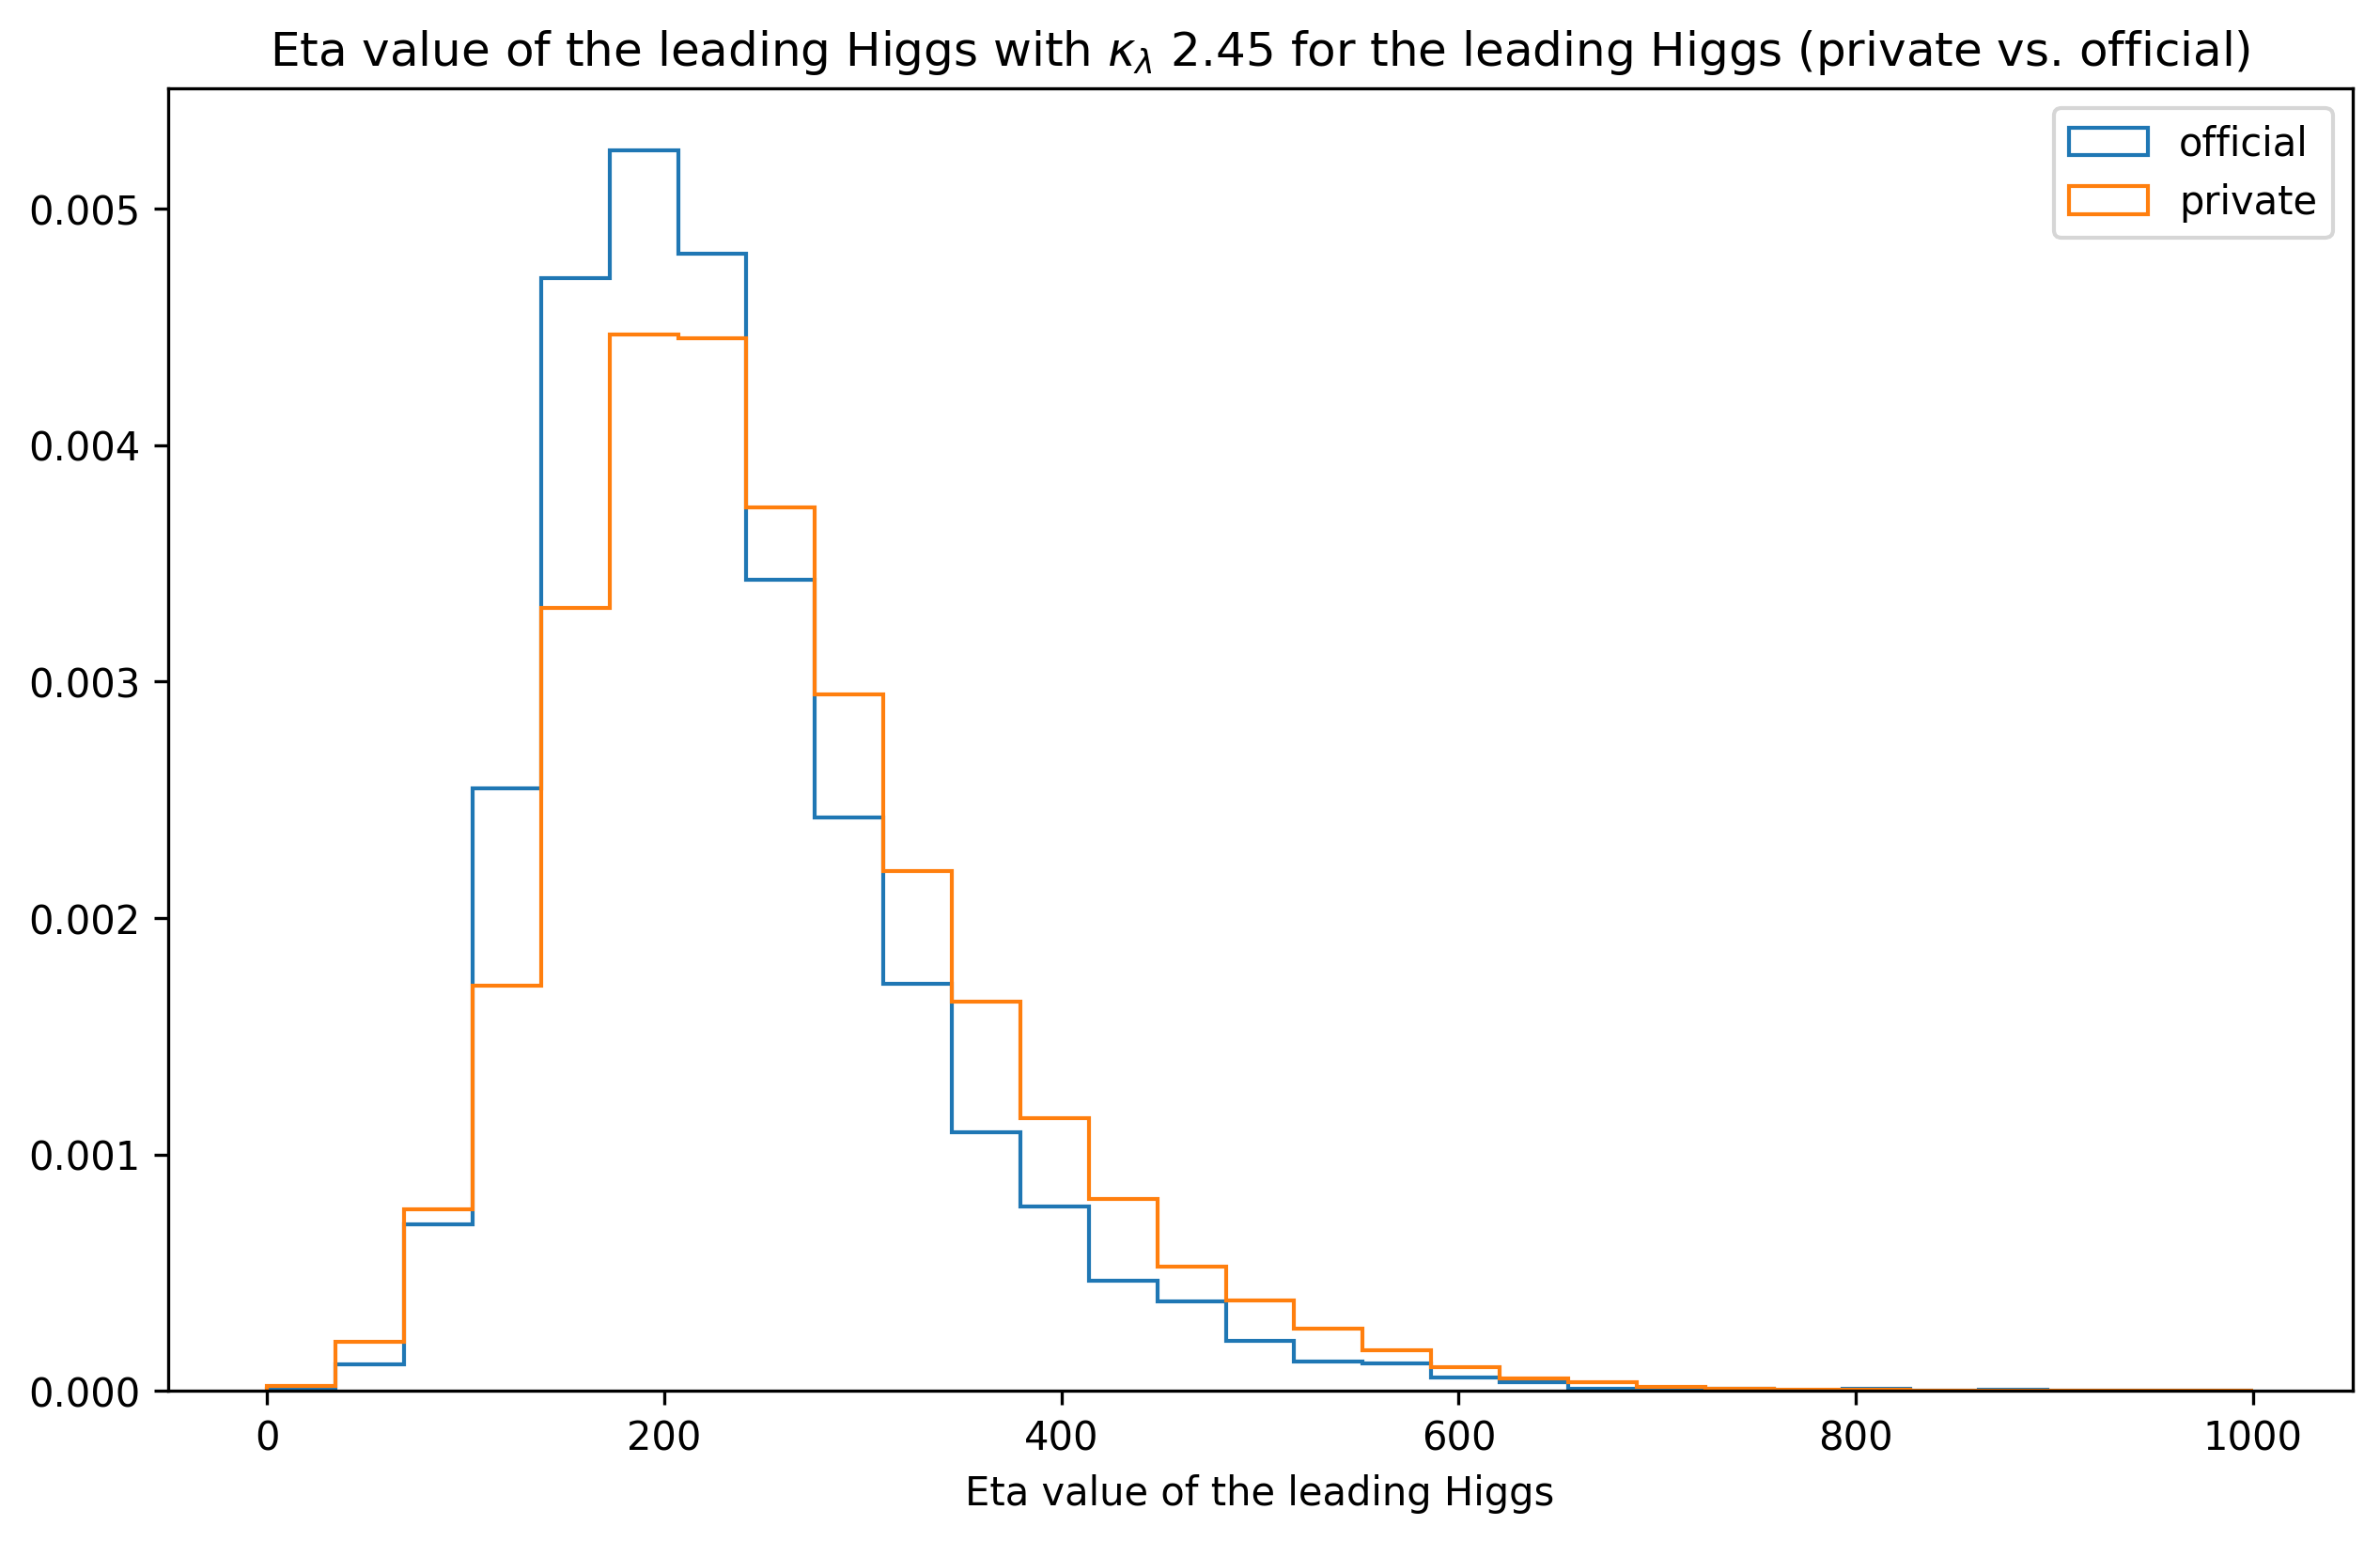

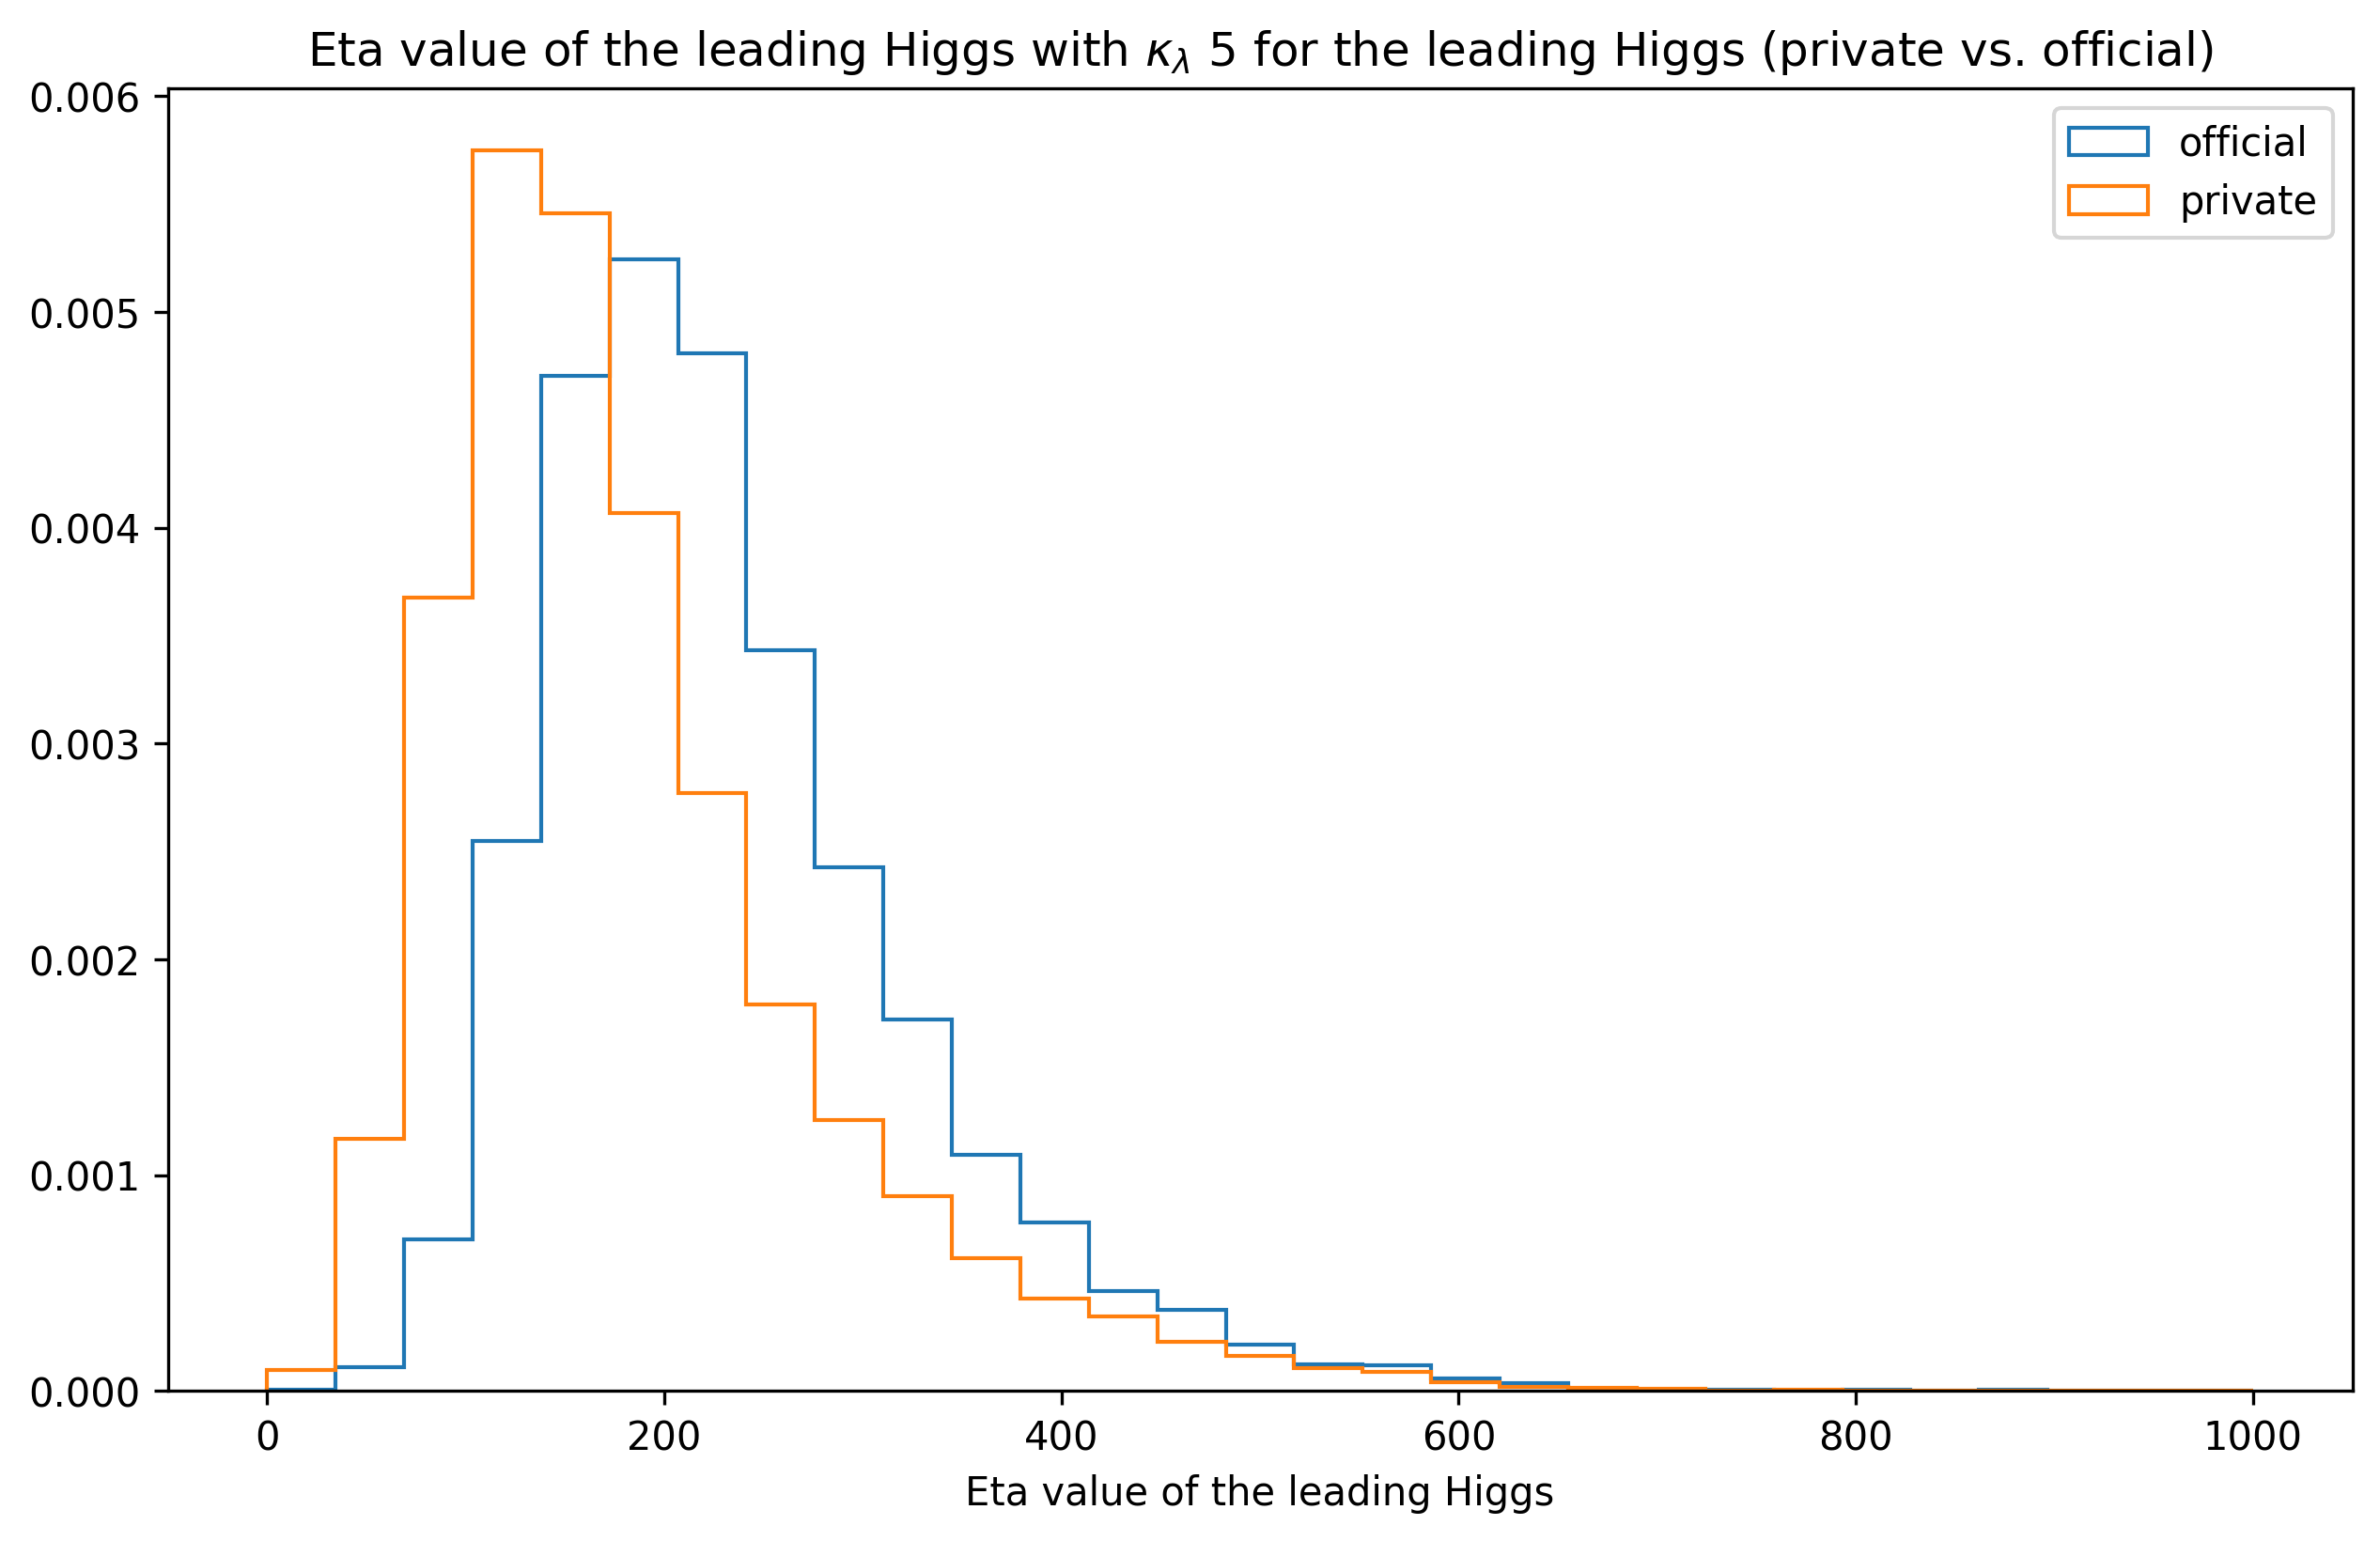

In [130]:
def plot_higgs_pt(official_data, private_data, kl_value, higgs_number):
    plt.figure(figsize=(10, 6))
    plt.hist(official_data.pt, bins=np.linspace(0, 1000, 30), histtype="step", label="official", density=True)
    plt.hist(private_data.pt, bins=np.linspace(0, 1000, 30), histtype="step", label="private", density=True)
    
    plt.xlabel("Eta value of the leading Higgs")
    plt.title(f"Eta value of the leading Higgs with $\\kappa_\\lambda$ {kl_value} for the {higgs_number} Higgs (private vs. official)")
    plt.legend()
    plt.show()
    
plot_higgs_pt(reco_higgs_1_kl_1_official, reco_higgs_1_kl_1_private, 1, "leading")
plot_higgs_pt(reco_higgs_1_kl_0_official, reco_higgs_1_kl_0_private, 0, "leading")
plot_higgs_pt(reco_higgs_1_kl_2p45_official, reco_higgs_1_kl_2p45_private, 2.45, "leading")
plot_higgs_pt(reco_higgs_1_kl_5_official, reco_higgs_1_kl_5_private, 5, "leading")

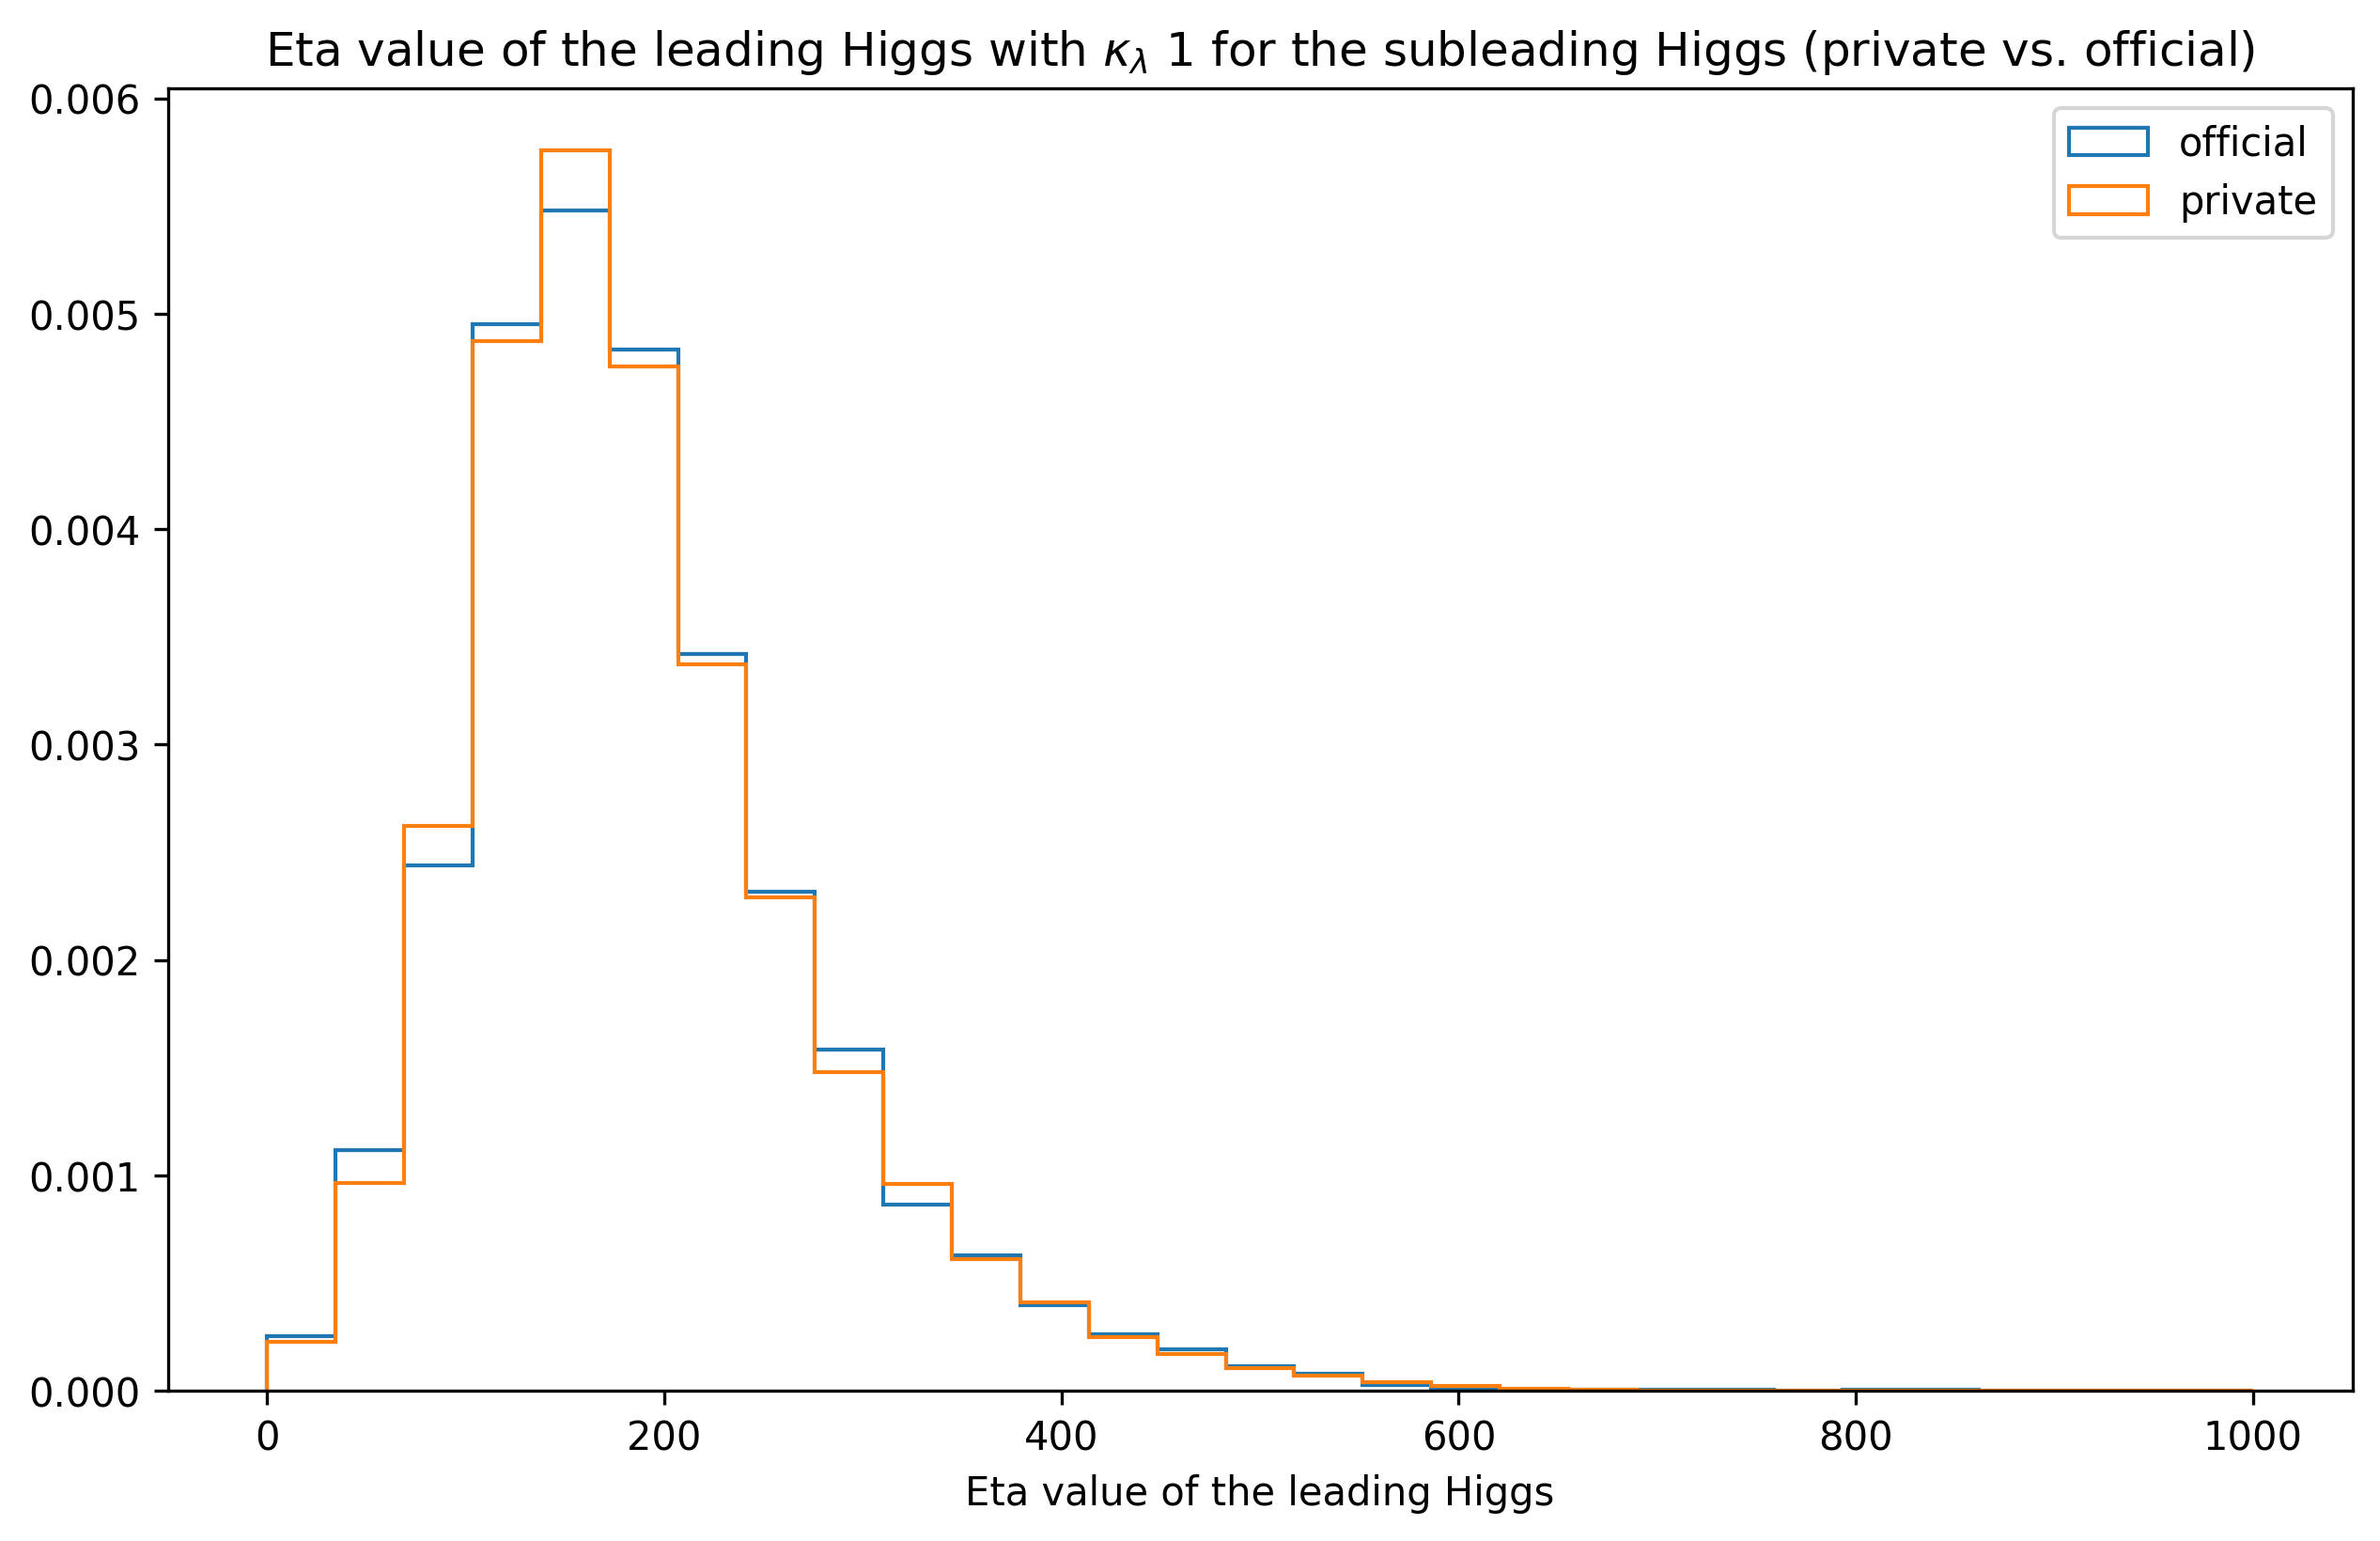

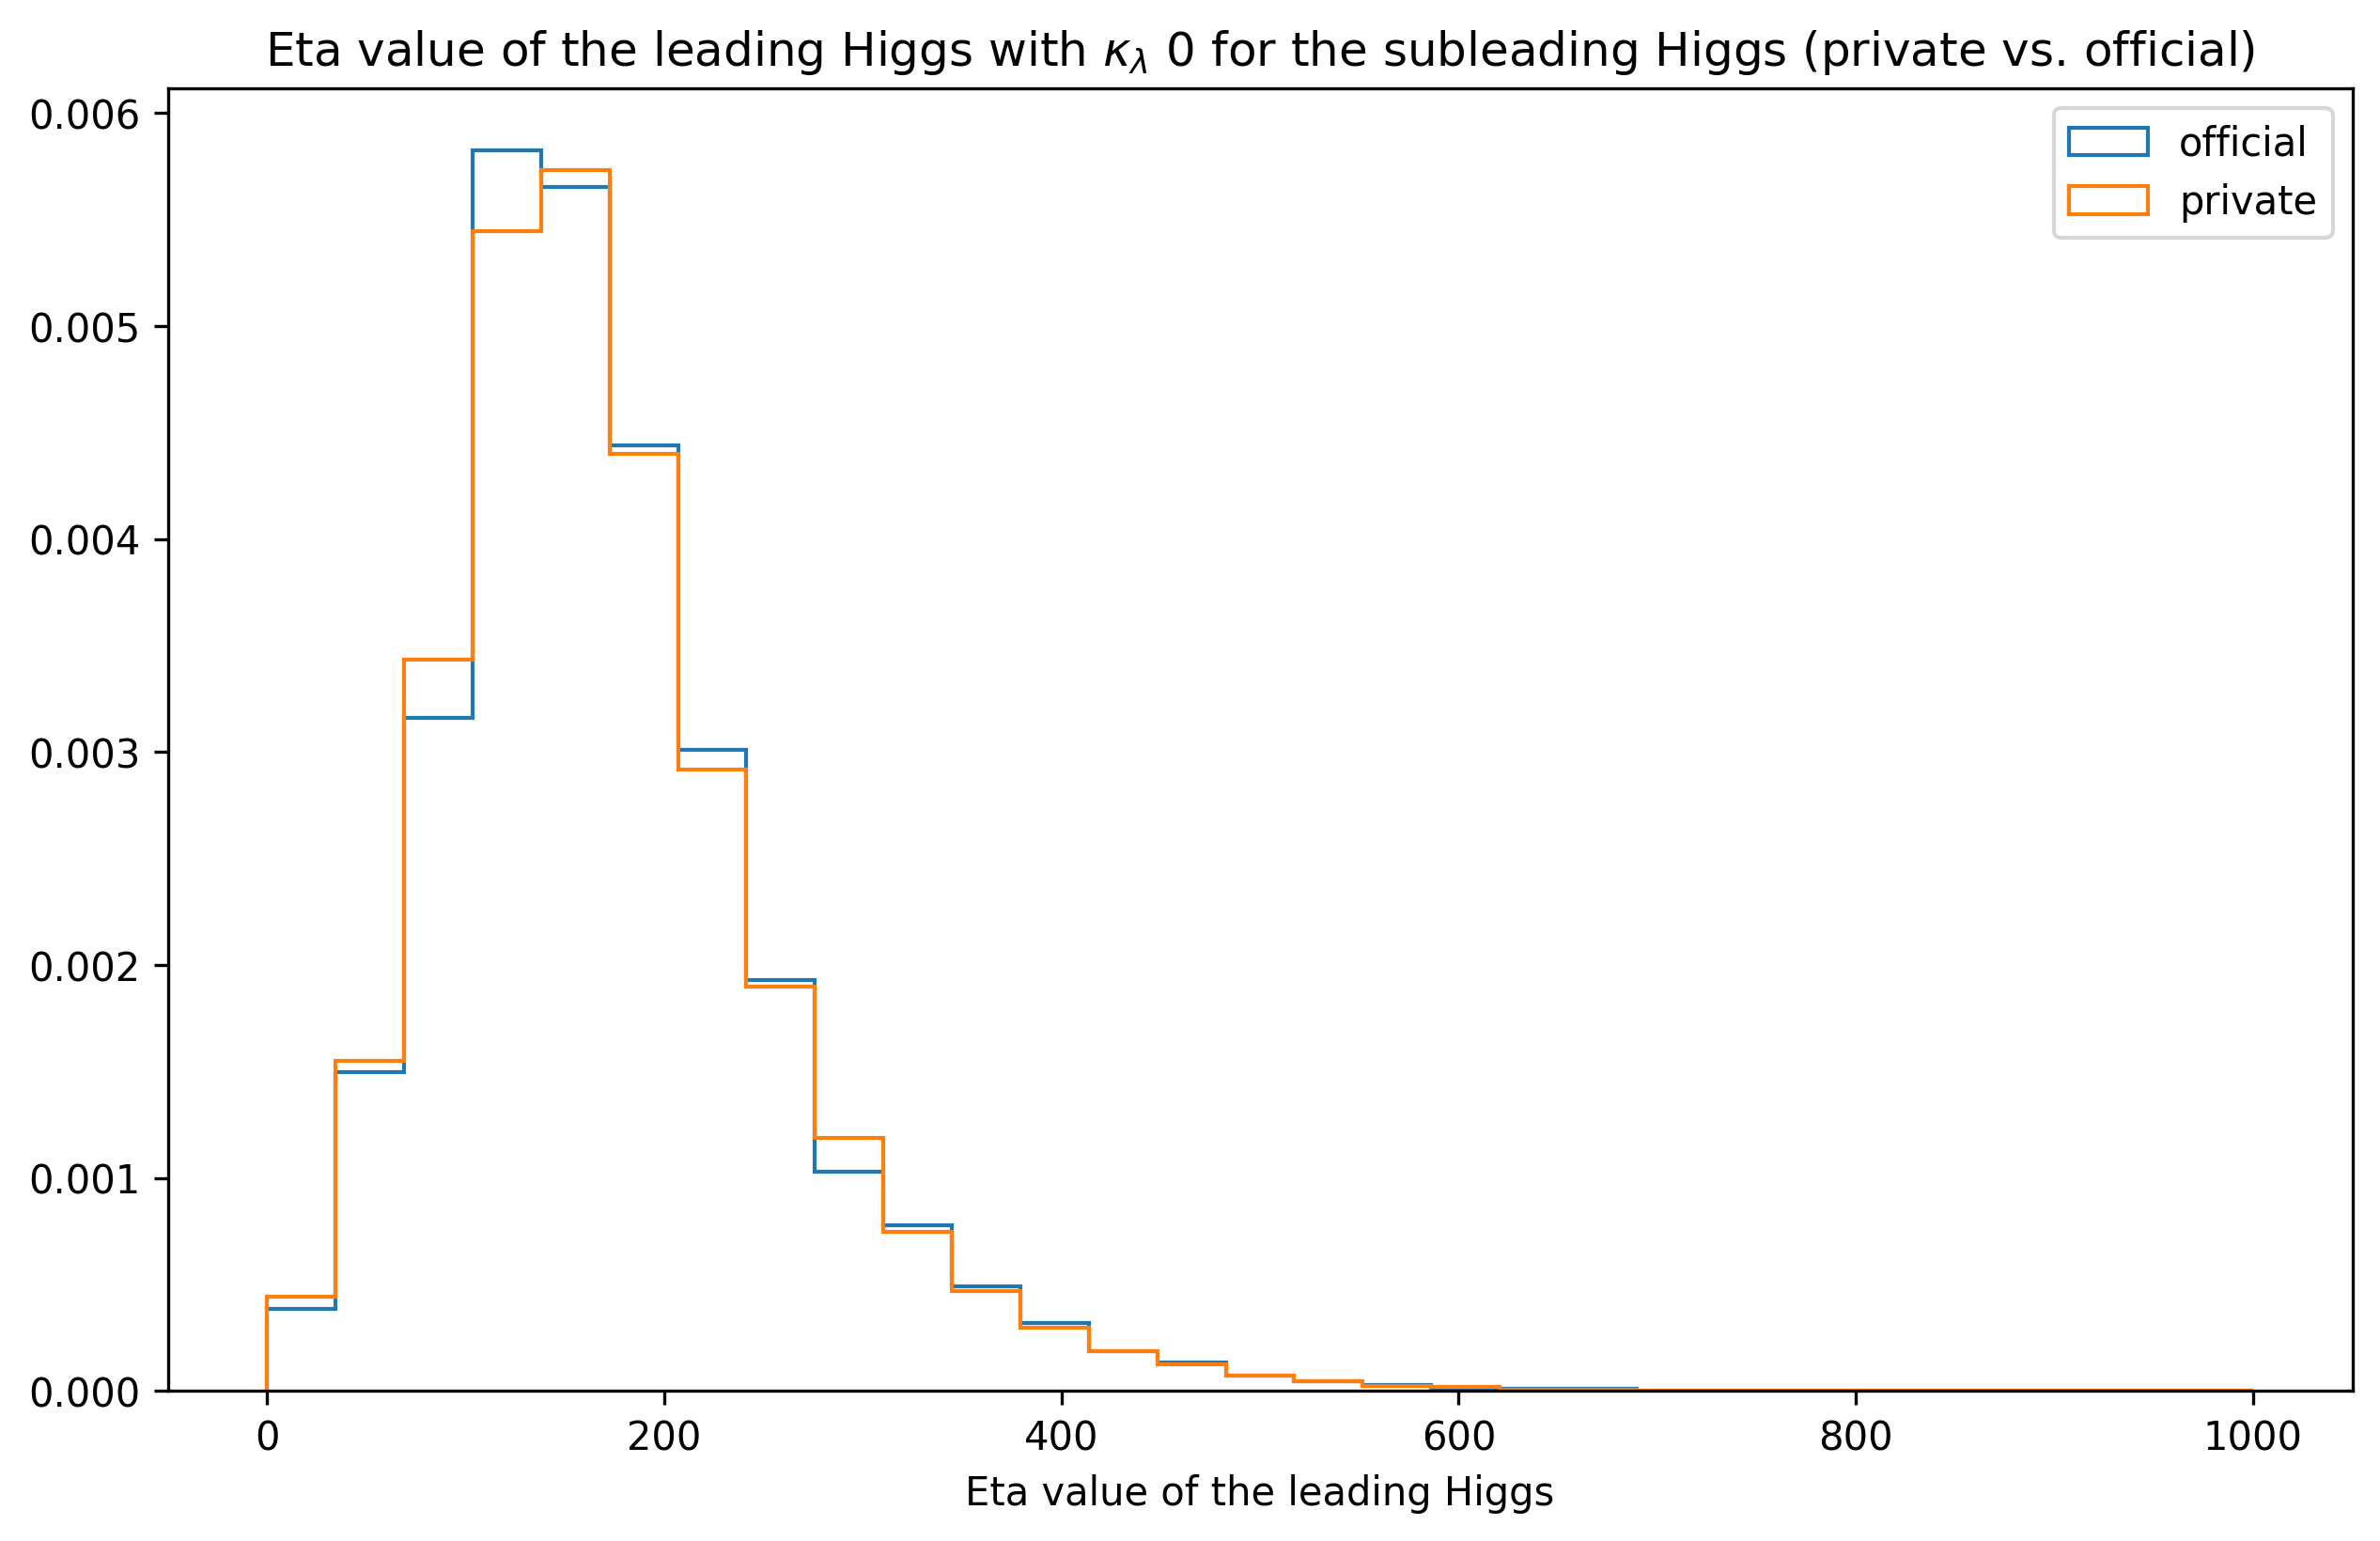

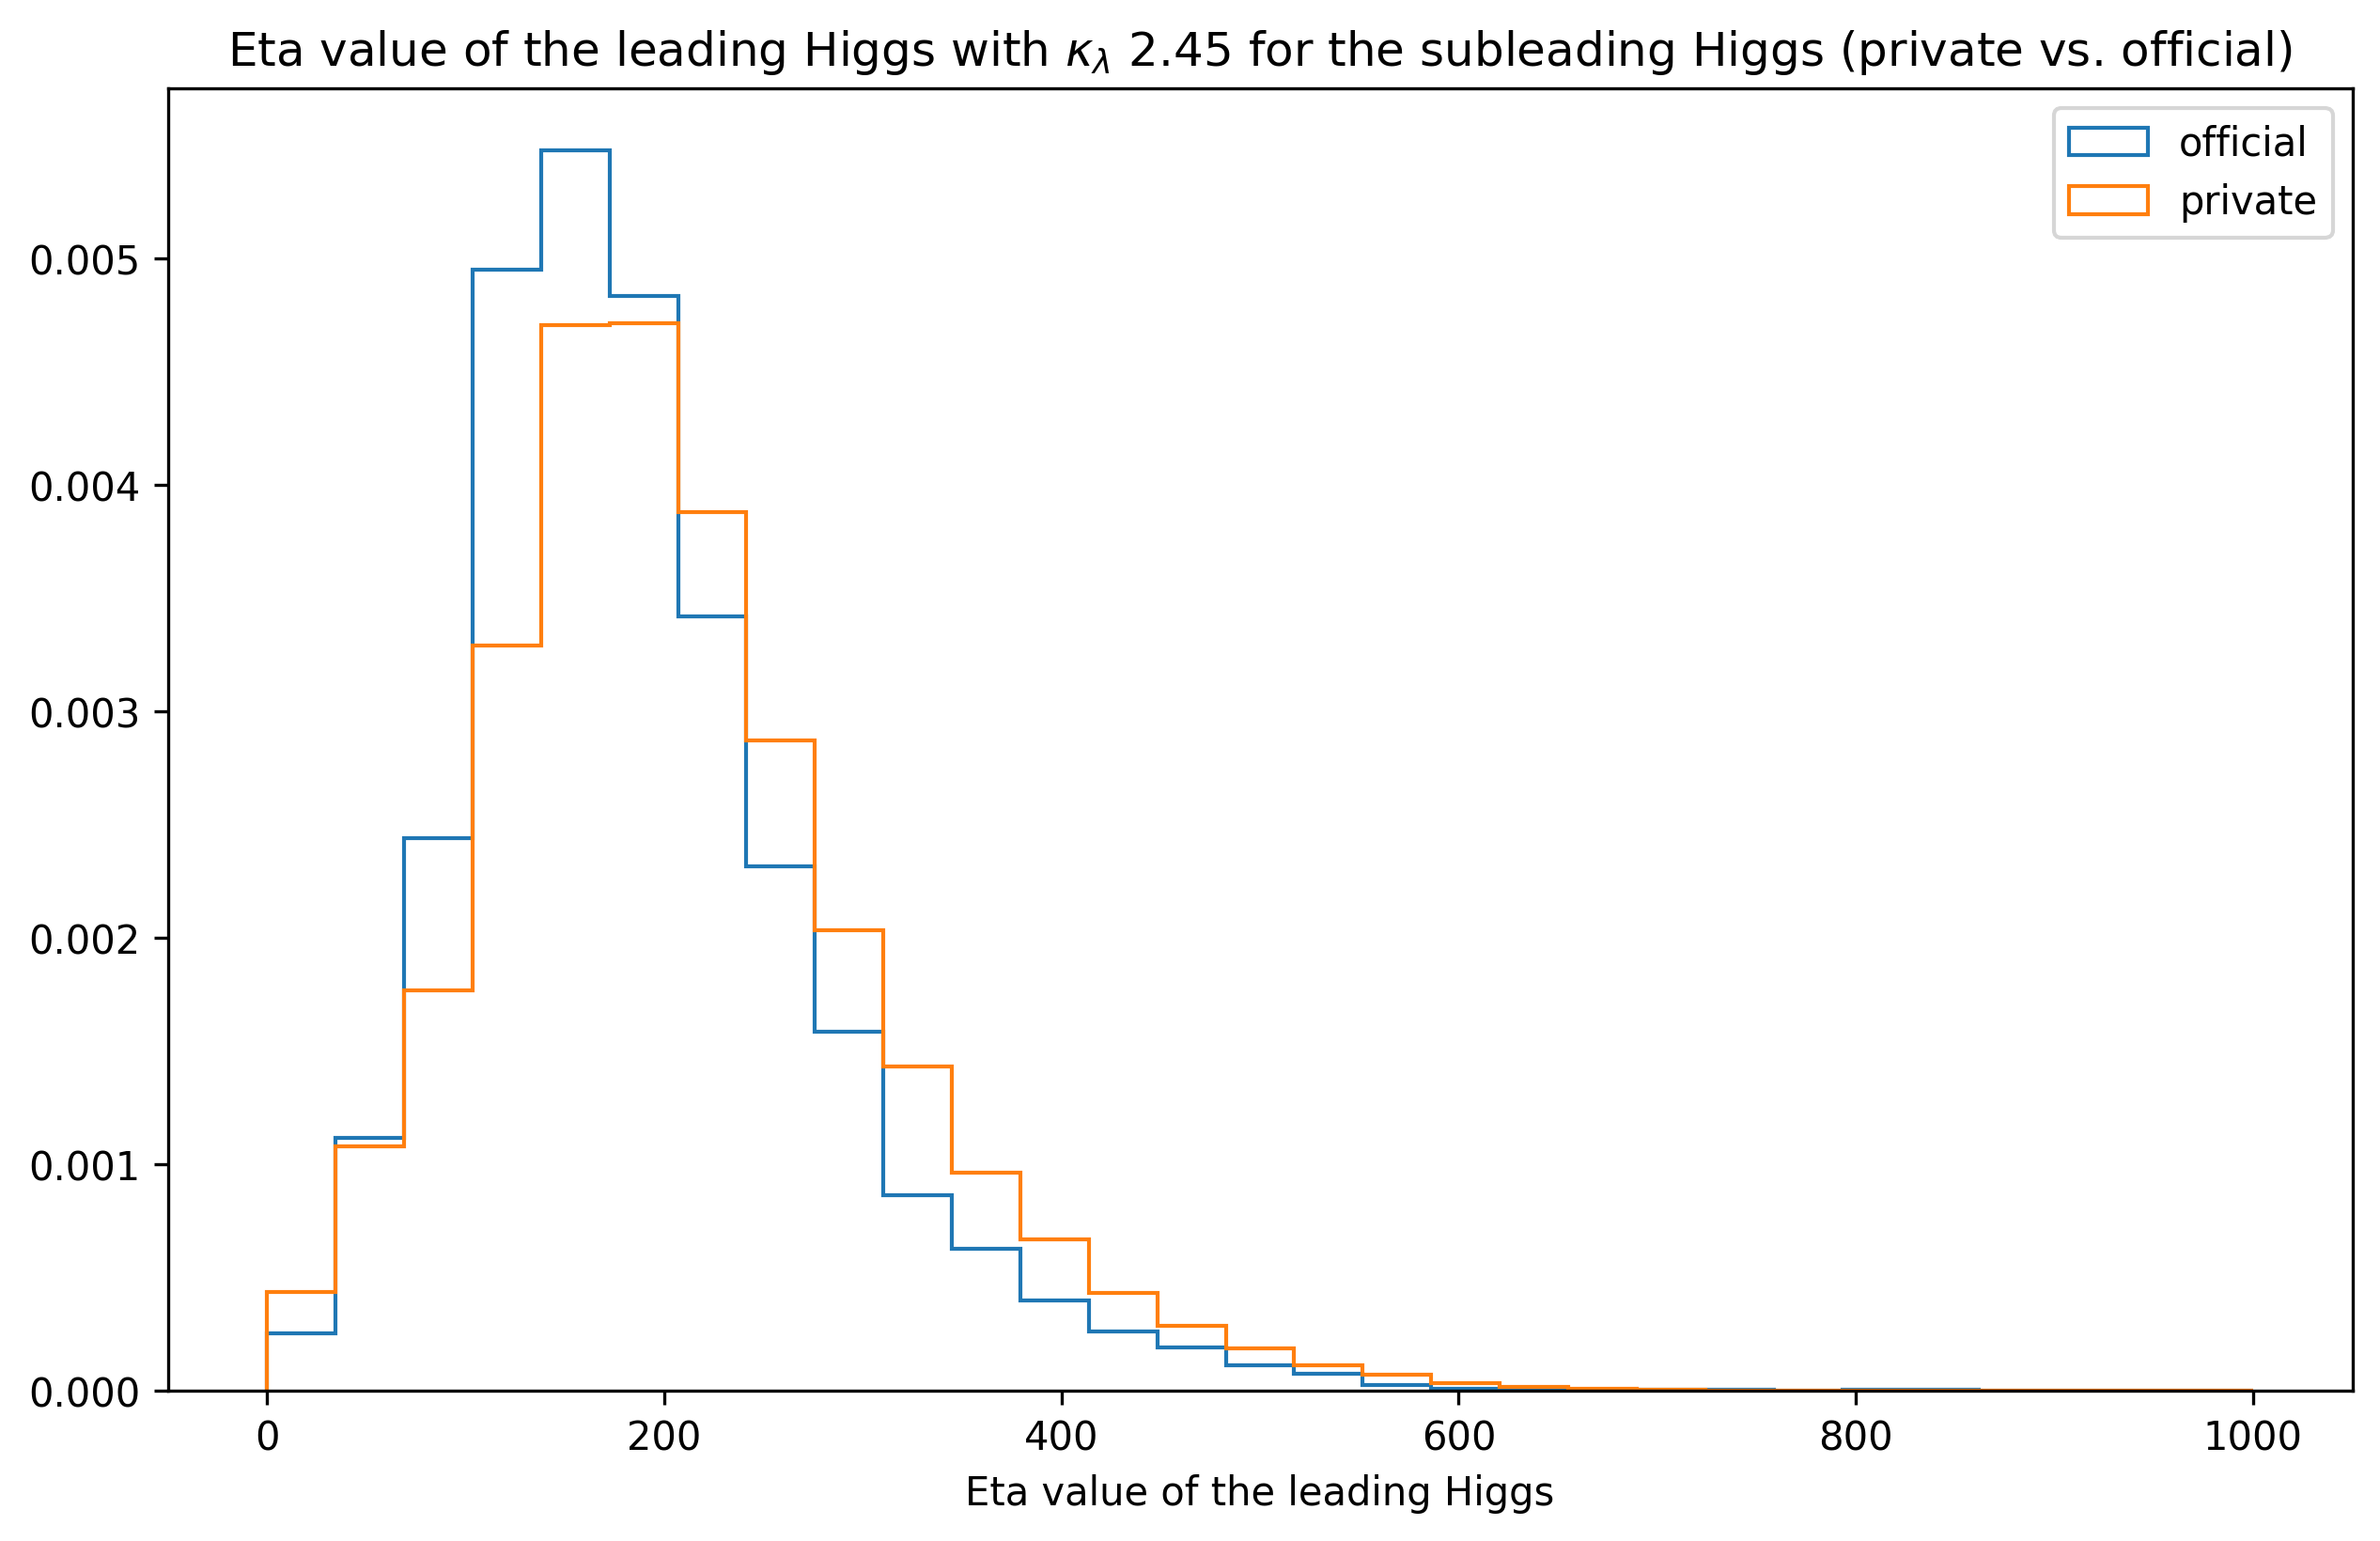

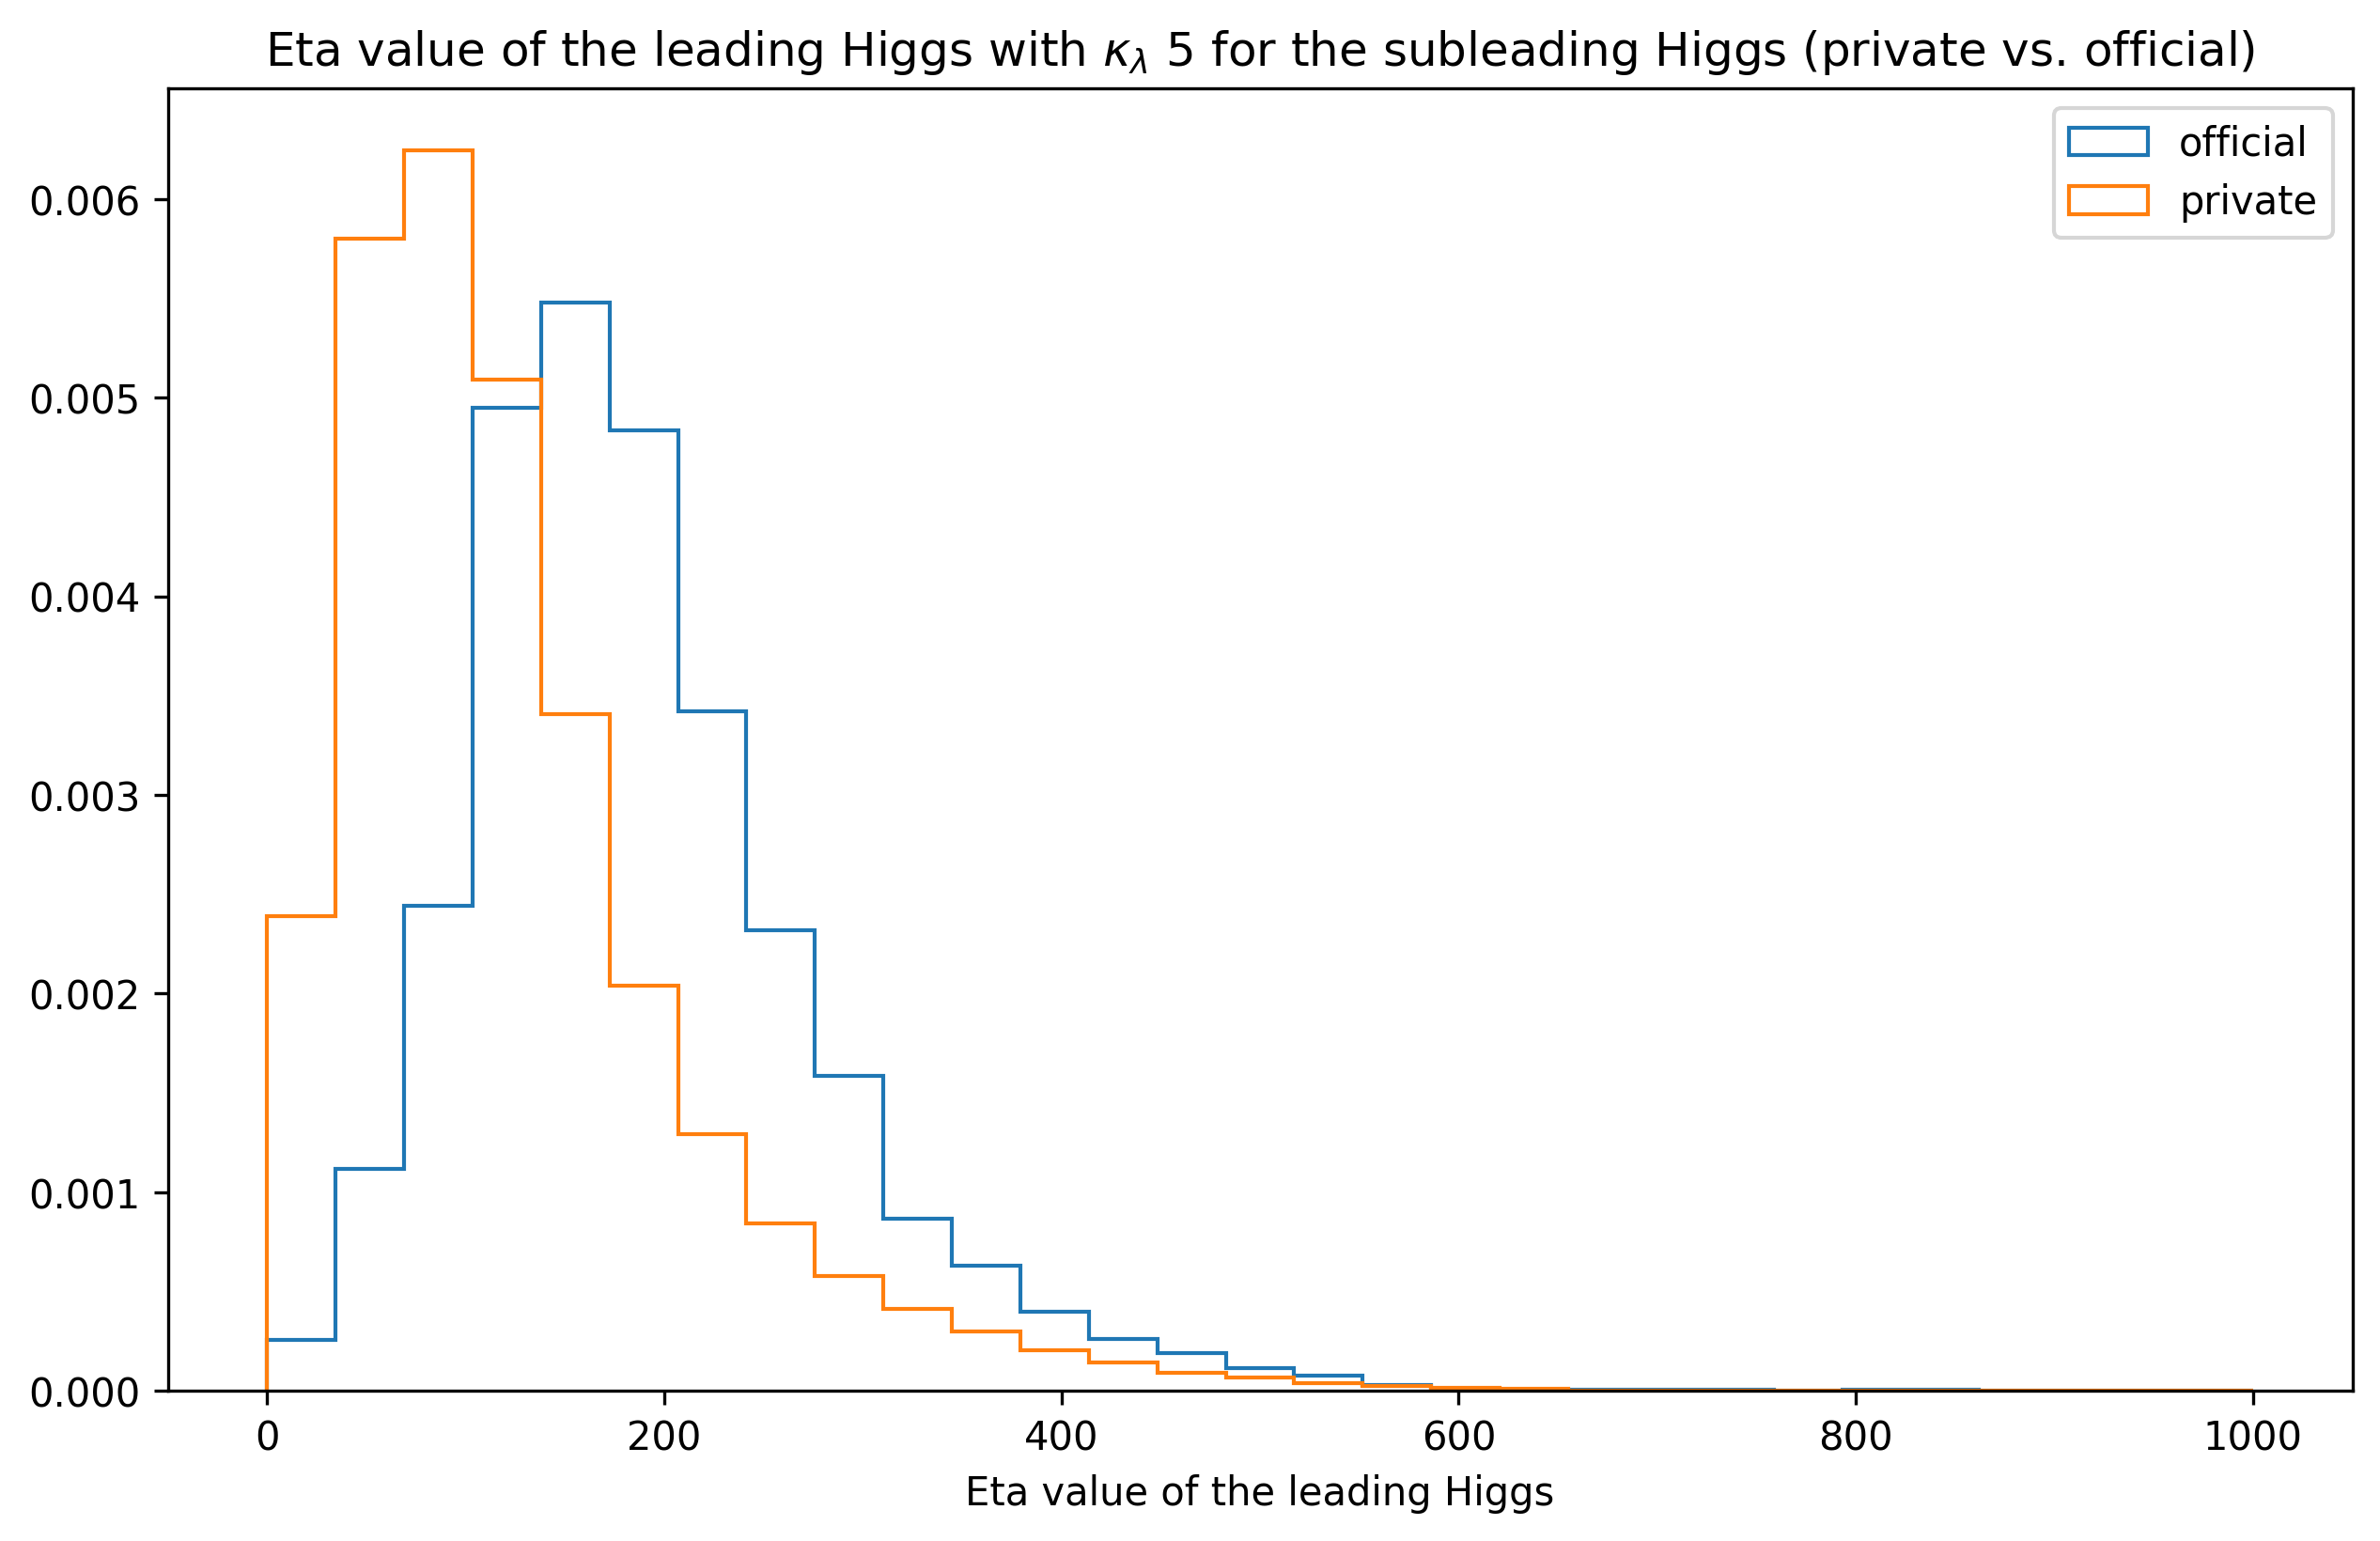

In [131]:
plot_higgs_pt(reco_higgs_2_kl_1_official, reco_higgs_2_kl_1_private, 1, "subleading")
plot_higgs_pt(reco_higgs_2_kl_0_official, reco_higgs_2_kl_0_private, 0, "subleading")
plot_higgs_pt(reco_higgs_2_kl_2p45_official, reco_higgs_2_kl_2p45_private, 2.45, "subleading")
plot_higgs_pt(reco_higgs_2_kl_5_official, reco_higgs_2_kl_5_private, 5, "subleading")

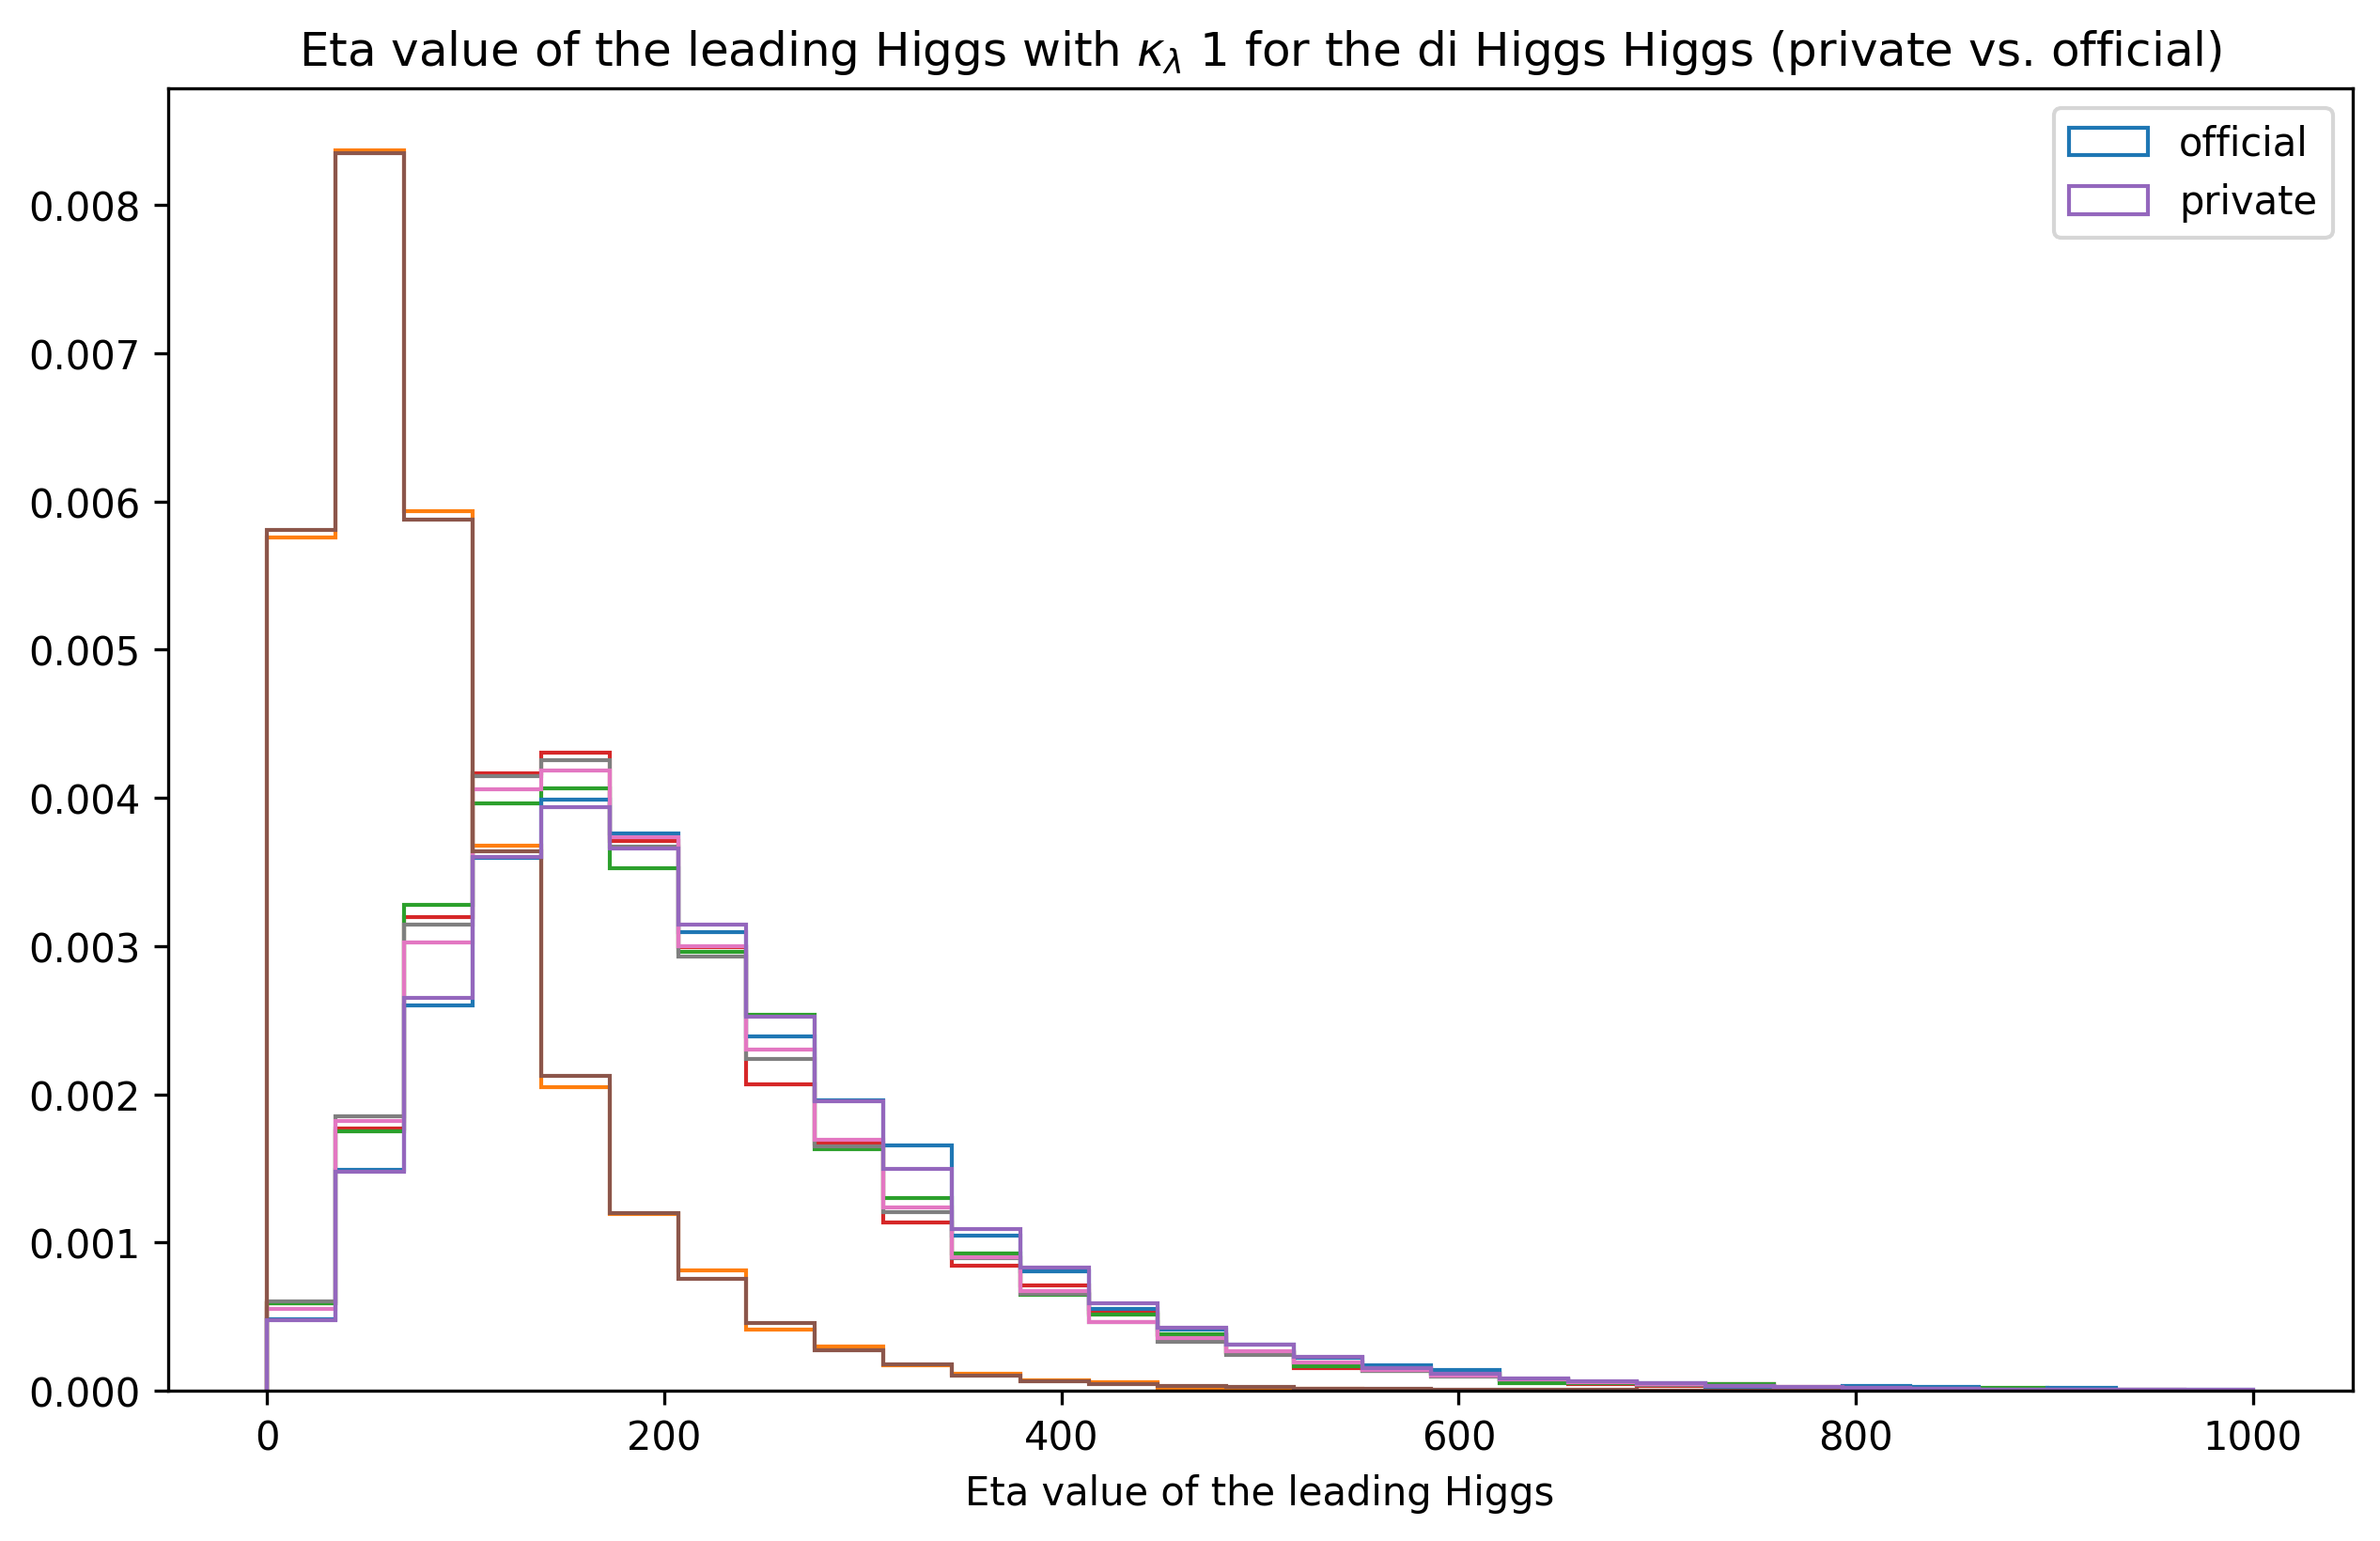

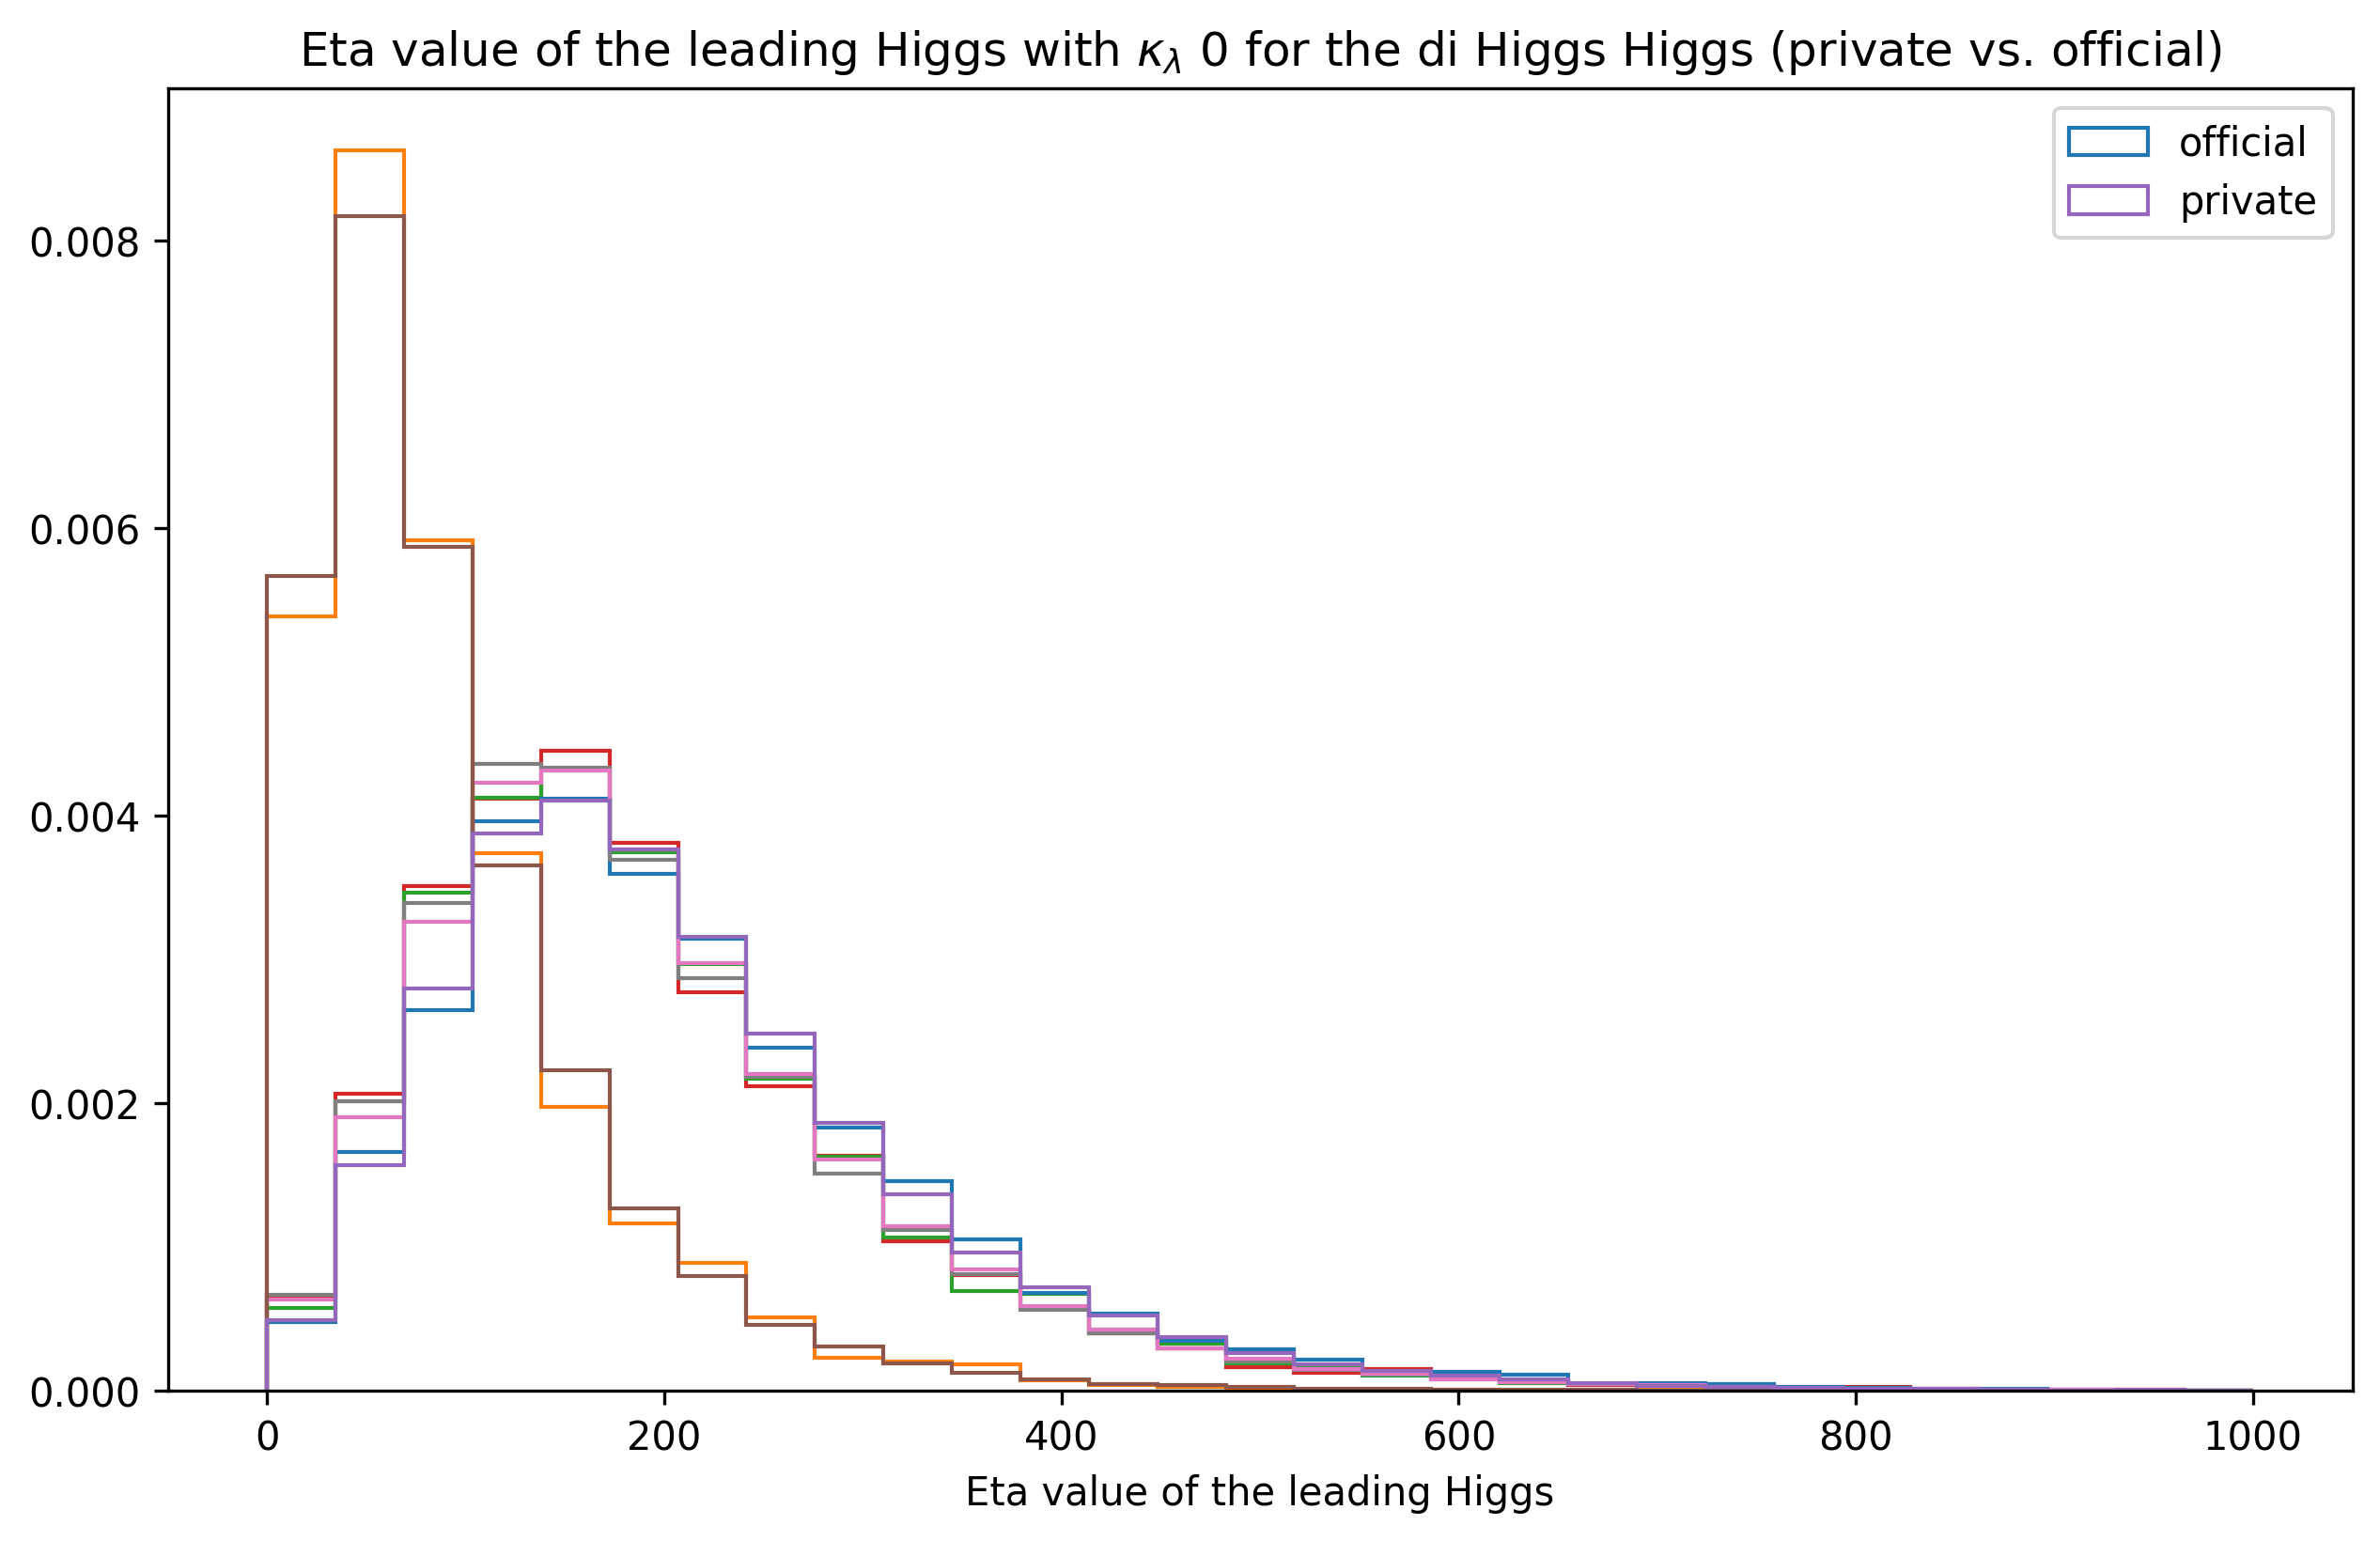

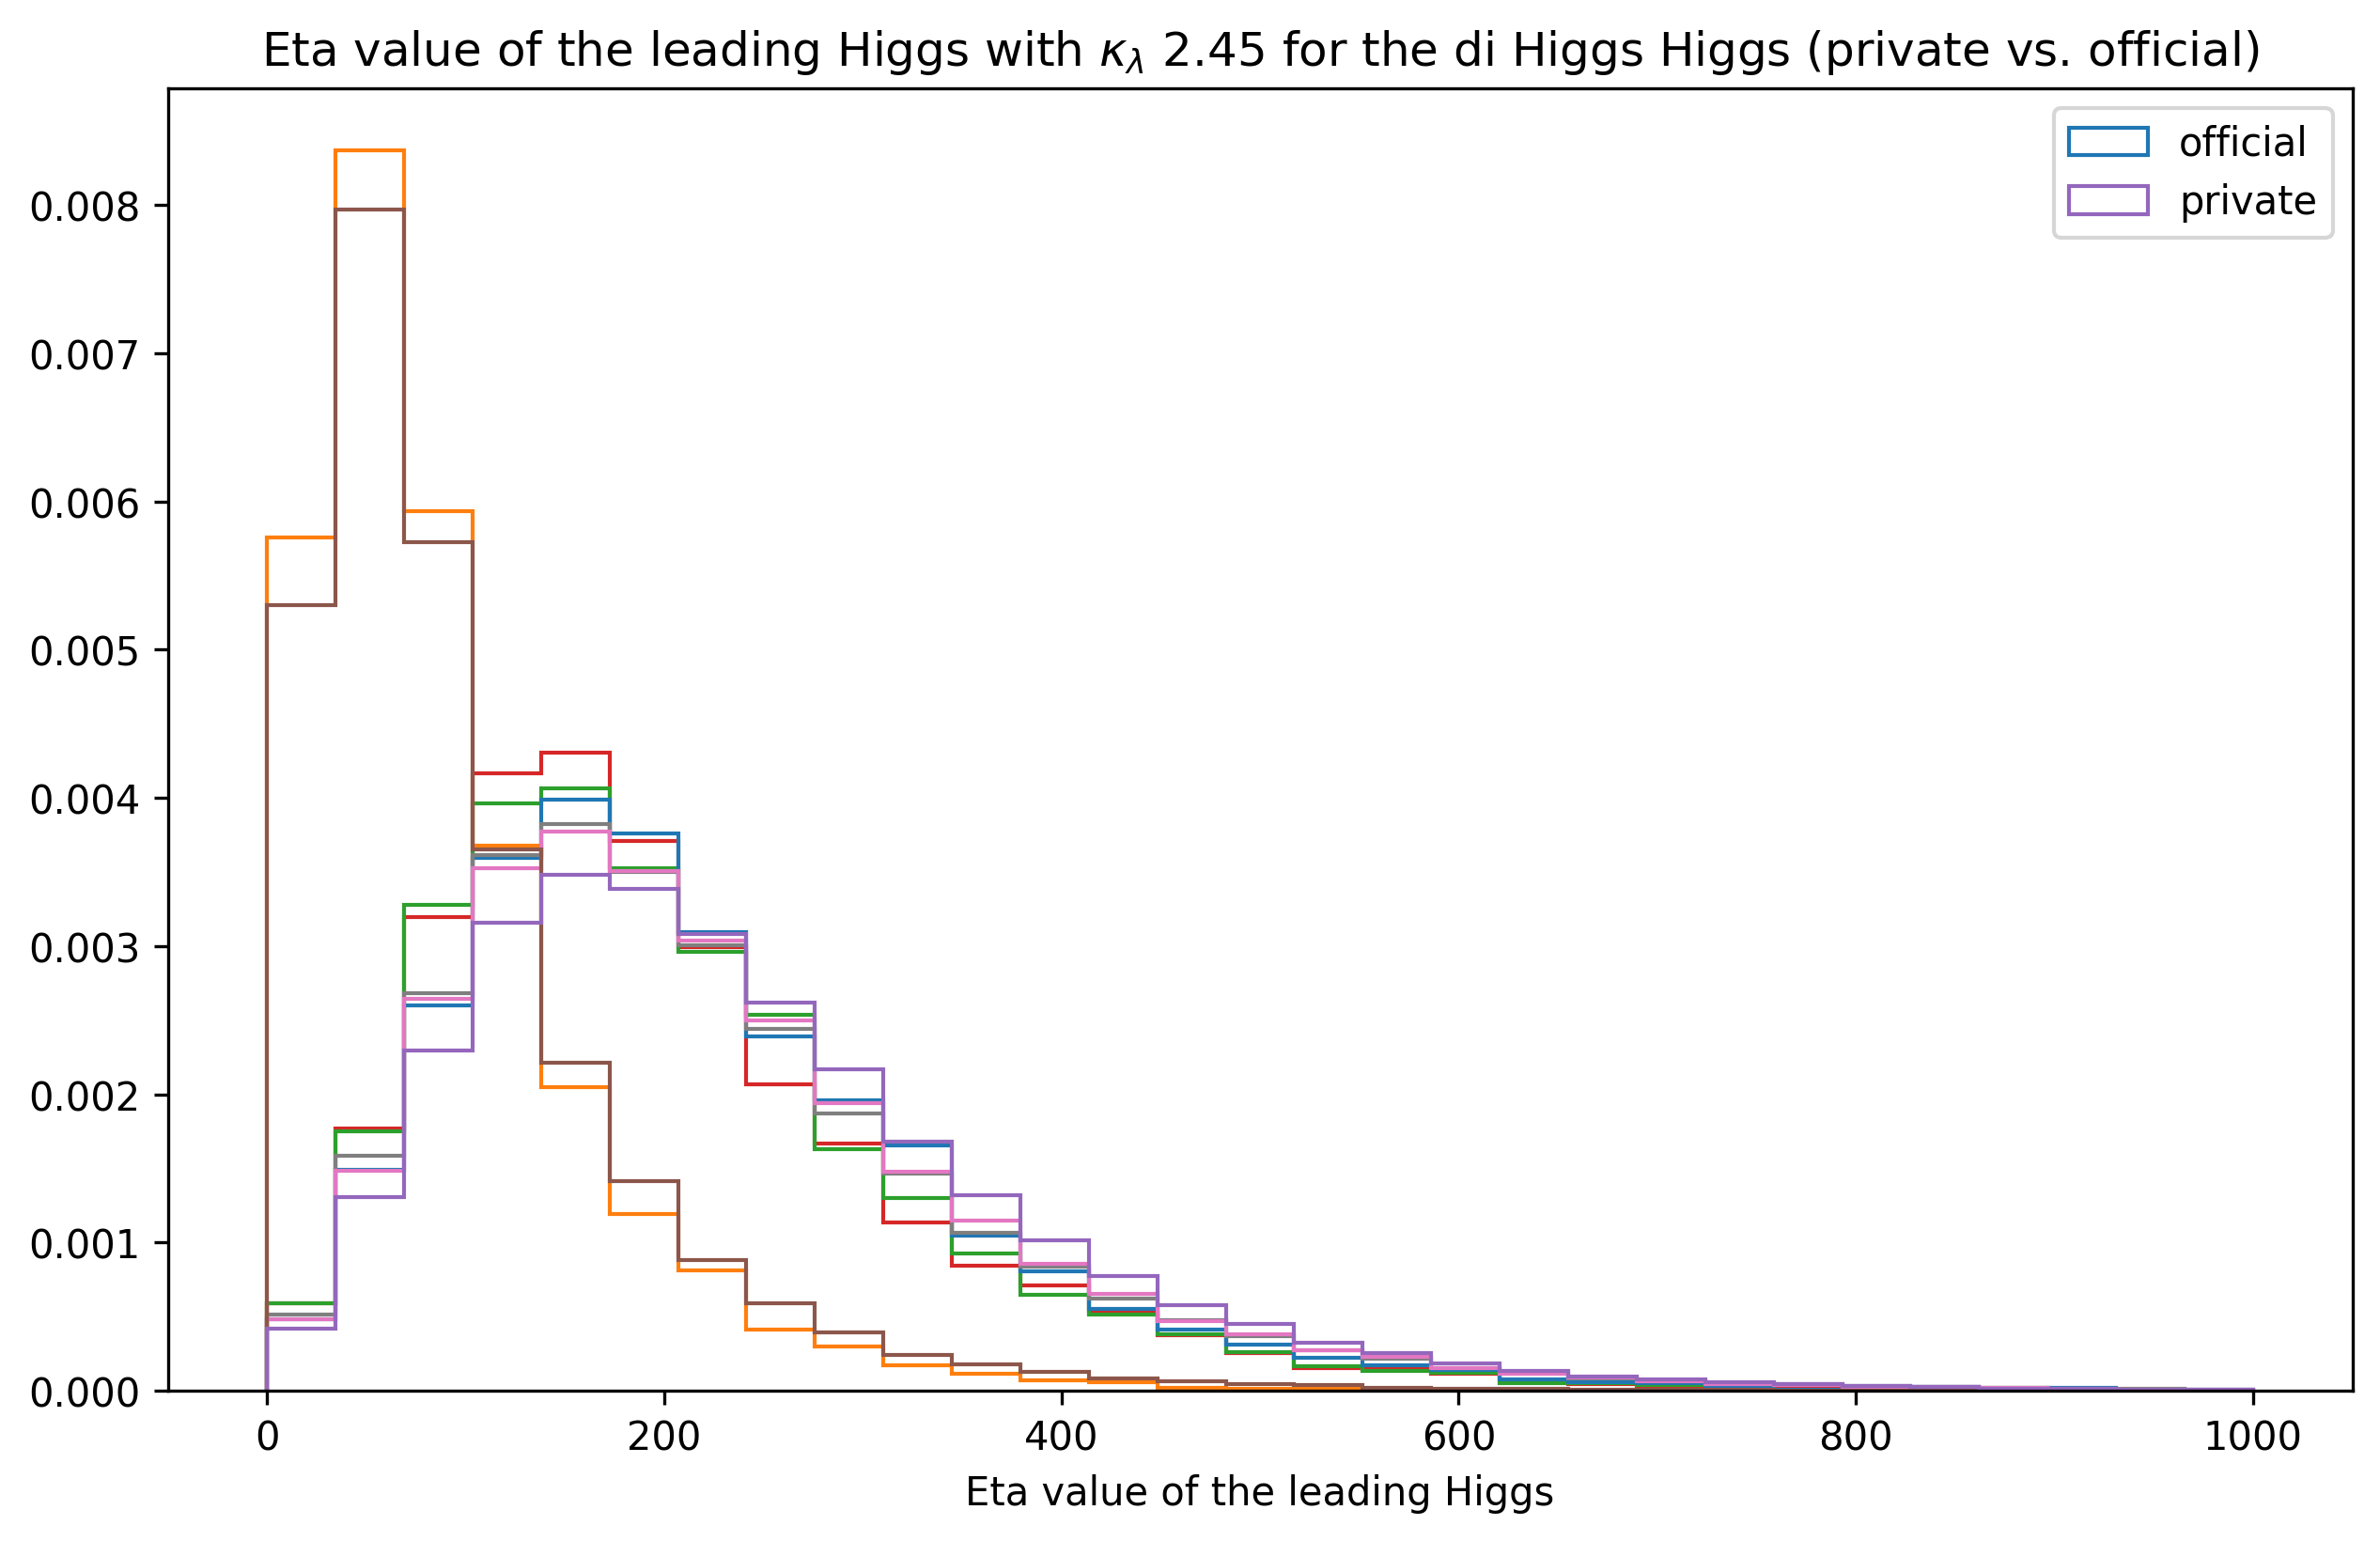

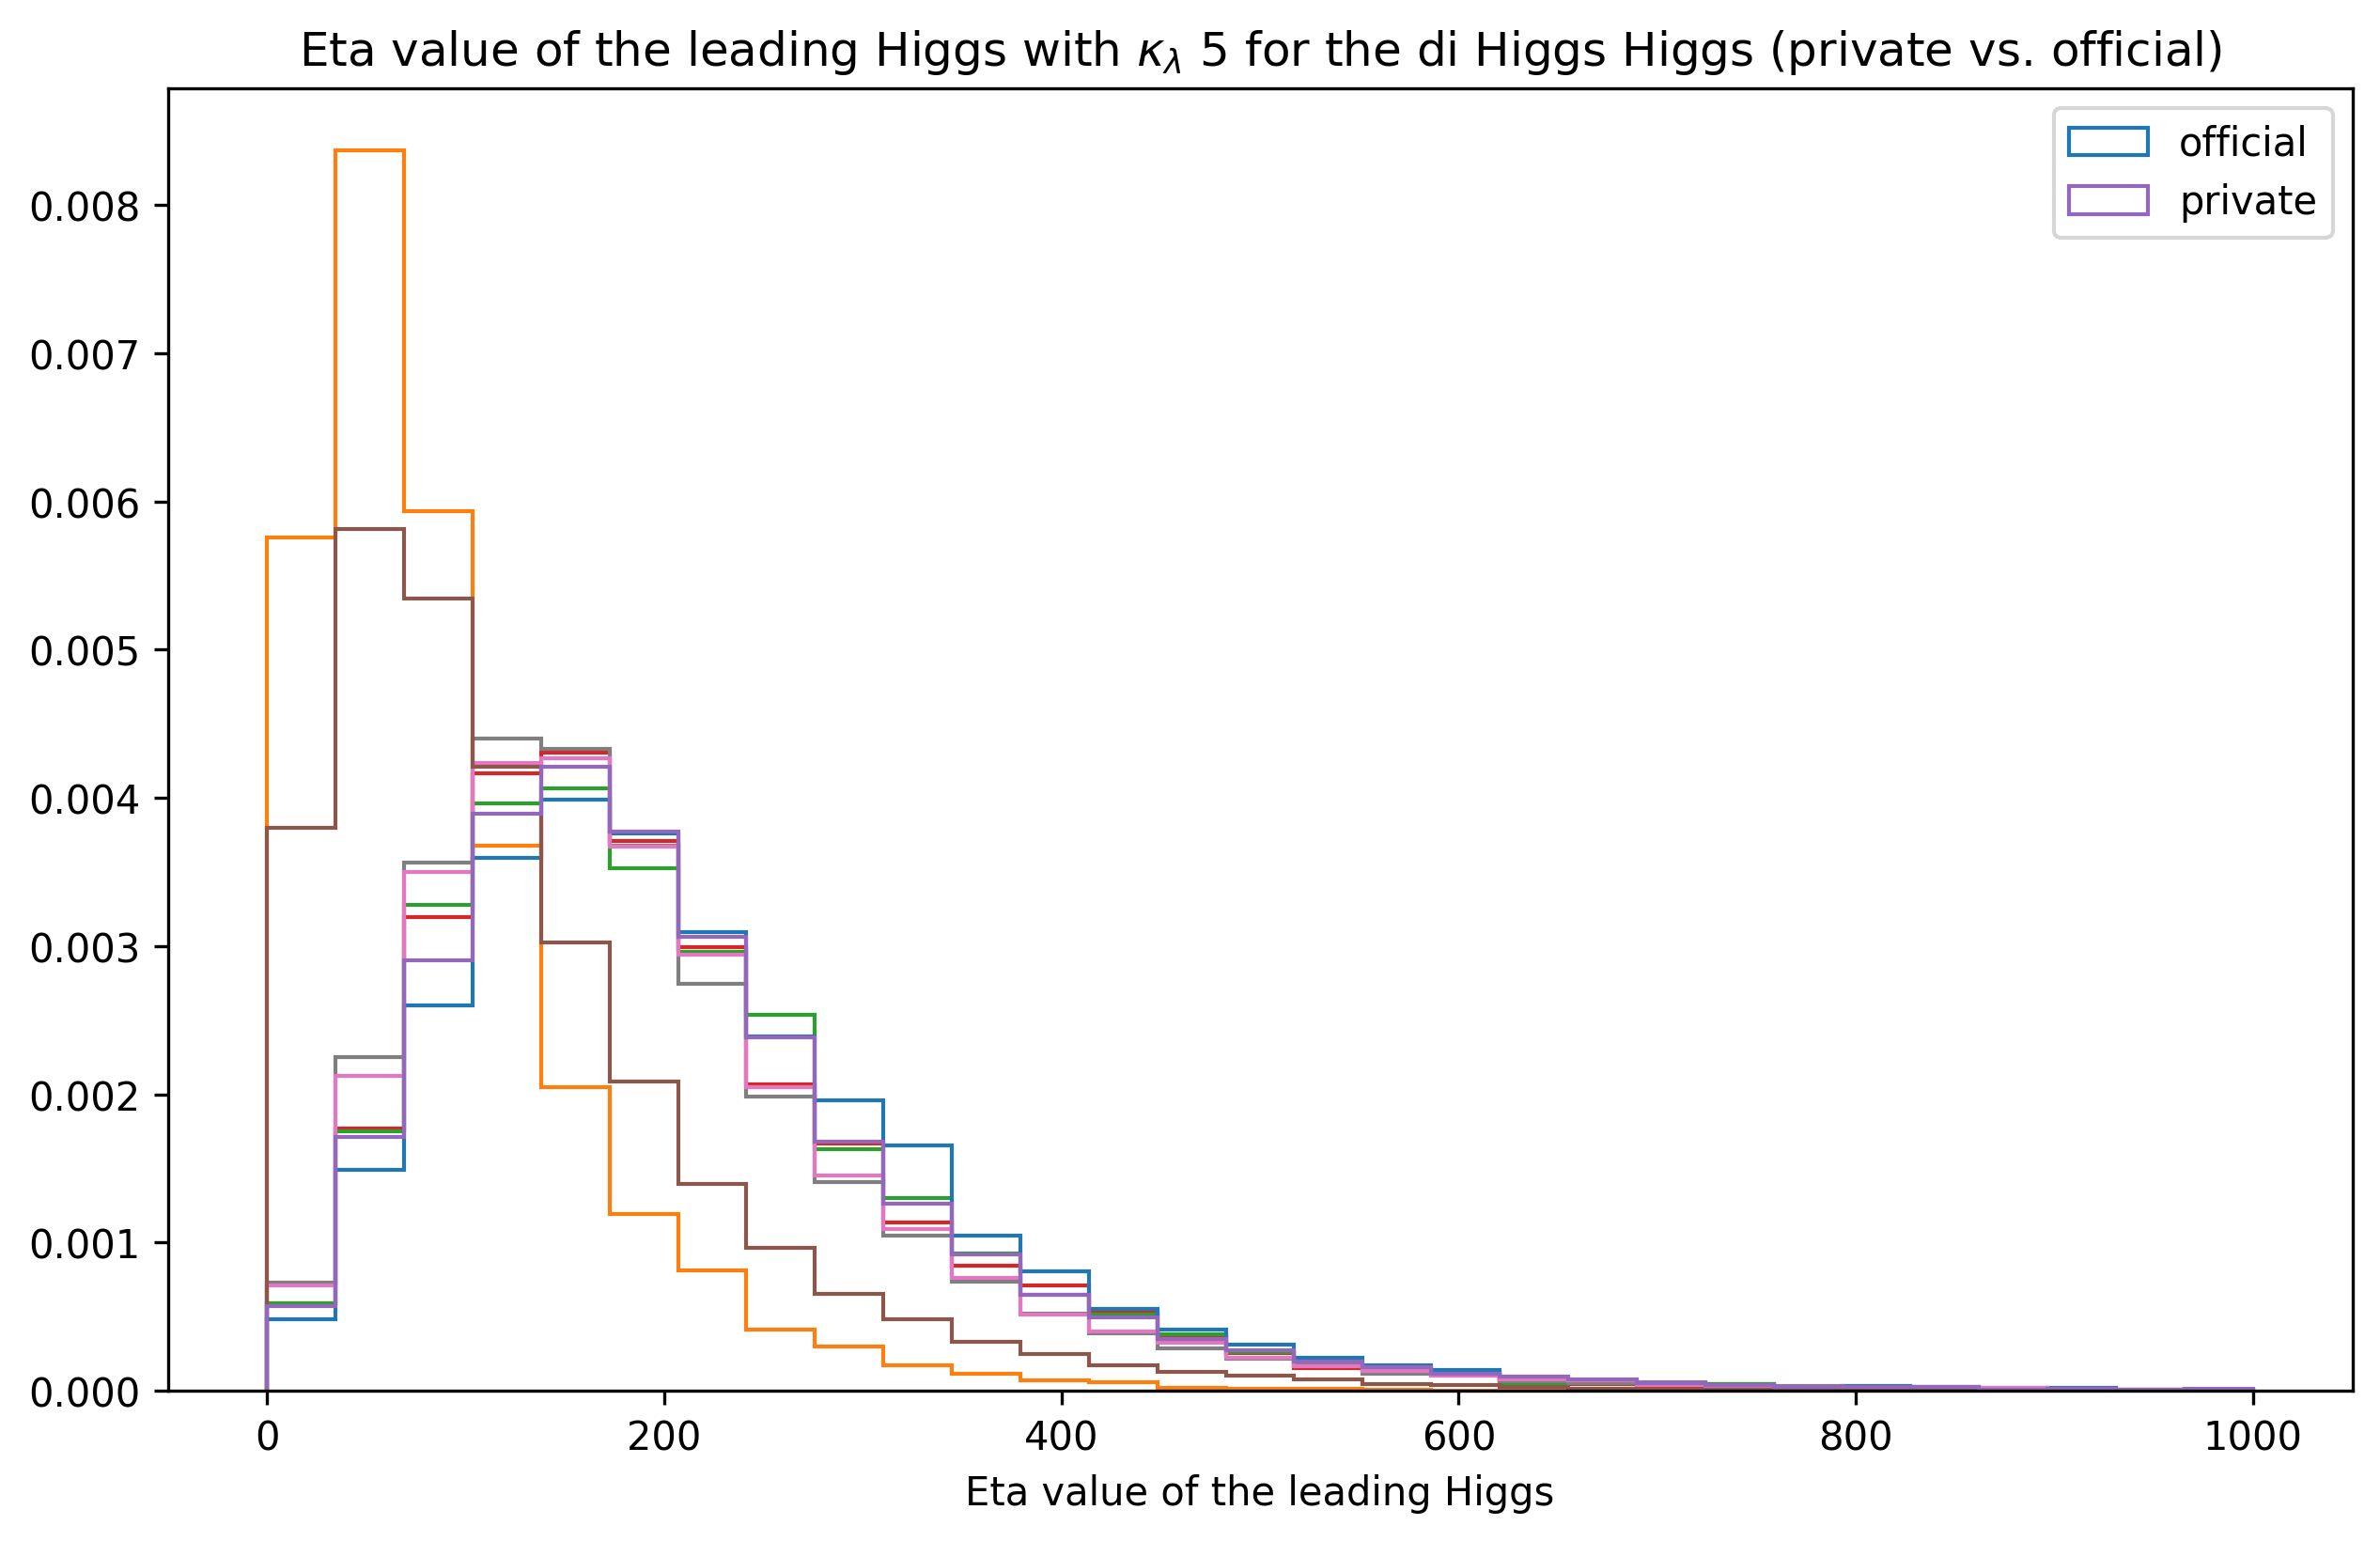

In [133]:
plot_higgs_pt(reco_hh_kl_1_official, reco_hh_kl_1_private, 1, "di Higgs")
plot_higgs_pt(reco_hh_kl_0_official, reco_hh_kl_0_private, 0, "di Higgs")
plot_higgs_pt(reco_hh_kl_2p45_official, reco_hh_kl_2p45_private, 2.45, "di Higgs")
plot_higgs_pt(reco_hh_kl_5_official, reco_hh_kl_5_private, 5, "di Higgs")

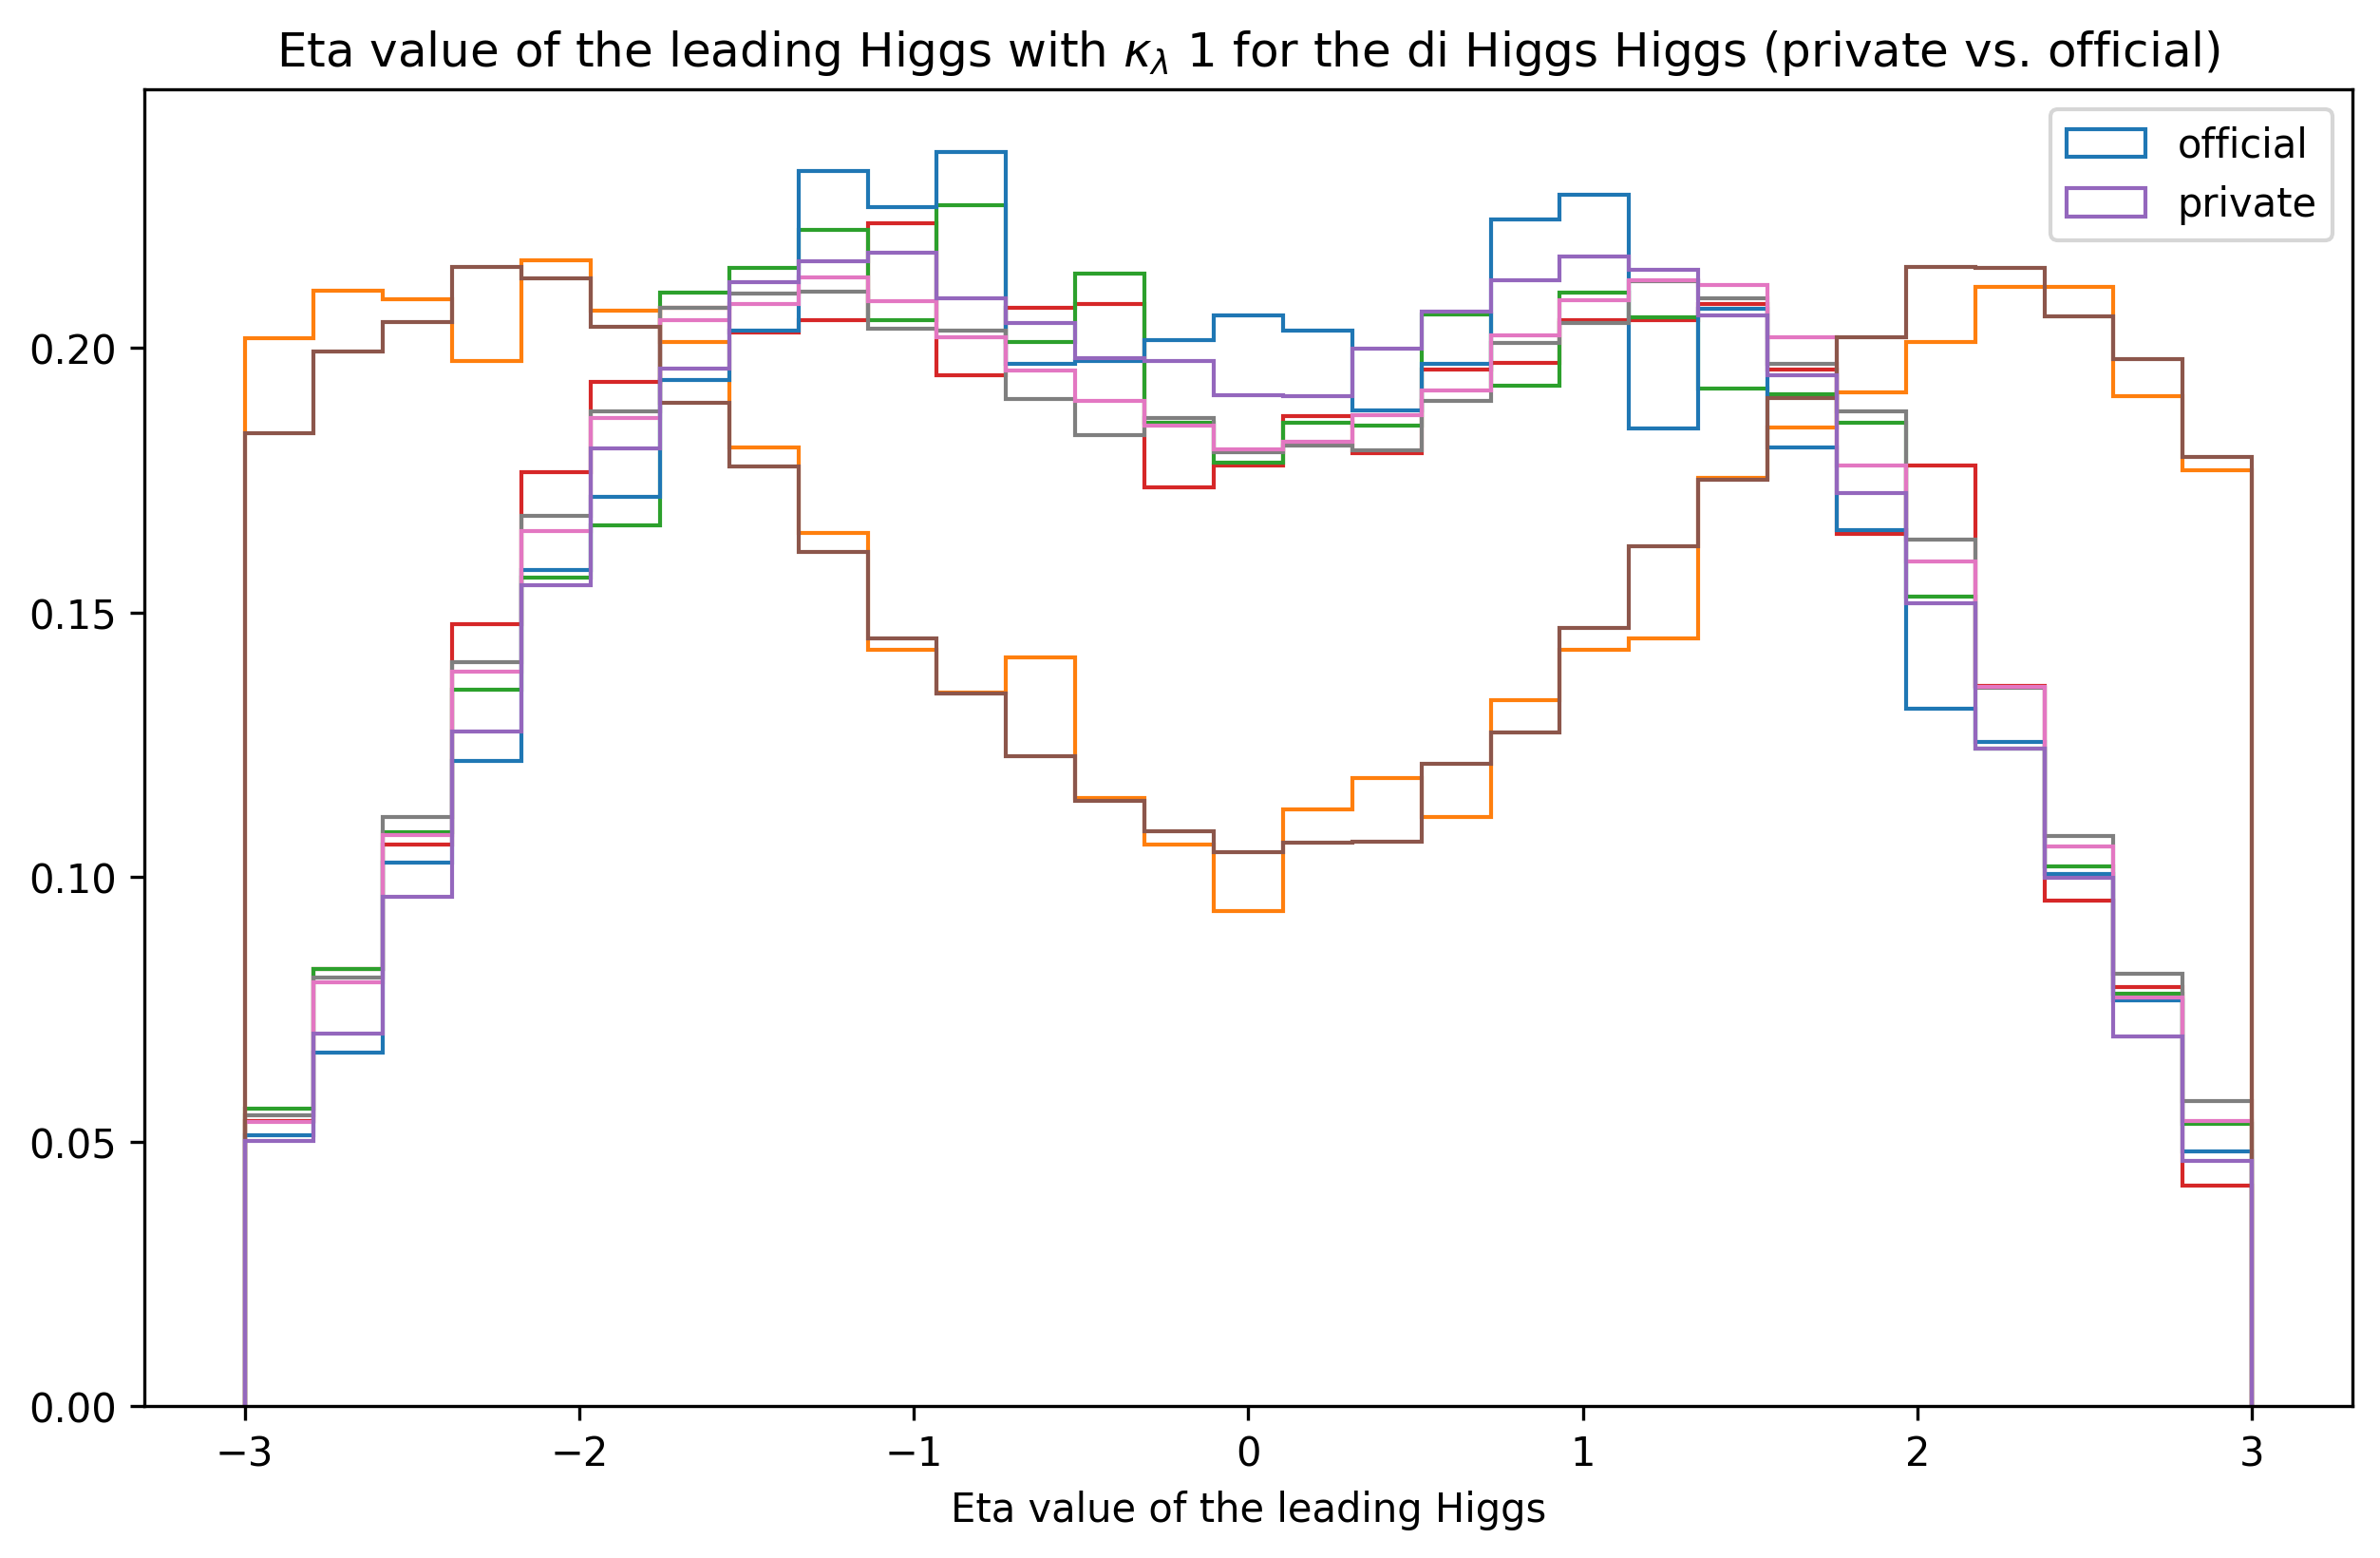

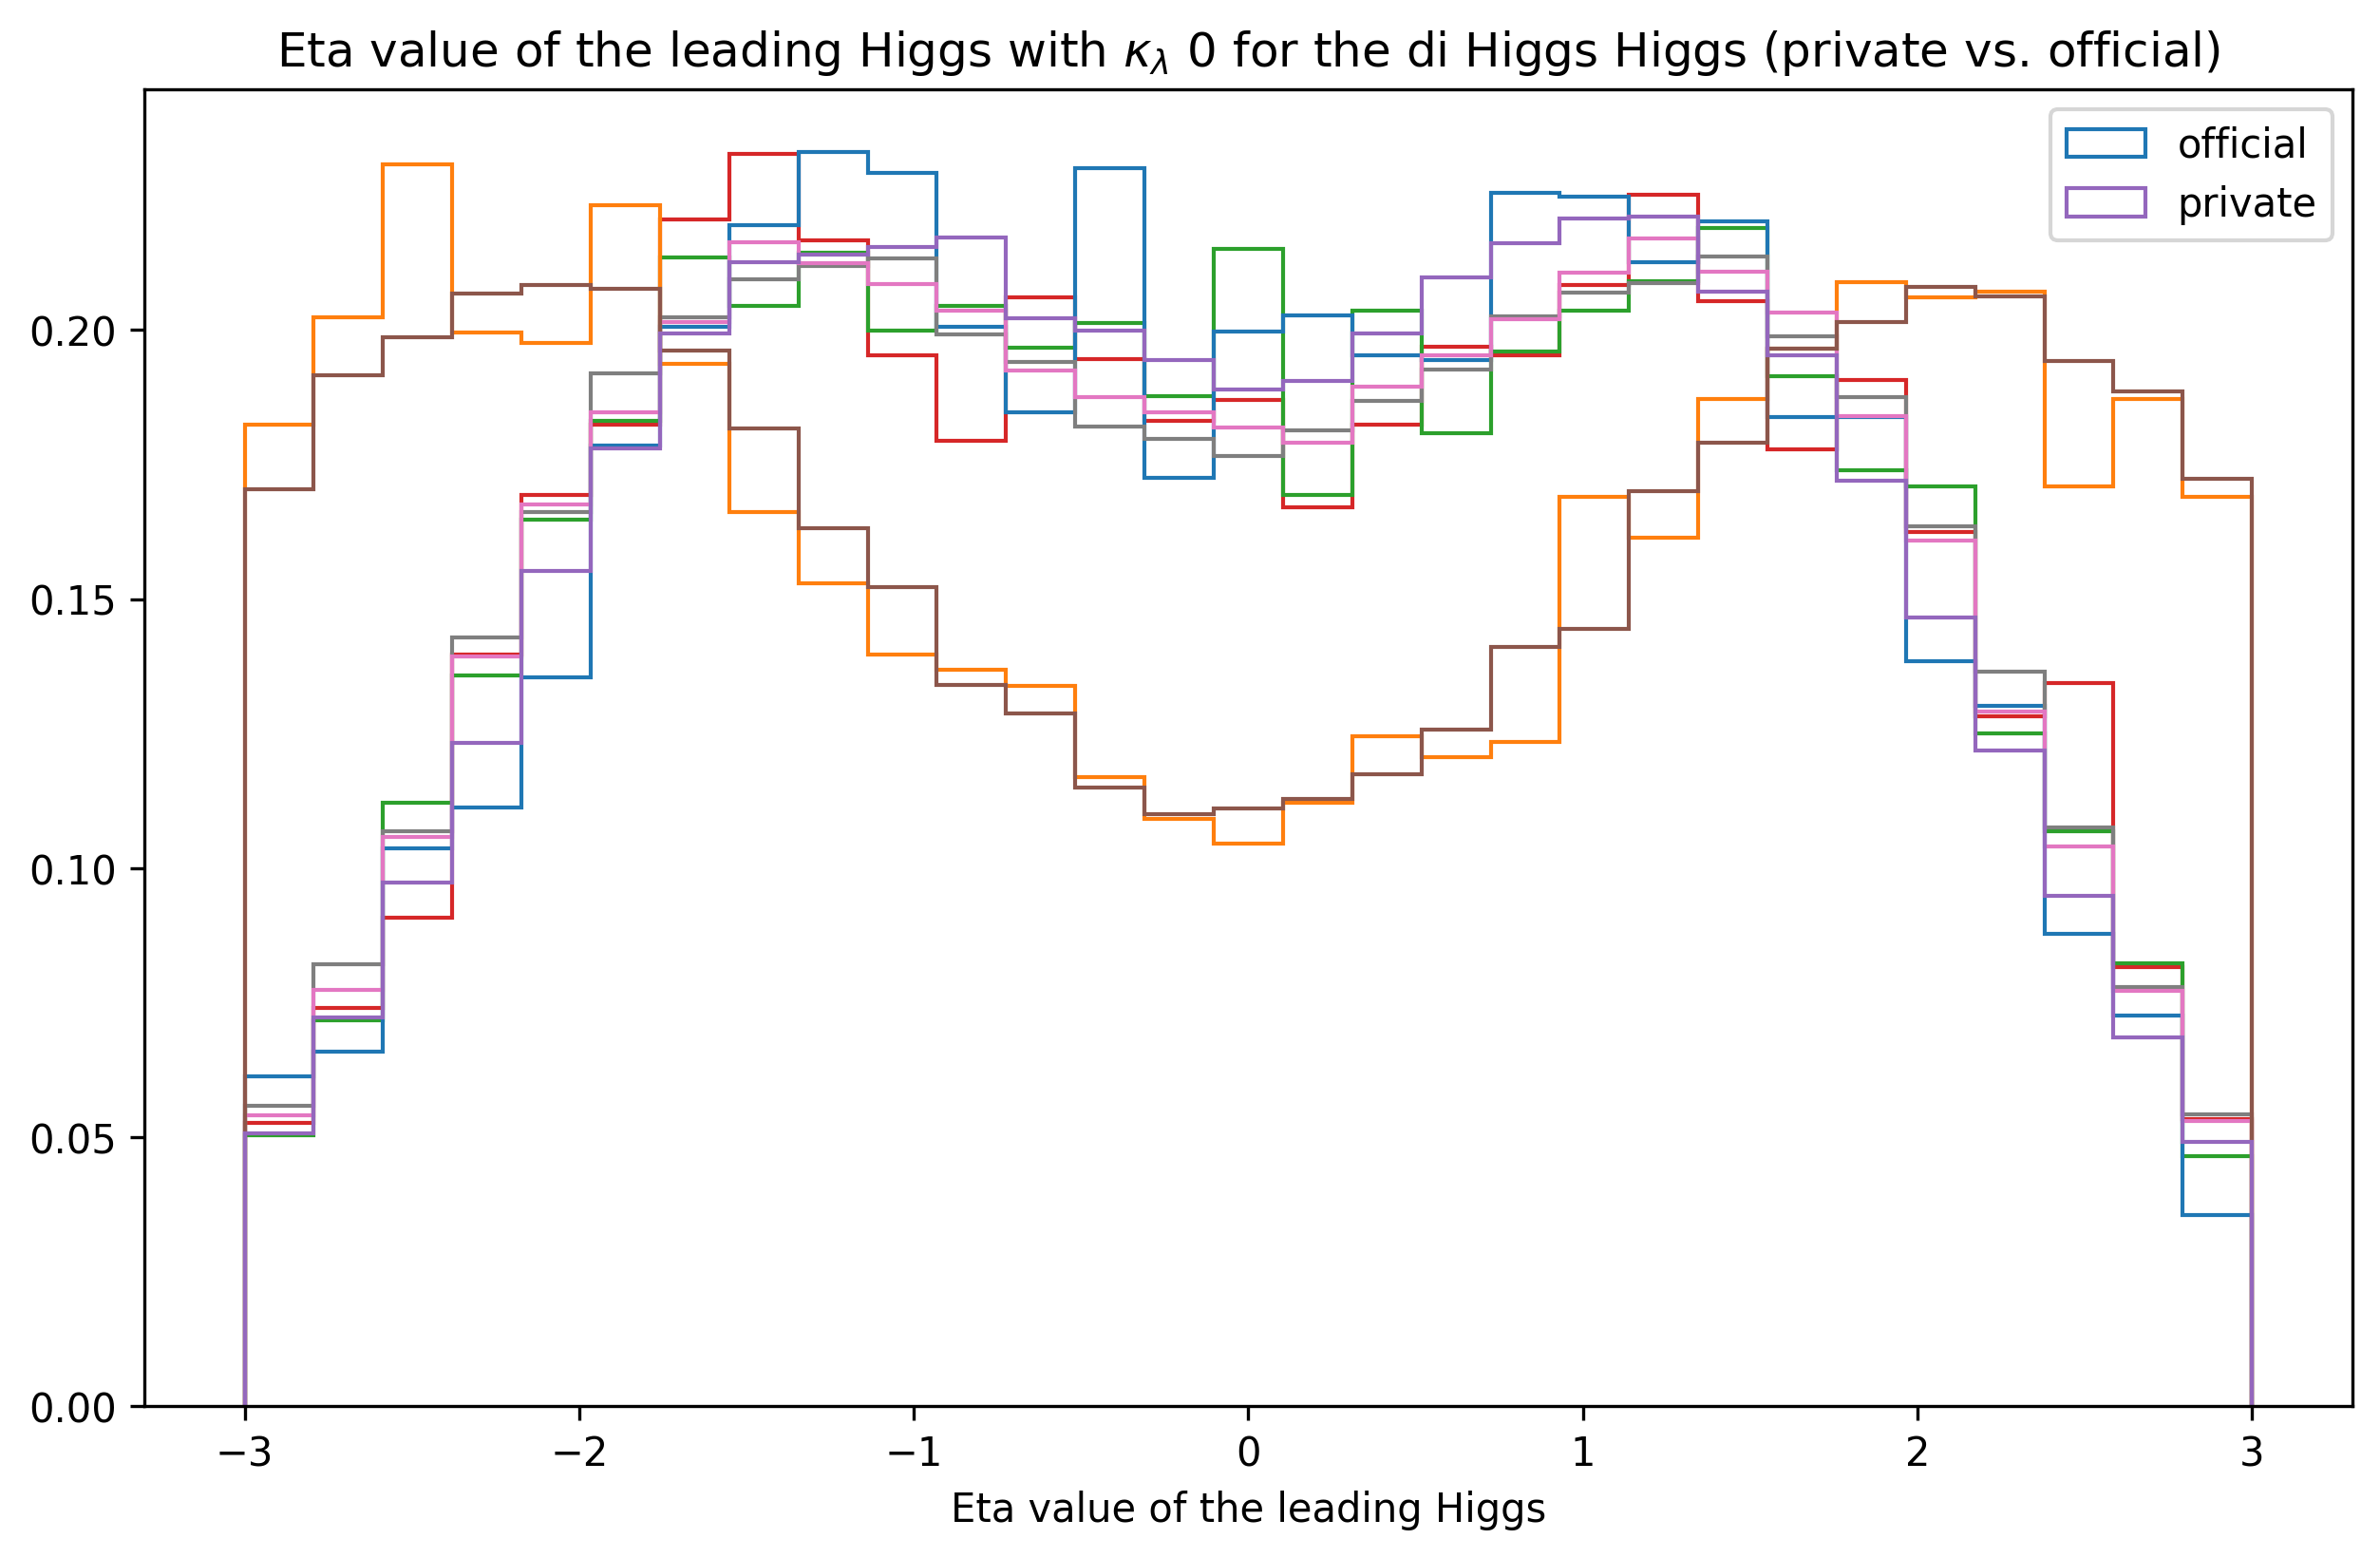

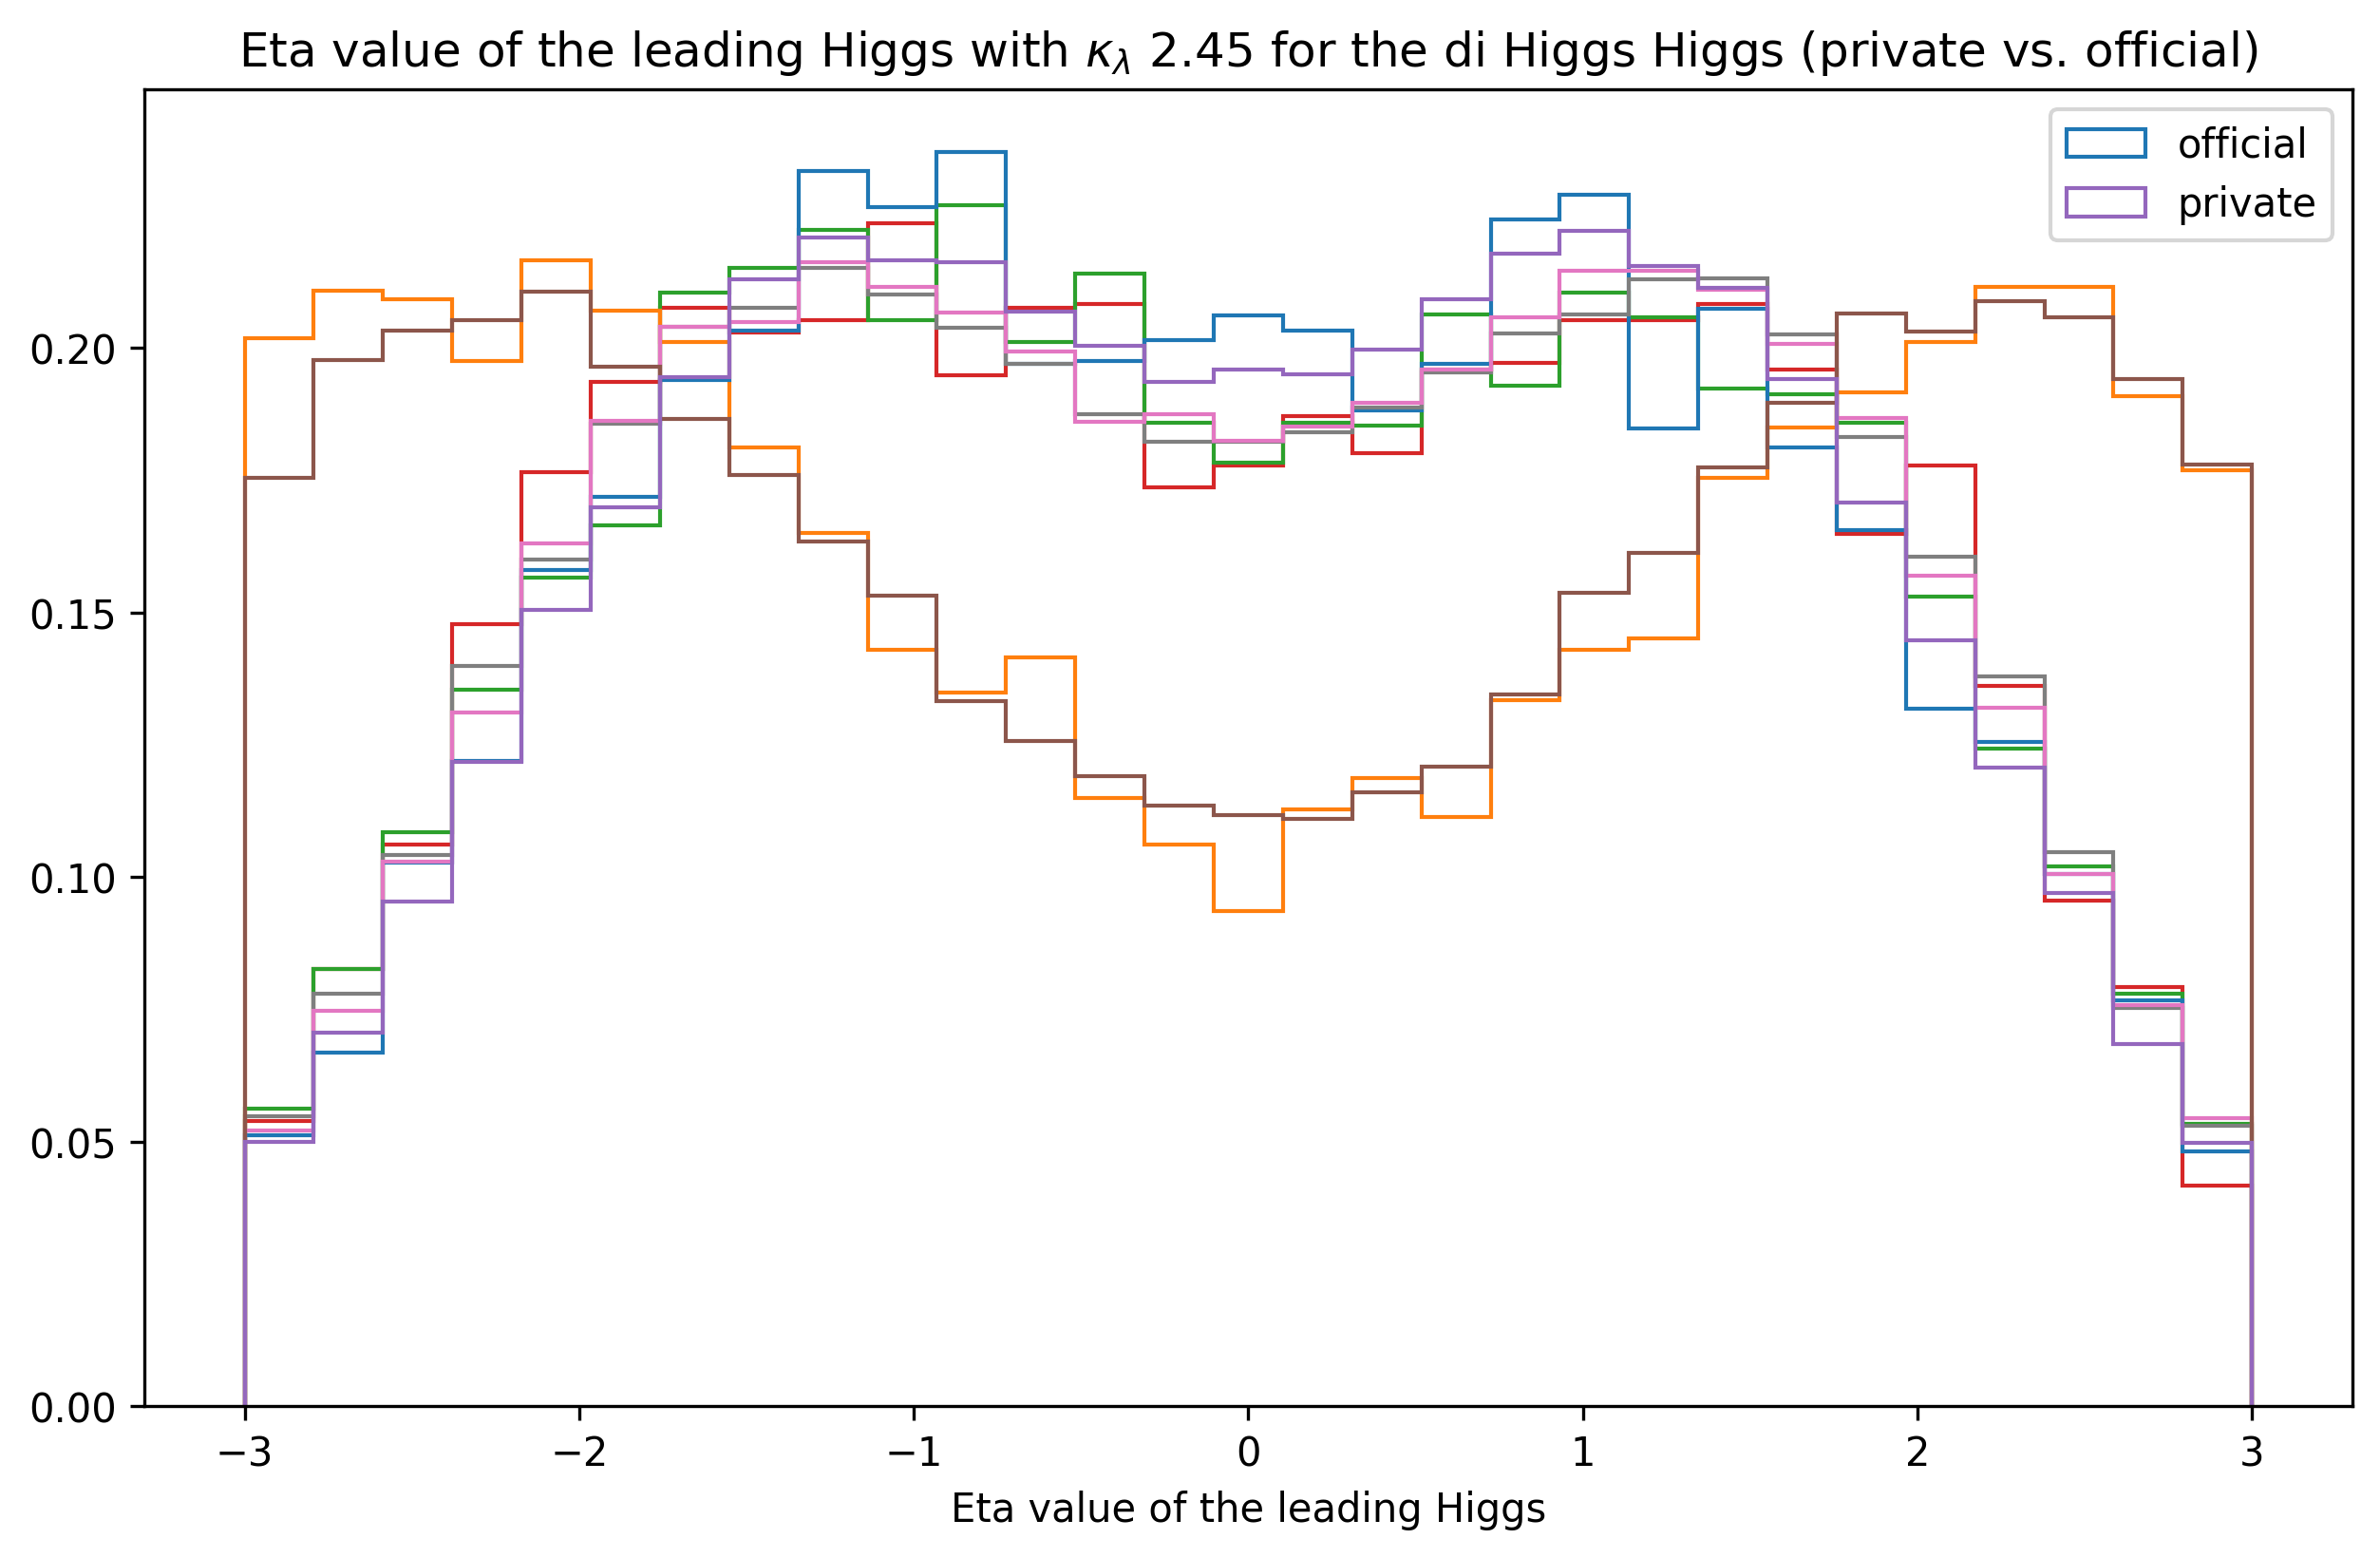

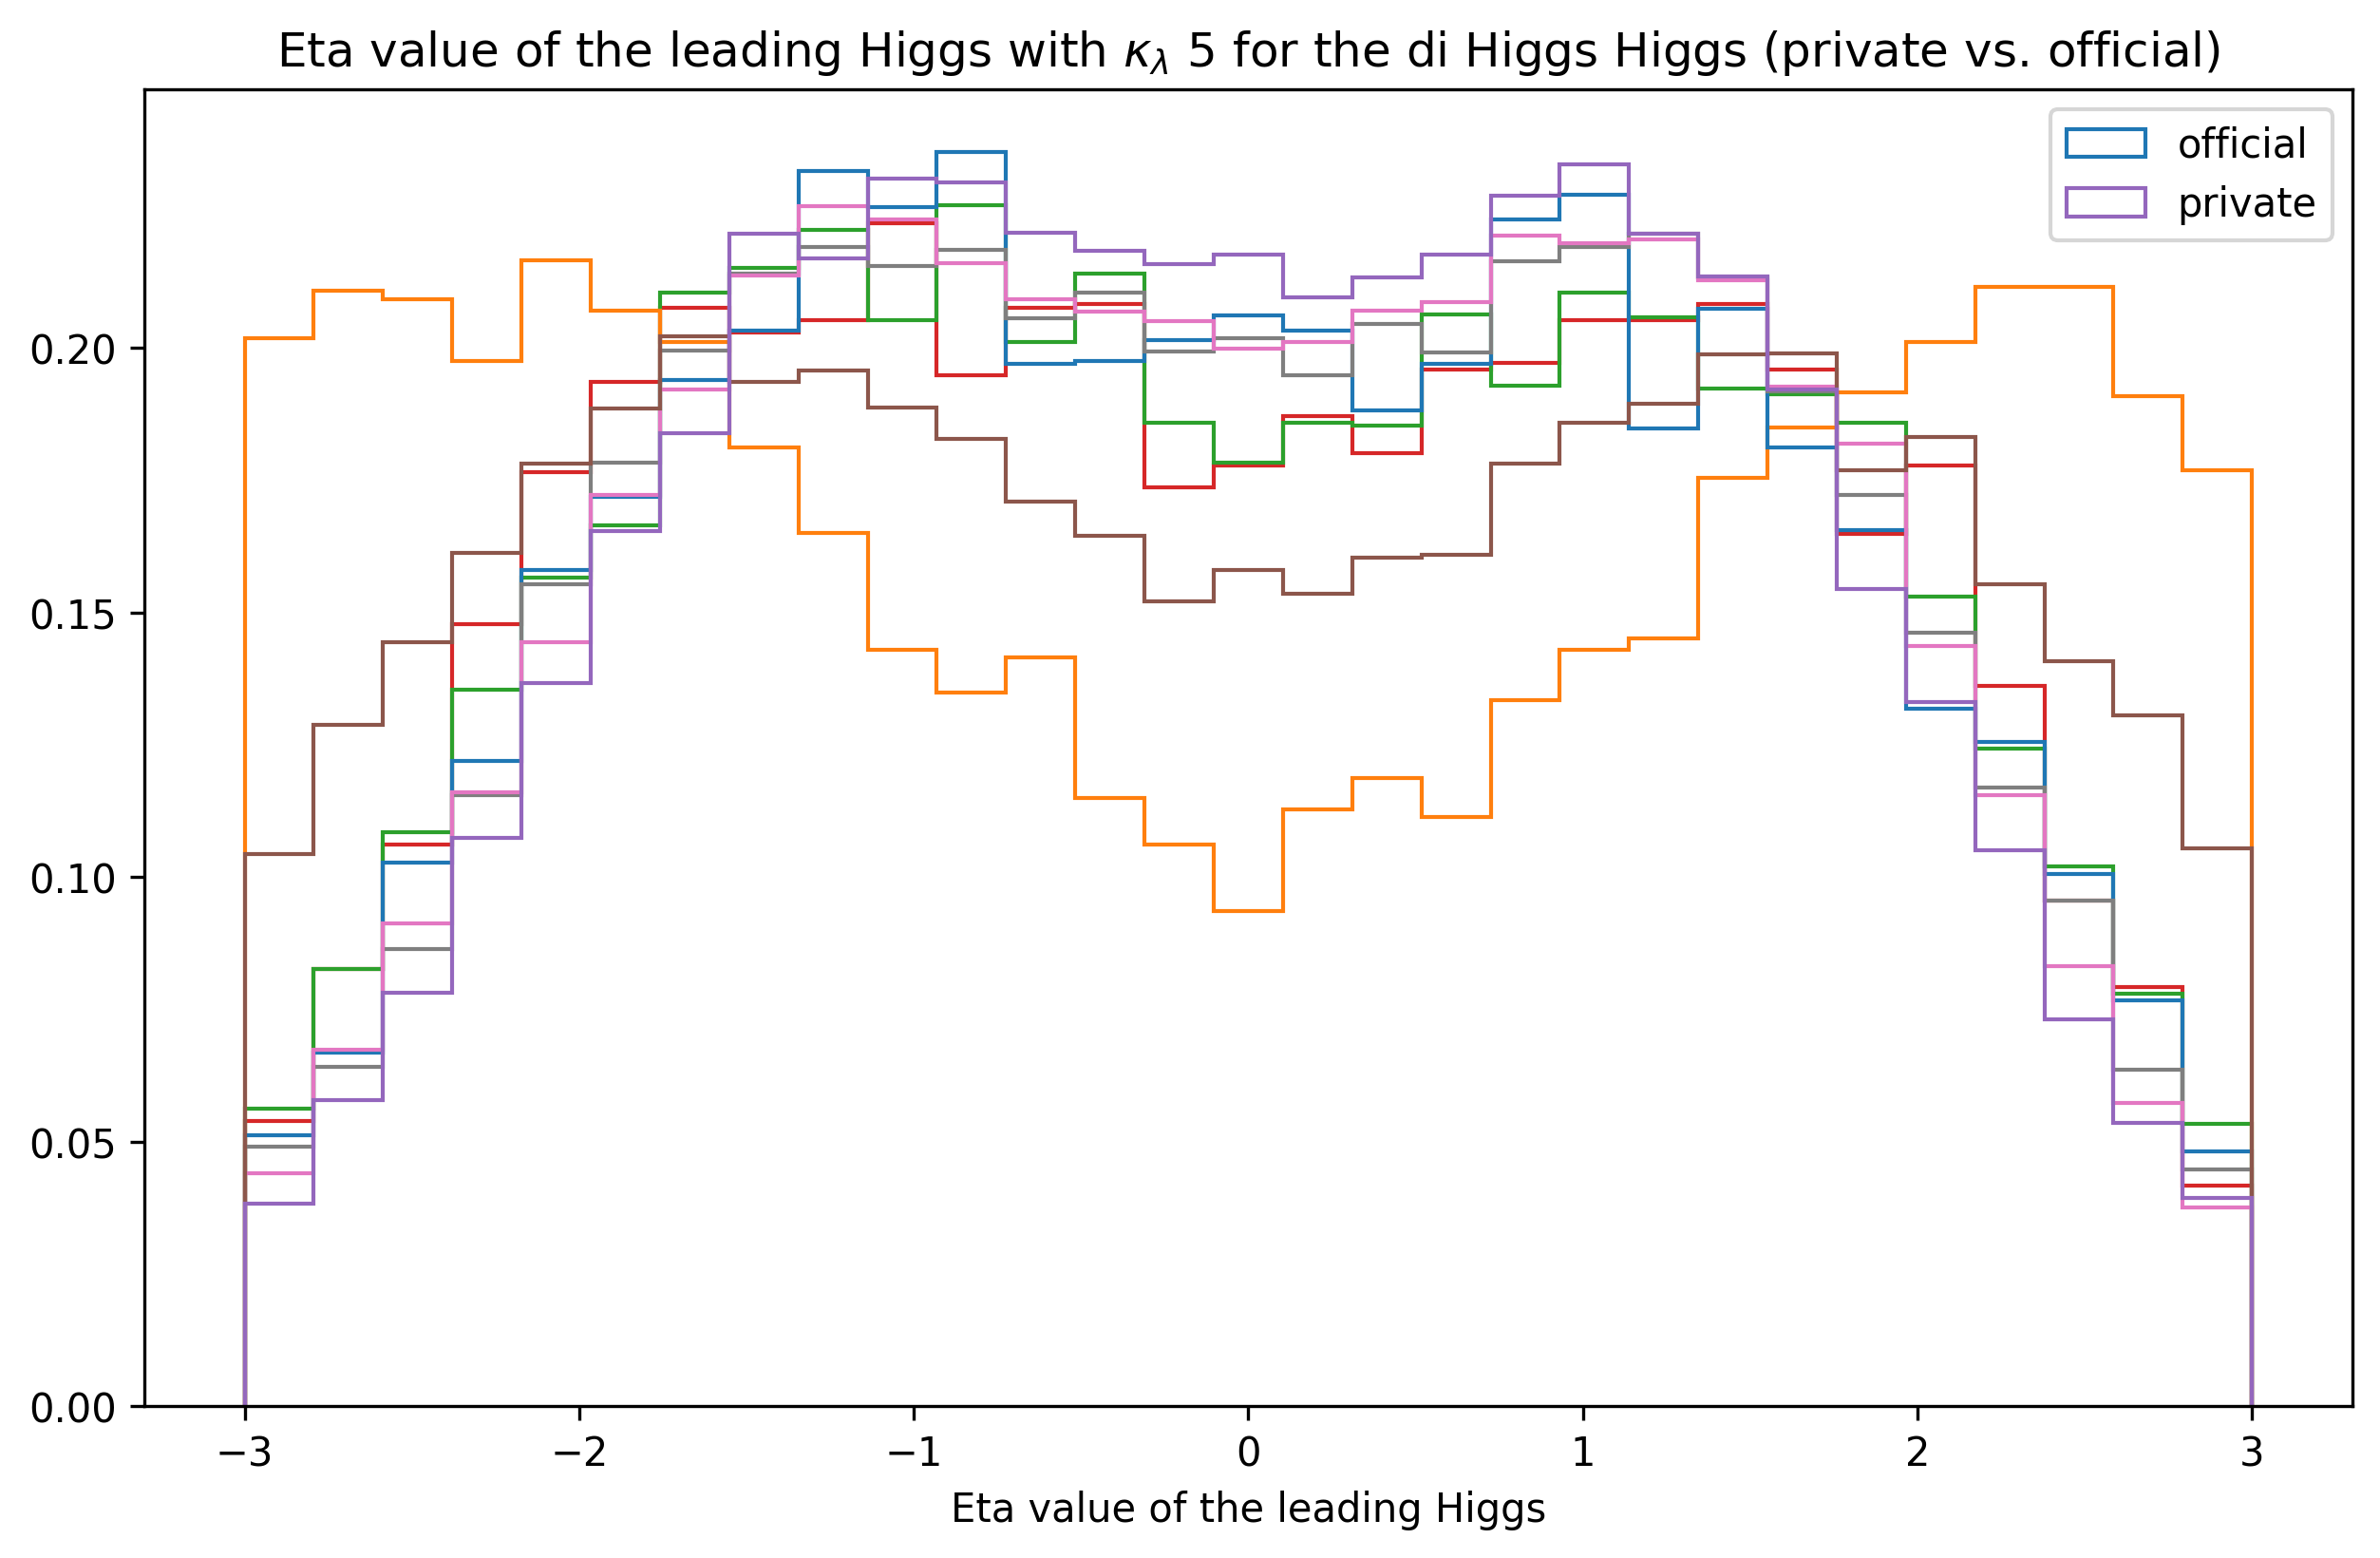

In [134]:
plot_higgs_eta(reco_hh_kl_1_official, reco_hh_kl_1_private, 1, "di Higgs")
plot_higgs_eta(reco_hh_kl_0_official, reco_hh_kl_0_private, 0, "di Higgs")
plot_higgs_eta(reco_hh_kl_2p45_official, reco_hh_kl_2p45_private, 2.45, "di Higgs")
plot_higgs_eta(reco_hh_kl_5_official, reco_hh_kl_5_private, 5, "di Higgs")